# nettoyage

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import datetime

In [2]:
sns.set()

customers = pd.read_csv("olist_customers_dataset.csv", sep=',')
orders = pd.read_csv("olist_orders_dataset.csv", sep=',')
geolocation = pd.read_csv("olist_geolocation_dataset.csv", sep=',')     
products= pd.read_csv("olist_products_dataset.csv", sep=',')
items = pd.read_csv("olist_order_items_dataset.csv", sep=',')     
sellers = pd.read_csv("olist_sellers_dataset.csv", sep=',')
payments  = pd.read_csv("olist_order_payments_dataset.csv", sep=',')  
product_category_translate = pd.read_csv("product_category_name_translation.csv", sep=',')
reviews  = pd.read_csv("olist_order_reviews_dataset.csv", sep=',')

In [3]:
print("customers", customers.shape)
print("orders", orders.shape)
print("geolocation", geolocation.shape)
print("products", products.shape)
print("items", items.shape)
print("sellers", sellers.shape)
print("payments", payments.shape)
print("product_category", product_category_translate.shape)
print("reviews", reviews.shape)

customers (99441, 5)
orders (99441, 8)
geolocation (1000163, 5)
products (32951, 9)
items (112650, 7)
sellers (3095, 4)
payments (103886, 5)
product_category (71, 2)
reviews (100000, 7)


In [4]:
print("customers", list(customers.columns))
print("orders", list(orders.columns))
print("geolocation", list(geolocation.columns))
print("products", list(products.columns))
print("items", list(items.columns))
print("sellers", list(sellers.columns))
print("payments", list(payments.columns))
print("product_category", list(product_category_translate.columns))
print("reviews", list(reviews.columns))

customers ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
orders ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
geolocation ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
products ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
items ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
sellers ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']
payments ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
product_category ['product_category_name', 'product_category_name_engl

In [5]:
len(customers.customer_unique_id.unique())

96096

In [6]:
customers.index = customers['customer_id']
customers = customers.drop(columns=['customer_id'])
orders.index = orders['customer_id'].drop(columns=['customer_id'])
orders = orders.drop(columns=['customer_id'])

customers_orders = pd.concat([orders, customers], axis=1)

In [7]:
customers_orders["order_delivered_customer_date"]   = pd.to_datetime(customers_orders["order_delivered_customer_date"], format="%Y-%m-%d %H:%M:%S", errors='coerce')
customers_orders["order_purchase_timestamp"]   = pd.to_datetime(customers_orders["order_purchase_timestamp"], format="%Y-%m-%d %H:%M:%S", errors='coerce')

In [8]:
customers_orders["order_delivered_customer_time"] = customers_orders["order_delivered_customer_date"] - customers_orders["order_purchase_timestamp"] 

In [9]:
customers_orders.order_delivered_customer_time.unique()

array([ 728920000000000, 1190768000000000,  811660000000000, ...,
       2147854000000000, 1476267000000000,  663060000000000],
      dtype='timedelta64[ns]')

In [10]:
customers_orders.loc[  customers_orders.order_delivered_customer_time.isna() == True    ]

order_id  \
ed0271e0b7da060a393796590e7b737a  136cce7faa42fdb2cefd53fdc79a6098   
caded193e8e47b8362864762a83db3c5  ee64d42b8cf066f35eac1cf57de1aa85   
d2a79636084590b7465af8ab374a8cf5  0760a852e4e9d89eb77bf631eaaf1c84   
f3f0e613e0bdb9c7cee75504f0f90679  15bed8e2fec7fdbadb186b57c46c92f2   
52006a9383bf149a4fb24226b173106f  6942b8da583c2f9957e990d028607019   
...                                                            ...   
0b0d6095c5555fe083844281f6b093bb  3a3cddda5a7c27851bd96c3313412840   
b4cd0522e632e481f8eaf766a2646e86  e9e64a17afa9653aacf2616d94c005b8   
2f0524a7b1b3845a1a57fcf3910c4333  a89abace0dcc01eeb267a9660b5ac126   
726f0894b5becdf952ea537d5266e543  a69ba794cc7deb415c3e15a0a3877e69   
32c9df889d41b0ee8309a5efb6855dcb  5fabc81b6322c8443648e1b21a6fef21   

                                 order_status order_purchase_timestamp  \
ed0271e0b7da060a393796590e7b737a     invoiced      2017-04-11 12:22:08   
caded193e8e47b8362864762a83db3c5      shipped      2018-06-04 16:44:48   
d2a79636084590b7465af8ab374a8cf5     invoiced      2018-08-03 17:44:42   
f3f0e613e0bdb9c7cee75504f0f90679   processing      2017-09-03 14:22:03   
52006a9383bf149a4fb24226b173106f      shipped      2018-01-10 11:33:07   
...                                       ...                      ...   
0b0d6095c5555fe083844281f6b093bb     canceled      2018-08-31 16:13:44   
b4cd0522e632e481f8eaf766a2646e86   processing      2018-01-05 23:07:24   
2f0524a7b1b3845a1a57fcf3910c4333     canceled      2018-09-06 18:45:47   
726f0894b5becdf952ea537d5266e543  unavailable      2017-08-23 16:28:04   
32c9df889d41b0ee8309a5efb6855dcb  unavailable      2017-10-10 10:50:03   

                                    order_approved_at  \
ed0271e0b7da060a393796590e7b737a  2017-04-13 13:25:17   
caded193e8e47b8362864762a83db3c5  2018-06-05 04:31:18   
d2a79636084590b7465af8ab374a8cf5  2018-08-07 06:15:14   
f3f0e613e0bdb9c7cee75504f0f90679  2017-09-03 14:30:09   
52006a9383bf149a4fb24226b173106f  2018-01-11 02:32:30   
...                                               ...   
0b0d6095c5555fe083844281f6b093bb                  NaN   
b4cd0522e632e481f8eaf766a2646e86  2018-01-09 07:18:05   
2f0524a7b1b3845a1a57fcf3910c4333                  NaN   
726f0894b5becdf952ea537d5266e543  2017-08-28 15:44:47   
32c9df889d41b0ee8309a5efb6855dcb  2017-10-14 18:35:57   

                                 order_delivered_carrier_date  \
ed0271e0b7da060a393796590e7b737a                          NaN   
caded193e8e47b8362864762a83db3c5          2018-06-05 14:32:00   
d2a79636084590b7465af8ab374a8cf5                          NaN   
f3f0e613e0bdb9c7cee75504f0f90679                          NaN   
52006a9383bf149a4fb24226b173106f          2018-01-11 19:39:23   
...                                                       ...   
0b0d6095c5555fe083844281f6b093bb                          NaN   
b4cd0522e632e481f8eaf766a2646e86                          NaN   
2f0524a7b1b3845a1a57fcf3910c4333                          NaN   
726f0894b5becdf952ea537d5266e543                          NaN   
32c9df889d41b0ee8309a5efb6855dcb                          NaN   

                                 order_delivered_customer_date  \
ed0271e0b7da060a393796590e7b737a                           NaT   
caded193e8e47b8362864762a83db3c5                           NaT   
d2a79636084590b7465af8ab374a8cf5                           NaT   
f3f0e613e0bdb9c7cee75504f0f90679                           NaT   
52006a9383bf149a4fb24226b173106f                           NaT   
...                                                        ...   
0b0d6095c5555fe083844281f6b093bb                           NaT   
b4cd0522e632e481f8eaf766a2646e86                           NaT   
2f0524a7b1b3845a1a57fcf3910c4333                           NaT   
726f0894b5becdf952ea537d5266e543                           NaT   
32c9df889d41b0ee8309a5efb6855dcb                           NaT   

                                 order_estimated_delivery_date  \
ed0

In [11]:
customers_orders.order_status.describe(include=all)

count         99441
unique            8
top       delivered
freq          96478
Name: order_status, dtype: object

In [12]:
#customer_zip_code_prefix 	customer_city 	customer_state

In [13]:
np.shape(customers_orders.customer_state.unique())

(27,)

## On ne selectionne uniquement les statuts "delivered" car c'est 97% des commandes

In [14]:
customers_orders.loc[customers_orders.order_status == "delivered"].shape[0]/customers_orders.shape[0]

0.9702034372140264

In [15]:
customers_orders = customers_orders.drop(customers_orders.loc[customers_orders.order_status != "delivered"].index)

## On enlève les 8 commandes sans date de livraison

In [16]:
customers_orders.loc[  customers_orders.order_delivered_customer_time.isna() == True    ]

order_id  \
ec05a6d8558c6455f0cbbd8a420ad34f  2d1e2d5bf4dc7227b3bfebb81328c15f   
5e89028e024b381dc84a13a3570decb4  f5dd62b788049ad9fc0526e3ad11a097   
29f0540231702fda0cfdee0a310f11aa  2ebdfc4f15f23b91474edf87475f108e   
cfda40ca8dd0a5d486a9635b611b398a  e69f75a717d64fc5ecdfae42b2e8e086   
4f1d63d35fb7c8999853b2699f5c7649  0d3268bad9b086af767785e3f0fc0133   
e08caf668d499a6d643dafd7c5cc498a  2d858f451373b04fb5c984a1cc2defaf   
dd1b84a7286eb4524d52af4256c0ba24  ab7c89dc1bf4a1ead9d6ec1ec8968a84   
28c37425f1127d887d7337f284080a0f  20edc82cf5400ce95e1afacc25798b31   

                                 order_status order_purchase_timestamp  \
ec05a6d8558c6455f0cbbd8a420ad34f    delivered      2017-11-28 17:44:07   
5e89028e024b381dc84a13a3570decb4    delivered      2018-06-20 06:58:43   
29f0540231702fda0cfdee0a310f11aa    delivered      2018-07-01 17:05:11   
cfda40ca8dd0a5d486a9635b611b398a    delivered      2018-07-01 22:05:55   
4f1d63d35fb7c8999853b2699f5c7649    delivered      2018-07-01 21:14:02   
e08caf668d499a6d643dafd7c5cc498a    delivered      2017-05-25 23:22:43   
dd1b84a7286eb4524d52af4256c0ba24    delivered      2018-06-08 12:09:39   
28c37425f1127d887d7337f284080a0f    delivered      2018-06-27 16:09:12   

                                    order_approved_at  \
ec05a6d8558c6455f0cbbd8a420ad34f  2017-11-28 17:56:40   
5e89028e024b381dc84a13a3570decb4  2018-06-20 07:19:05   
29f0540231702fda0cfdee0a310f11aa  2018-07-01 17:15:12   
cfda40ca8dd0a5d486a9635b611b398a  2018-07-01 22:15:14   
4f1d63d35fb7c8999853b2699f5c7649  2018-07-01 21:29:54   
e08caf668d499a6d643dafd7c5cc498a  2017-05-25 23:30:16   
dd1b84a7286eb4524d52af4256c0ba24  2018-06-08 12:36:39   
28c37425f1127d887d7337f284080a0f  2018-06-27 16:29:30   

                                 order_delivered_carrier_date  \
ec05a6d8558c6455f0cbbd8a420ad34f          2017-11-30 18:12:23   
5e89028e024b381dc84a13a3570decb4          2018-06-25 08:05:00   
29f0540231702fda0cfdee0a310f11aa          2018-07-03 13:57:00   
cfda40ca8dd0a5d486a9635b611b398a          2018-07-03 13:57:00   
4f1d63d35fb7c8999853b2699f5c7649          2018-07-03 09:28:00   
e08caf668d499a6d643dafd7c5cc498a                          NaN   
dd1b84a7286eb4524d52af4256c0ba24          2018-06-12 14:10:00   
28c37425f1127d887d7337f284080a0f          2018-07-03 19:26:00   

                                 order_delivered_customer_date  \
ec05a6d8558c6455f0cbbd8a420ad34f                           NaT   
5e89028e024b381dc84a13a3570decb4                           NaT   
29f0540231702fda0cfdee0a310f11aa                           NaT   
cfda40ca8dd0a5d486a9635b611b398a                           NaT   
4f1d63d35fb7c8999853b2699f5c7649                           NaT   
e08caf668d499a6d643dafd7c5cc498a                           NaT   
dd1b84a7286eb4524d52af4256c0ba24                           NaT   
28c37425f1127d887d7337f284080a0f                           NaT   

                                 order_estimated_delivery_date  \
ec05a6d8558c6455f0cbbd8a420ad34f           2017-12-18 00:00:00   
5e89028e024b381dc84a13a3570decb4           2018-07-16 00:00:00   
29f0540231702fda0cfdee0a310f11aa           2018-07-30 00:00:00   
cfda40ca8dd0a5d486a9635b611b398a           2018-07-30 00:00:00   
4f1d63d35fb7c8999853b2699f5c7649           2018-07-24 00:00:00   
e08caf668d499a6d643dafd7c5cc498a           2017-06-23 00:00:00   
dd1b84a7286eb4524d52af4256c0ba24           2018-06-26 00:00:00   
28c37425f1127d887d7337f284080a0f           2018-07-19 00:00:00   

                                                customer_unique_id  \
ec05a6d8558c6455f0cbbd8a420ad34f  13467e882eb3a701826435ee4424f2bd   
5e89028e024b381dc84a13a3570decb4  2f17c5b324ad603491521b279a9ff4de   
29f0540231702fda0cfdee0a310f11aa  1bd06a0c0df8b23dacfd3725d2dc0bb9   
cfda40ca8dd0a5d486a9635b611b398a  3bc508d482a402715be4d5cf4020cc81   
4f1d63d35fb7c8999853b2699f5c7649  ebf7e0d43a78c81991a4c59c145c75db   
e08caf668d499a6d643dafd7c5cc498a  d77cf4be2654aa70

In [17]:
customers_orders = customers_orders.drop(customers_orders.loc[customers_orders.order_delivered_customer_time.isna() == True].index)

## On enlève les 14 commandes sans confirmation du chef

In [18]:
customers_orders.loc[  customers_orders.order_approved_at.isna() == True    ]

order_id  \
2127dc6603ac33544953ef05ec155771  e04abd8149ef81b95221e88f6ed9ab6a   
4c1ccc74e00993733742a3c786dc3c1f  8a9adc69528e1001fc68dd0aaebbb54a   
2941af76d38100e0f8740a374f1a5dc3  7013bcfc1c97fe719a7b5e05e61c12db   
29c35fc91fc13fb5073c8f30505d860d  5cf925b116421afa85ee25e99b4c34fb   
1e101e0daffaddce8159d25a8e53f2b2  12a95a3c06dbaec84bcfb0e2da5d228a   
684cb238dc5b5d6366244e0e0776b450  c1d4211b3dae76144deccd6c74144a88   
68d081753ad4fe22fc4d410a9eb1ca01  d69e5d356402adc8cf17e08b5033acfb   
0bf35cac6cc7327065da879e2d90fae8  d77031d6a3c8a52f019764e68f211c69   
d5de688c321096d15508faae67a27051  7002a78c79c519ac54022d4f8a65e6e8   
a3d3c38e58b9d2dfb9207cab690b6310  2eecb0d85f281280f79fa00f9cec1a95   
07a2a7e0f63fd8cb757ed77d4245623c  51eb2eebd5d76a24625b31c33dd41449   
f67cd1a215aae2a1074638bbd35a223a  88083e8f64d95b932164187484d90212   
d85919cb3c0529589c6fa617f5f43281  3c0b8706b065f9919d0505d3b3343881   
74bebaf46603f9340e3b50c6b086f992  2babbb4b15e6d2dfe95e2de765c97bce   

                                 order_status order_purchase_timestamp  \
2127dc6603ac33544953ef05ec155771    delivered      2017-02-18 14:40:00   
4c1ccc74e00993733742a3c786dc3c1f    delivered      2017-02-18 12:45:31   
2941af76d38100e0f8740a374f1a5dc3    delivered      2017-02-18 13:29:47   
29c35fc91fc13fb5073c8f30505d860d    delivered      2017-02-18 16:48:35   
1e101e0daffaddce8159d25a8e53f2b2    delivered      2017-02-17 13:05:55   
684cb238dc5b5d6366244e0e0776b450    delivered      2017-01-19 12:48:08   
68d081753ad4fe22fc4d410a9eb1ca01    delivered      2017-02-19 01:28:47   
0bf35cac6cc7327065da879e2d90fae8    delivered      2017-02-18 11:04:19   
d5de688c321096d15508faae67a27051    delivered      2017-01-19 22:26:59   
a3d3c38e58b9d2dfb9207cab690b6310    delivered      2017-02-17 17:21:55   
07a2a7e0f63fd8cb757ed77d4245623c    delivered      2017-02-18 15:52:27   
f67cd1a215aae2a1074638bbd35a223a    delivered      2017-02-18 22:49:19   
d85919cb3c0529589c6fa617f5f43281    delivered      2017-02-17 15:53:27   
74bebaf46603f9340e3b50c6b086f992    delivered      2017-02-18 17:15:03   

                                 order_approved_at  \
2127dc6603ac33544953ef05ec155771               NaN   
4c1ccc74e00993733742a3c786dc3c1f               NaN   
2941af76d38100e0f8740a374f1a5dc3               NaN   
29c35fc91fc13fb5073c8f30505d860d               NaN   
1e101e0daffaddce8159d25a8e53f2b2               NaN   
684cb238dc5b5d6366244e0e0776b450               NaN   
68d081753ad4fe22fc4d410a9eb1ca01               NaN   
0bf35cac6cc7327065da879e2d90fae8               NaN   
d5de688c321096d15508faae67a27051               NaN   
a3d3c38e58b9d2dfb9207cab690b6310               NaN   
07a2a7e0f63fd8cb757ed77d4245623c               NaN   
f67cd1a215aae2a1074638bbd35a223a               NaN   
d85919cb3c0529589c6fa617f5f43281               NaN   
74bebaf46603f9340e3b50c6b086f992               NaN   

                                 order_delivered_carrier_date  \
2127dc6603ac33544953ef05ec155771          2017-02-23 12:04:47   
4c1ccc74e00993733742a3c786dc3c1f          2017-02-23 09:01:52   
2941af76d38100e0f8740a374f1a5dc3          2017-02-22 16:25:25   
29c35fc91fc13fb5073c8f30505d860d          2017-02-22 11:23:10   
1e101e0daffaddce8159d25a8e53f2b2          2017-02-22 11:23:11   
684cb238dc5b5d6366244e0e0776b450          2017-01-25 14:56:50   
68d081753ad4fe22fc4d410a9eb1ca01          2017-02-23 03:11:48   
0bf35cac6cc7327065da879e2d90fae8          2017-02-23 07:23:36   
d5de688c321096d15508faae67a27051          2017-01-27 11:08:05   
a3d3c38e58b9d2dfb9207cab690b6310          2017-02-22 11:42:51   
07a2a7e0f63fd8cb757ed77d4245623c          2017-02-23 03:09:14   
f67cd1a215aae2a1074638bbd35a223a          2017-02-22 11:31:06   
d85919cb3c0529589c6fa617f5f43281          2017-02-22 11:31:30   
74bebaf46603f9340e3b50c6b086f992          2017-02-22 11:23:11   

                                 order_delivered_customer_date  \
2127dc6603ac33544953ef05ec155771           

In [19]:
customers_orders = customers_orders.drop(customers_orders.loc[customers_orders.order_approved_at.isna() == True].index)

In [20]:
customers_orders

order_id  \
9ef432eb6251297304e76186b10a928d  e481f51cbdc54678b7cc49136f2d6af7   
b0830fb4747a6c6d20dea0b8c802d7ef  53cdb2fc8bc7dce0b6741e2150273451   
41ce2a54c0b03bf3443c3d931a367089  47770eb9100c2d0c44946d9cf07ec65d   
f88197465ea7920adcdbec7375364d82  949d5b44dbf5de918fe9c16f97b45f8a   
8ab97904e6daea8866dbdbc4fb7aad2c  ad21c59c0840e6cb83a9ceb5573f8159   
...                                                            ...   
39bd1228ee8140590ac3aca26f2dfe00  9c5dedf39a927c1b2549525ed64a053c   
1fca14ff2861355f6e5f14306ff977a7  63943bddc261676b46f01ca7ac2f7bd8   
1aa71eb042121263aafbe80c1b562c9c  83c1379a015df1e13d02aae0204711ab   
b331b74b18dc79bcdf6532d51e1637c1  11c177c8e97725db2631073c19f07b62   
edb027a75a1449115f6b43211ae02a24  66dea50a8b16d9b4dee7af250b4be1a5   

                                 order_status order_purchase_timestamp  \
9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   
...                                       ...                      ...   
39bd1228ee8140590ac3aca26f2dfe00    delivered      2017-03-09 09:54:05   
1fca14ff2861355f6e5f14306ff977a7    delivered      2018-02-06 12:58:58   
1aa71eb042121263aafbe80c1b562c9c    delivered      2017-08-27 14:46:43   
b331b74b18dc79bcdf6532d51e1637c1    delivered      2018-01-08 21:28:27   
edb027a75a1449115f6b43211ae02a24    delivered      2018-03-08 20:57:30   

                                    order_approved_at  \
9ef432eb6251297304e76186b10a928d  2017-10-02 11:07:15   
b0830fb4747a6c6d20dea0b8c802d7ef  2018-07-26 03:24:27   
41ce2a54c0b03bf3443c3d931a367089  2018-08-08 08:55:23   
f88197465ea7920adcdbec7375364d82  2017-11-18 19:45:59   
8ab97904e6daea8866dbdbc4fb7aad2c  2018-02-13 22:20:29   
...                                               ...   
39bd1228ee8140590ac3aca26f2dfe00  2017-03-09 09:54:05   
1fca14ff2861355f6e5f14306ff977a7  2018-02-06 13:10:37   
1aa71eb042121263aafbe80c1b562c9c  2017-08-27 15:04:16   
b331b74b18dc79bcdf6532d51e1637c1  2018-01-08 21:36:21   
edb027a75a1449115f6b43211ae02a24  2018-03-09 11:20:28   

                                 order_delivered_carrier_date  \
9ef432eb6251297304e76186b10a928d          2017-10-04 19:55:00   
b0830fb4747a6c6d20dea0b8c802d7ef          2018-07-26 14:31:00   
41ce2a54c0b03bf3443c3d931a367089          2018-08-08 13:50:00   
f88197465ea7920adcdbec7375364d82          2017-11-22 13:39:59   
8ab97904e6daea8866dbdbc4fb7aad2c          2018-02-14 19:46:34   
...                                                       ...   
39bd1228ee8140590ac3aca26f2dfe00          2017-03-10 11:18:03   
1fca14ff2861355f6e5f14306ff977a7          2018-02-07 23:22:42   
1aa71eb042121263aafbe80c1b562c9c          2017-08-28 20:52:26   
b331b74b18dc79bcdf6532d51e1637c1          2018-01-12 15:35:03   
edb027a75a1449115f6b43211ae02a24          2018-03-09 22:11:59   

                                 order_delivered_customer_date  \
9ef432eb6251297304e76186b10a928d           2017-10-10 21:25:13   
b0830fb4747a6c6d20dea0b8c802d7ef           2018-08-07 15:27:45   
41ce2a54c0b03bf3443c3d931a367089           2018-08-17 18:06:29   
f88197465ea7920adcdbec7375364d82           2017-12-02 00:28:42   
8ab97904e6daea8866dbdbc4fb7aad2c           2018-02-16 18:17:02   
...                                                        ...   
39bd1228ee8140590ac3aca26f2dfe00           2017-03-17 15:08:01   
1fca14ff2861355f6e5f14306ff977a7           2018-02-28 17:37:56   
1aa71eb042121263aafbe80c1b562c9c           2017-09-21 11:24:17   
b331b74b18dc79bcdf6532d51e1637c1           2018-01-25 23:32:54   
edb027a75a1449115f6b43211ae02a24           2018-03-16 13:08:30   

                                 order_estimated_delivery_date  \
9ef

## On enlève la commande sans order_delivered_carrier_date

In [21]:
customers_orders.loc[  customers_orders.order_delivered_carrier_date.isna() == True    ]

order_id  \
afeb16c7f46396c0ed54acb45ccaaa40  2aa91108853cecb43c84a5dc5b277475   

                                 order_status order_purchase_timestamp  \
afeb16c7f46396c0ed54acb45ccaaa40    delivered      2017-09-29 08:52:58   

                                    order_approved_at  \
afeb16c7f46396c0ed54acb45ccaaa40  2017-09-29 09:07:16   

                                 order_delivered_carrier_date  \
afeb16c7f46396c0ed54acb45ccaaa40                          NaN   

                                 order_delivered_customer_date  \
afeb16c7f46396c0ed54acb45ccaaa40           2017-11-20 19:44:47   

                                 order_estimated_delivery_date  \
afeb16c7f46396c0ed54acb45ccaaa40           2017-11-14 00:00:00   

                                                customer_unique_id  \
afeb16c7f46396c0ed54acb45ccaaa40  a2ac81ecc3704410ae240e74d4f0af40   

                                  customer_zip_code_prefix customer_city  \
afeb16c7f46396c0ed54acb45ccaaa40                     13334    indaiatuba   

                                 customer_state order_delivered_customer_time  
afeb16c7f46396c0ed54acb45ccaaa40             SP              52 days 10:51:49

In [22]:
customers_orders = customers_orders.drop(customers_orders.loc[customers_orders.order_delivered_carrier_date.isna() == True].index)

## On enlève les colonnes order_status, order_approved_at, *_date 	

In [23]:
customers_orders = customers_orders.drop(columns = ["order_status", "order_delivered_customer_date", "order_estimated_delivery_date",     "order_delivered_carrier_date"   ,  "order_approved_at"])


In [24]:
customers_orders

order_id  \
9ef432eb6251297304e76186b10a928d  e481f51cbdc54678b7cc49136f2d6af7   
b0830fb4747a6c6d20dea0b8c802d7ef  53cdb2fc8bc7dce0b6741e2150273451   
41ce2a54c0b03bf3443c3d931a367089  47770eb9100c2d0c44946d9cf07ec65d   
f88197465ea7920adcdbec7375364d82  949d5b44dbf5de918fe9c16f97b45f8a   
8ab97904e6daea8866dbdbc4fb7aad2c  ad21c59c0840e6cb83a9ceb5573f8159   
...                                                            ...   
39bd1228ee8140590ac3aca26f2dfe00  9c5dedf39a927c1b2549525ed64a053c   
1fca14ff2861355f6e5f14306ff977a7  63943bddc261676b46f01ca7ac2f7bd8   
1aa71eb042121263aafbe80c1b562c9c  83c1379a015df1e13d02aae0204711ab   
b331b74b18dc79bcdf6532d51e1637c1  11c177c8e97725db2631073c19f07b62   
edb027a75a1449115f6b43211ae02a24  66dea50a8b16d9b4dee7af250b4be1a5   

                                 order_purchase_timestamp  \
9ef432eb6251297304e76186b10a928d      2017-10-02 10:56:33   
b0830fb4747a6c6d20dea0b8c802d7ef      2018-07-24 20:41:37   
41ce2a54c0b03bf3443c3d931a367089      2018-08-08 08:38:49   
f88197465ea7920adcdbec7375364d82      2017-11-18 19:28:06   
8ab97904e6daea8866dbdbc4fb7aad2c      2018-02-13 21:18:39   
...                                                   ...   
39bd1228ee8140590ac3aca26f2dfe00      2017-03-09 09:54:05   
1fca14ff2861355f6e5f14306ff977a7      2018-02-06 12:58:58   
1aa71eb042121263aafbe80c1b562c9c      2017-08-27 14:46:43   
b331b74b18dc79bcdf6532d51e1637c1      2018-01-08 21:28:27   
edb027a75a1449115f6b43211ae02a24      2018-03-08 20:57:30   

                                                customer_unique_id  \
9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
b0830fb4747a6c6d20dea0b8c802d7ef  af07308b275d755c9edb36a90c618231   
41ce2a54c0b03bf3443c3d931a367089  3a653a41f6f9fc3d2a113cf8398680e8   
f88197465ea7920adcdbec7375364d82  7c142cf63193a1473d2e66489a9ae977   
8ab97904e6daea8866dbdbc4fb7aad2c  72632f0f9dd73dfee390c9b22eb56dd6   
...                                                            ...   
39bd1228ee8140590ac3aca26f2dfe00  6359f309b166b0196dbf7ad2ac62bb5a   
1fca14ff2861355f6e5f14306ff977a7  da62f9e57a76d978d02ab5362c509660   
1aa71eb042121263aafbe80c1b562c9c  737520a9aad80b3fbbdad19b66b37b30   
b331b74b18dc79bcdf6532d51e1637c1  5097a5312c8b157bb7be58ae360ef43c   
edb027a75a1449115f6b43211ae02a24  60350aa974b26ff12caad89e55993bd6   

                                  customer_zip_code_prefix  \
9ef432eb6251297304e76186b10a928d                      3149   
b0830fb4747a6c6d20dea0b8c802d7ef                     47813   
41ce2a54c0b03bf3443c3d931a367089                     75265   
f88197465ea7920adcdbec7375364d82                     59296   
8ab97904e6daea8866dbdbc4fb7aad2c                      9195   
...                                                    ...   
39bd1228ee8140590ac3aca26f2dfe00                     12209   
1fca14ff2861355f6e5f14306ff977a7                     11722   
1aa71eb042121263aafbe80c1b562c9c                     45920   
b331b74b18dc79bcdf6532d51e1637c1                     28685   
edb027a75a1449115f6b43211ae02a24                     83750   

                                            customer_city customer_state  \
9ef432eb6251297304e76186b10a928d                sao paulo             SP   
b0830fb4747a6c6d20dea0b8c802d7ef                barreiras             BA   
41ce2a54c0b03bf3443c3d931a367089               vianopolis             GO   
f88197465ea7920adcdbec7375364d82  sao goncalo do amarante             RN   
8ab97904e6daea8866dbdbc4fb7aad2c              santo andre             SP   
...                                                   ...            ...   
39bd1228ee8140590ac3aca26f2dfe00      sao jose dos campos             SP   
1fca14ff2861355f6e5f14306ff977a7             praia grande             SP   
1aa71eb042121263aafbe80c1b562c9c              nova vicosa             BA   
b331b74b18dc79bcdf6532d51e1637c1                  japuiba             RJ   
edb027a75a1449115f6b43211ae02a24                     lapa     

In [25]:
df = customers_orders
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [order_id, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time]
Index: []

## items

In [26]:
items.shape

(112650, 7)

In [27]:
items["shipping_limit_date"]   = pd.to_datetime(items["shipping_limit_date"], format="%Y-%m-%d %H:%M:%S", errors='coerce')

In [28]:
items.shape

(112650, 7)

In [29]:
items["total_value"] = items["price"] + items["freight_value"]

In [30]:
items = items.drop(columns = ["price", "freight_value"])

In [31]:
items.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [32]:
items["total_value2"]= items.groupby(['order_id'])['total_value'].transform('sum')

In [33]:
new_items = items.drop_duplicates(subset=['order_id'])

In [34]:
new_items.order_item_id.unique()

array([1])

In [35]:
new_items = new_items.drop(columns = "order_item_id")

In [36]:
new_items.index = new_items['order_id']
new_items = new_items.rename(columns={"order_id": "order_id_itemsss"})


In [37]:
customers_orders.index = customers_orders['order_id']

In [38]:
customers_orders_items = pd.concat([new_items, customers_orders], axis=1, join='inner')

In [39]:
customers_orders_items.loc[  customers_orders_items["order_id_itemsss"] != customers_orders_items["order_id"]    ]     

Empty DataFrame
Columns: [order_id_itemsss, product_id, seller_id, shipping_limit_date, total_value, total_value2, order_id, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time]
Index: []

In [40]:
customers_orders_items.loc[  customers_orders_items["total_value"] != customers_orders_items["total_value2"]    ]     

order_id_itemsss  \
order_id                                                             
0008288aa423d2a3f00fcb17cd7d8719  0008288aa423d2a3f00fcb17cd7d8719   
00143d0f86d6fbd9f9b38ab440ac16f5  00143d0f86d6fbd9f9b38ab440ac16f5   
001ab0a7578dd66cd4b0a71f5b6e1e41  001ab0a7578dd66cd4b0a71f5b6e1e41   
001d8f0e34a38c37f7dba2a37d4eba8b  001d8f0e34a38c37f7dba2a37d4eba8b   
002c9def9c9b951b1bec6d50753c9891  002c9def9c9b951b1bec6d50753c9891   
...                                                            ...   
ffd84ab39cd5e873d8dba24342e65c01  ffd84ab39cd5e873d8dba24342e65c01   
ffe4b41e99d39f0b837a239110260530  ffe4b41e99d39f0b837a239110260530   
ffecd5a79a0084f6a592288c67e3c298  ffecd5a79a0084f6a592288c67e3c298   
fff8287bbae429a99bb7e8c21d151c41  fff8287bbae429a99bb7e8c21d151c41   
fffb9224b6fc7c43ebb0904318b10b5f  fffb9224b6fc7c43ebb0904318b10b5f   

                                                        product_id  \
order_id                                                             
0008288aa423d2a3f00fcb17cd7d8719  368c6c730842d78016ad823897a372db   
00143d0f86d6fbd9f9b38ab440ac16f5  e95ee6822b66ac6058e2e4aff656071a   
001ab0a7578dd66cd4b0a71f5b6e1e41  0b0172eb0fd18479d29c3bc122c058c2   
001d8f0e34a38c37f7dba2a37d4eba8b  e67307ff0f15ade43fcb6e670be7a74c   
002c9def9c9b951b1bec6d50753c9891  2d9ff06c8870a518f5f6909774e140fb   
...                                                            ...   
ffd84ab39cd5e873d8dba24342e65c01  fcf50ee5ad1f1a48671052487d2b0bff   
ffe4b41e99d39f0b837a239110260530  e97df839917a6e93404867b1d0319bfc   
ffecd5a79a0084f6a592288c67e3c298  50fd2b788dc166edd20512370dac54df   
fff8287bbae429a99bb7e8c21d151c41  bee2e070c39f3dd2f6883a17a5f0da45   
fffb9224b6fc7c43ebb0904318b10b5f  43423cdffde7fda63d0414ed38c11a73   

                                                         seller_id  \
order_id                                                             
0008288aa423d2a3f00fcb17cd7d8719  1f50f920176fa81dab994f9023523100   
00143d0f86d6fbd9f9b38ab440ac16f5  a17f621c590ea0fab3d5d883e1630ec6   
001ab0a7578dd66cd4b0a71f5b6e1e41  5656537e588803a555b8eb41f07a944b   
001d8f0e34a38c37f7dba2a37d4eba8b  f4aba7c0bca51484c30ab7bdc34bcdd1   
002c9def9c9b951b1bec6d50753c9891  00720abe85ba0859807595bbf045a33b   
...                                                            ...   
ffd84ab39cd5e873d8dba24342e65c01  0be8ff43f22e456b4e0371b2245e4d01   
ffe4b41e99d39f0b837a239110260530  42bde9fef835393bb8a8849cb6b7f245   
ffecd5a79a0084f6a592288c67e3c298  8b321bb669392f5163d04c59e235e066   
fff8287bbae429a99bb7e8c21d151c41  4e922959ae960d389249c378d1c939f5   
fffb9224b6fc7c43ebb0904318b10b5f  b1fc4f64df5a0e8b6913ab38803c57a9   

                                 shipping_limit_date  total_value  \
order_id                                                            
0008288aa423d2a3f00fcb17cd7d8719 2018-02-21 02:55:52        63.27   
00143d0f86d6fbd9f9b38ab440ac16f5 2017-10-20 16:07:52        36.43   
001ab0a7578dd66cd4b0a71f5b6e1e41 2018-01-04 02:33:42        42.52   
001d8f0e34a38c37f7dba2a37d4eba8b 2017-05-18 17:35:11        26.77   
002c9def9c9b951b1bec6d50753c9891 2018-05-21 17:32:03        86.90   
...                                              ...          ...   
ffd84ab39cd5e873d8dba24342e65c01 2017-10-11 19:49:17        32.68   
ffe4b41e99d39f0b837a239110260530 2017-09-07 21:25:40        34.79   
ffecd5a79a0084f6a592288c67e3c298 2018-03-05 20:15:27        37.69   
fff8287bbae429a99bb7e8c21d151c41 2018-03-27 12:29:22       228.14   
fffb9224b6fc7c43ebb0904318b10b5f 2017-11-03 02:55:58        89.19   

                                  total_value2  \
order_id                                         
0008288aa423d2a3f00fcb17cd7d8719        126.54   
00143d0f86d6fbd9f9b38ab440ac16f5        109.29   
001ab0a7578dd66cd4b0a71f5b6e1e41        127.56   
001d8f0e34a38c37f7dba2a37d4eba8b         53.54   
002c9def9c9b951b1bec6d50753c9891        173.80   
...                                        ...   
ffd84ab39cd5e873d8d

In [41]:
customers_orders_items["shipping_limit_time"] = customers_orders_items["shipping_limit_date"] - customers_orders_items["order_purchase_timestamp"]

In [42]:
customers_orders_items["shipping_limit_time"] 

order_id
00010242fe8c5a6d1ba2dd792cb16214   6 days 00:46:33
00018f77f2f0320c557190d7a144bdd3   7 days 00:12:07
000229ec398224ef6ca0657da4fc703e   4 days 00:14:59
00024acbcdf0a6daa1e931b038114c75   7 days 00:09:43
00042b26cf59d7ce69dfabb4e55b4fd9   9 days 00:00:00
                                         ...      
fffc94f6ce00a00581880bf54a75a037   8 days 14:13:55
fffcd46ef2263f404302a634eb57f7eb   5 days 18:05:02
fffce4705a9662cd70adb13d4a31832d   7 days 00:06:29
fffe18544ffabc95dfada21779c9644f   6 days 01:01:33
fffe41c64501cc87c801fd61db3f6244   3 days 00:09:55
Name: shipping_limit_time, Length: 96455, dtype: timedelta64[ns]

In [43]:
customers_orders_items = customers_orders_items.drop(columns = ['order_id_itemsss', "total_value", "shipping_limit_date"])

In [44]:
df = customers_orders_items
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [product_id, seller_id, total_value2, order_id, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time, shipping_limit_time]
Index: []

## payments

In [45]:
payments.payment_sequential.unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [46]:
payments.loc[payments["order_id"] == "b81ef226f3fe1789b1e8b2acac839d17"]

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33

In [47]:
customers_orders_items.loc[customers_orders_items["order_id"] == "b81ef226f3fe1789b1e8b2acac839d17"]

product_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  af74cc53dcffc8384b29e7abfa41902b   

                                                         seller_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  213b25e6f54661939f11710a6fddb871   

                                  total_value2  \
order_id                                         
b81ef226f3fe1789b1e8b2acac839d17         99.33   

                                                          order_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   

                                 order_purchase_timestamp  \
order_id                                                    
b81ef226f3fe1789b1e8b2acac839d17      2018-04-25 22:01:49   

                                                customer_unique_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  708ab75d2a007f0564aedd11139c7708   

                                  customer_zip_code_prefix  customer_city  \
order_id                                                                    
b81ef226f3fe1789b1e8b2acac839d17                     39801  teofilo otoni   

                                 customer_state order_delivered_customer_time  \
order_id                                                                        
b81ef226f3fe1789b1e8b2acac839d17             MG              13 days 19:35:02   

                                 shipping_limit_time  
order_id                                              
b81ef226f3fe1789b1e8b2acac839d17     7 days 00:13:20

In [48]:
payments["total_payment_value"]= payments.groupby(['order_id'])['payment_value'].transform('sum')
payments = payments.drop_duplicates(subset=['order_id'])

payments.index = payments['order_id']
payments = payments.rename(columns={"order_id": "order_id_payments"})

In [49]:
customers_orders_items_payments = pd.concat([payments, customers_orders_items], axis=1, join='inner')

In [50]:
np.isclose(35.22445664, 35.225, rtol=1e-01)

True

In [51]:
customers_orders_items_payments.loc[  np.isclose(customers_orders_items_payments["total_payment_value"] , 
                                    customers_orders_items_payments["total_value2"], rtol=0.0000001) == False].drop(
    columns=["order_id","order_id_payments", "payment_installments","payment_value", "product_id",
            "seller_id", "shipping_limit_time"])

payment_sequential payment_type  \
order_id                                                            
4d680edbaa7d3d9bed69532957368a03                   1  credit_card   
ce6d150fb29ada17d2082f4847107665                   1  credit_card   
6f393015477564624446a2b4c948c0f0                   1  credit_card   
363524b17966c3a64696d5a68c5f4d34                   1  credit_card   
bddbca2d48a961d74fe81de8febf9a73                   1  credit_card   
...                                              ...          ...   
43d0adacfa785ccb9e7544f2c82c5566                   1  credit_card   
ee514292cc5c49e7bb2856b564c4188f                   1       boleto   
1c437b4d4326d36b71e91dd7a7c2c4f6                   1  credit_card   
8200c0f5298c25d0c51f66b1c63b6ebc                   1  credit_card   
2b5d5c1847d069c5efeb82f4056c15d8                   1       boleto   

                                  total_payment_value  total_value2  \
order_id                                                              
4d680edbaa7d3d9bed69532957368a03               353.09        353.08   
ce6d150fb29ada17d2082f4847107665              1586.47       1403.66   
6f393015477564624446a2b4c948c0f0                40.43         35.00   
363524b17966c3a64696d5a68c5f4d34               276.11        276.13   
bddbca2d48a961d74fe81de8febf9a73               180.49        180.50   
...                                               ...           ...   
43d0adacfa785ccb9e7544f2c82c5566               362.00        362.01   
ee514292cc5c49e7bb2856b564c4188f               149.31        149.30   
1c437b4d4326d36b71e91dd7a7c2c4f6               263.45        263.43   
8200c0f5298c25d0c51f66b1c63b6ebc               460.84        460.85   
2b5d5c1847d069c5efeb82f4056c15d8               257.67        257.66   

                                 order_purchase_timestamp  \
order_id                                                    
4d680edbaa7d3d9bed69532957368a03      2018-08-20 14:34:51   
ce6d150fb29ada17d2082f4847107665      2018-01-25 11:17:02   
6f393015477564624446a2b4c948c0f0      2018-01-17 22:38:14   
363524b17966c3a64696d5a68c5f4d34      2018-05-10 22:19:03   
bddbca2d48a961d74fe81de8febf9a73      2018-03-22 09:15:32   
...                                                   ...   
43d0adacfa785ccb9e7544f2c82c5566      2018-02-13 19:16:22   
ee514292cc5c49e7bb2856b564c4188f      2017-12-20 11:07:49   
1c437b4d4326d36b71e91dd7a7c2c4f6      2018-04-10 10:03:12   
8200c0f5298c25d0c51f66b1c63b6ebc      2018-01-23 23:40:21   
2b5d5c1847d069c5efeb82f4056c15d8      2018-08-07 17:47:15   

                                                customer_unique_id  \
order_id                                                             
4d680edbaa7d3d9bed69532957368a03  14f64911f31f3722899596d1095a233e   
ce6d150fb29ada17d2082f4847107665  3629a4b18f2eb69e03f153158e48d2cc   
6f393015477564624446a2b4c948c0f0  e37ac8aa47a3d9d00215137f6b8877d6   
363524b17966c3a64696d5a68c5f4d34  00ae50eb5e1d2514f694dee1dcbbd5ae   
bddbca2d48a961d74fe81de8febf9a73  fbed0fde7eb2b367863b9c434efe62a3   
...                                                            ...   
43d0adacfa785ccb9e7544f2c82c5566  4168fcd194ff2e9b969498157e49b24c   
ee514292cc5c49e7bb2856b564c4188f  e61991d309c25313ecd4736baca5d0d0   
1c437b4d4326d36b71e91dd7a7c2c4f6  d5e26e279c46738a6d4a55e037dc77b7   
8200c0f5298c25d0c51f66b1c63b6ebc  db7d237377a3dbaccede13b803c28306   
2b5d5c1847d069c5efeb82f4056c15d8  5634e75d99bb303da48151ff3bdba1a1   

                                  customer_zip_code_prefix  customer_city  \
order_id                                                                    
4d680edbaa7d3d9bed69532957368a03                     32678          betim   
ce6d150fb29ada17d2082f4847107665                     78580  alta floresta   
6f393015477564624446a2b4c948c0f0                     76420    niquelandia   
363524b17966c3a64696d5a68c5f4d34                      4945      sao paulo   
bddbca2d48a961d74fe81de8febf9a73             

In [52]:
customers_orders_items_payments["total_payment"] = customers_orders_items_payments[["total_value2", "total_payment_value"]].max(axis=1)

In [53]:
customers_orders_items_payments = customers_orders_items_payments.drop(columns=["total_value2", "total_payment_value", "payment_value"])

In [54]:
customers_orders_items_payments

order_id_payments  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   
a9810da82917af2d9aefd1278f1dcfa0  a9810da82917af2d9aefd1278f1dcfa0   
25e8ea4e93396b6fa0d3dd708e76c1bd  25e8ea4e93396b6fa0d3dd708e76c1bd   
ba78997921bbcdc1373bb41e913ab953  ba78997921bbcdc1373bb41e913ab953   
42fdf880ba16b47b59251dd489d4441a  42fdf880ba16b47b59251dd489d4441a   
...                                                            ...   
c45067032fd84f4cf408730ff5205568  c45067032fd84f4cf408730ff5205568   
0406037ad97740d563a178ecc7a2075c  0406037ad97740d563a178ecc7a2075c   
7b905861d7c825891d6347454ea7863f  7b905861d7c825891d6347454ea7863f   
b8b61059626efa996a60be9bb9320e10  b8b61059626efa996a60be9bb9320e10   
28bbae6599b09d39ca406b747b6632b1  28bbae6599b09d39ca406b747b6632b1   

                                  payment_sequential payment_type  \
order_id                                                            
b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                              ...          ...   
c45067032fd84f4cf408730ff5205568                   1  credit_card   
0406037ad97740d563a178ecc7a2075c                   1       boleto   
7b905861d7c825891d6347454ea7863f                   1  credit_card   
b8b61059626efa996a60be9bb9320e10                   1  credit_card   
28bbae6599b09d39ca406b747b6632b1                   1       boleto   

                                  payment_installments  \
order_id                                                 
b81ef226f3fe1789b1e8b2acac839d17                     8   
a9810da82917af2d9aefd1278f1dcfa0                     1   
25e8ea4e93396b6fa0d3dd708e76c1bd                     1   
ba78997921bbcdc1373bb41e913ab953                     8   
42fdf880ba16b47b59251dd489d4441a                     2   
...                                                ...   
c45067032fd84f4cf408730ff5205568                     2   
0406037ad97740d563a178ecc7a2075c                     1   
7b905861d7c825891d6347454ea7863f                     2   
b8b61059626efa996a60be9bb9320e10                     5   
28bbae6599b09d39ca406b747b6632b1                     1   

                                                        product_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  af74cc53dcffc8384b29e7abfa41902b   
a9810da82917af2d9aefd1278f1dcfa0  a630cc320a8c872f9de830cf121661a3   
25e8ea4e93396b6fa0d3dd708e76c1bd  2028bf1b01cafb2d2b1901fca4083222   
ba78997921bbcdc1373bb41e913ab953  548e5bfe28edceab6b51fa707cc9556f   
42fdf880ba16b47b59251dd489d4441a  386486367c1f9d4f587a8864ccb6902b   
...                                                            ...   
c45067032fd84f4cf408730ff5205568  fea2f92877b647dc07ea8e3f4aa2cf3f   
0406037ad97740d563a178ecc7a2075c  1302fd16bdfe85e523940c846370ef2c   
7b905861d7c825891d6347454ea7863f  fb55982be901439613a95940feefd9ee   
b8b61059626efa996a60be9bb9320e10  e9c1abcc7126360336d8f56d49041a8c   
28bbae6599b09d39ca406b747b6632b1  1cdfaf0cc5abd6063d3a10ae3318f345   

                                                         seller_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  213b25e6f54661939f11710a6fddb871   
a9810da82917af2d9aefd1278f1dcfa0  eaf6d55068dea77334e8477d3878d89e   
25e8ea4e93396b6fa0d3dd708e76c1bd  cc419e0650a3c5ba77189a1882b7556a   
ba78997921bbcdc1373bb41e913ab953  da8622b14eb17ae2831f4ac5b9dab84a   
42fdf880ba16b47b59251dd489d4441a  cca3071e3e9bb7d12640c9fbe2301306   
...                                                            ...   
c45067032fd84f

In [55]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [order_id_payments, payment_sequential, payment_type, payment_installments, product_id, seller_id, order_id, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time, shipping_limit_time, total_payment]
Index: []

## product

In [56]:
products.describe(include="all")

product_id product_category_name  \
count                              32951                 32341   
unique                             32951                    73   
top     7f383ce1a13d3d90e3d6074557ee8deb       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique                  NaN                         NaN                 NaN   
top                     NaN                         NaN                 NaN   
freq                    NaN                         NaN                 NaN   
mean              48.476949                  771.495285            2.188986   
std               10.245741                  635.115225            1.736766   
min                5.000000                    4.000000            1.000000   
25%               42.000000                  339.000000            1.000000   
50%               51.000000                  595.000000            1.000000   
75%               57.000000                  972.000000            3.000000   
max               76.000000                 3992.000000           20.000000   

        product_weight_g  product_length_cm  product_height_cm  \
count       32949.000000       32949.000000       32949.000000   
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean         2276.472488          30.815078          16.937661   
std          4282.038731          16.914458          13.637554   
min             0.000000           7.000000           2.000000   
25%           300.000000          18.000000           8.000000   
50%           700.000000          25.000000          13.000000   
75%          1900.000000          38.000000          21.000000   
max         40425.000000         105.000000         105.000000   

        product_width_cm  
count       32949.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean           23.196728  
std            12.079047  
min             6.000000  
25%            15.000000  
50%            20.000000  
75%            30.000000  
max           118.000000

### test nb de isnan dans product_category_name = 610 (/32852) => on supprime les individus

In [57]:
products.loc[  products.product_category_name.isna() == True    ]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

### test nb de isnan dans product_description_lenght = 0

In [58]:
products.loc[  products.product_description_lenght.isna() == True    ]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

### test nb de isnan dans product_photos_qty = 0

In [59]:
products.loc[  products.product_photos_qty.isna() == True    ]

product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN                 NaN   
145                    NaN                         NaN                 NaN   
154                    NaN                         NaN                 NaN   
197                    NaN                         NaN                 NaN   
...                    ...                         ...                 ...   
32515                  NaN                         NaN                 NaN   
32589                  NaN                         NaN                 NaN   
32616                  NaN                         NaN                 NaN   
32772                  NaN                         NaN                 NaN   
32852                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
105               650.0               17.0               14.0   
128               300.0               16.0                7.0   
145               200.0               20.0               20.0   
154             18500.0               41.0               30.0   
197               300.0               35.0                7.0   
...                 ...                ...                ...   
32515            1800.0               30.0               20.0   
32589             800.0               30.0               10.0   
32616             200.0               21.0                8.0   
32772            1300.0               45.0               16.0   
32852             700.0               28.0                3.0   

       product_width_cm  
105                12.0  
128                20.0  
145                20.0  
154                41.0  
197                12.0  
...                 ...  
32515              70.0  
32589              23.0  
32616              16.0  
32772              45.0  
32852              43.0  

[610 rows x 9 columns]

### test nb de isnan dans product_weight_g = 1 : on supprime

In [60]:
products.loc[  products.product_weight_g.isna() == True    ]

product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN

### test nb de isnan dans product_length_cm = 1 : on supprime

In [61]:
products.loc[  products.product_length_cm.isna() == True    ]

product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN

### test nb de isnan dans product_height_cm = 1 : on supprime

In [62]:
products.loc[  products.product_height_cm.isna() == True    ]

product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN

### test nb de isnan dans product_width_cm = 1 : on supprime

In [63]:
products.loc[  products.product_width_cm.isna() == True    ]

product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN

### __Suppression__ de 611 produit  mal définis soit 1.85% de produits 

In [64]:

product_full = products.shape[0]
products = products.dropna()

print("suppression de {} produits  mal définis soit {:03.2f}% de produits ".format( 
    product_full - products.shape[0] , 100 * (product_full - products.shape[0])/ product_full))


suppression de 611 produits  mal définis soit 1.85% de produits 


In [65]:
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32340 rows x 9 columns]

In [66]:
df = products
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []

## product_category

In [67]:
product_category_translate

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [68]:
df1 = pd.DataFrame({'product_category_name': ['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
                    'product_category_name_english': ['portable_kitchen_and_food_preparers', 'pc_gamer']})

In [69]:
product_category_translate = pd.concat([product_category_translate, df1]).reset_index().drop(columns="index")

In [70]:
np.shape(product_category_translate.product_category_name.unique())
product_category_translate.index = product_category_translate.product_category_name
product_category_translate = product_category_translate.drop(columns="product_category_name")

In [71]:
left = products

right = product_category_translate
products = left.join(right, on='product_category_name')


In [72]:
products.loc[  products.product_category_name_english.isna() == True    ]


Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english]
Index: []

In [73]:
products = products.drop(columns="product_category_name")

In [74]:
df = products
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [product_id, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english]
Index: []

## include product in customers_orders_items_payments

In [75]:
customers_orders_items_payments

order_id_payments  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   
a9810da82917af2d9aefd1278f1dcfa0  a9810da82917af2d9aefd1278f1dcfa0   
25e8ea4e93396b6fa0d3dd708e76c1bd  25e8ea4e93396b6fa0d3dd708e76c1bd   
ba78997921bbcdc1373bb41e913ab953  ba78997921bbcdc1373bb41e913ab953   
42fdf880ba16b47b59251dd489d4441a  42fdf880ba16b47b59251dd489d4441a   
...                                                            ...   
c45067032fd84f4cf408730ff5205568  c45067032fd84f4cf408730ff5205568   
0406037ad97740d563a178ecc7a2075c  0406037ad97740d563a178ecc7a2075c   
7b905861d7c825891d6347454ea7863f  7b905861d7c825891d6347454ea7863f   
b8b61059626efa996a60be9bb9320e10  b8b61059626efa996a60be9bb9320e10   
28bbae6599b09d39ca406b747b6632b1  28bbae6599b09d39ca406b747b6632b1   

                                  payment_sequential payment_type  \
order_id                                                            
b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                              ...          ...   
c45067032fd84f4cf408730ff5205568                   1  credit_card   
0406037ad97740d563a178ecc7a2075c                   1       boleto   
7b905861d7c825891d6347454ea7863f                   1  credit_card   
b8b61059626efa996a60be9bb9320e10                   1  credit_card   
28bbae6599b09d39ca406b747b6632b1                   1       boleto   

                                  payment_installments  \
order_id                                                 
b81ef226f3fe1789b1e8b2acac839d17                     8   
a9810da82917af2d9aefd1278f1dcfa0                     1   
25e8ea4e93396b6fa0d3dd708e76c1bd                     1   
ba78997921bbcdc1373bb41e913ab953                     8   
42fdf880ba16b47b59251dd489d4441a                     2   
...                                                ...   
c45067032fd84f4cf408730ff5205568                     2   
0406037ad97740d563a178ecc7a2075c                     1   
7b905861d7c825891d6347454ea7863f                     2   
b8b61059626efa996a60be9bb9320e10                     5   
28bbae6599b09d39ca406b747b6632b1                     1   

                                                        product_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  af74cc53dcffc8384b29e7abfa41902b   
a9810da82917af2d9aefd1278f1dcfa0  a630cc320a8c872f9de830cf121661a3   
25e8ea4e93396b6fa0d3dd708e76c1bd  2028bf1b01cafb2d2b1901fca4083222   
ba78997921bbcdc1373bb41e913ab953  548e5bfe28edceab6b51fa707cc9556f   
42fdf880ba16b47b59251dd489d4441a  386486367c1f9d4f587a8864ccb6902b   
...                                                            ...   
c45067032fd84f4cf408730ff5205568  fea2f92877b647dc07ea8e3f4aa2cf3f   
0406037ad97740d563a178ecc7a2075c  1302fd16bdfe85e523940c846370ef2c   
7b905861d7c825891d6347454ea7863f  fb55982be901439613a95940feefd9ee   
b8b61059626efa996a60be9bb9320e10  e9c1abcc7126360336d8f56d49041a8c   
28bbae6599b09d39ca406b747b6632b1  1cdfaf0cc5abd6063d3a10ae3318f345   

                                                         seller_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  213b25e6f54661939f11710a6fddb871   
a9810da82917af2d9aefd1278f1dcfa0  eaf6d55068dea77334e8477d3878d89e   
25e8ea4e93396b6fa0d3dd708e76c1bd  cc419e0650a3c5ba77189a1882b7556a   
ba78997921bbcdc1373bb41e913ab953  da8622b14eb17ae2831f4ac5b9dab84a   
42fdf880ba16b47b59251dd489d4441a  cca3071e3e9bb7d12640c9fbe2301306   
...                                                            ...   
c45067032fd84f

In [76]:
products

product_id  product_name_lenght  \
0      1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1      3aa071139cb16b67ca9e5dea641aaa2f                 44.0   
2      96bd76ec8810374ed1b65e291975717f                 46.0   
3      cef67bcfe19066a932b7673e239eb23d                 27.0   
4      9dc1a7de274444849c219cff195d0b71                 37.0   
...                                 ...                  ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                 45.0   
32947  bf4538d88321d0fd4412a93c974510e6                 41.0   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                 50.0   
32949  83808703fc0706a22e264b9d75f04a2e                 60.0   
32950  106392145fca363410d287a815be6de4                 58.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           276.0                 1.0            1000.0   
2                           250.0                 1.0             154.0   
3                           261.0                 1.0             371.0   
4                           402.0                 4.0             625.0   
...                           ...                 ...               ...   
32946                        67.0                 2.0           12300.0   
32947                       971.0                 1.0            1700.0   
32948                       799.0                 1.0            1400.0   
32949                       156.0                 2.0             700.0   
32950                       309.0                 1.0            2083.0   

       product_length_cm  product_height_cm  product_width_cm  \
0                   16.0               10.0              14.0   
1                   30.0               18.0              20.0   
2                   18.0                9.0              15.0   
3                   26.0                4.0              26.0   
4                   20.0               17.0              13.0   
...                  ...                ...               ...   
32946               40.0               40.0              40.0   
32947               16.0               19.0              16.0   
32948               27.0                7.0              27.0   
32949               31.0               13.0              20.0   
32950               12.0                2.0               7.0   

      product_category_name_english  
0                         perfumery  
1                               art  
2                    sports_leisure  
3                              baby  
4                        housewares  
...                             ...  
32946               furniture_decor  
32947     construction_tools_lights  
32948                bed_bath_table  
32949         computers_accessories  
32950                bed_bath_table  

[32340 rows x 9 columns]

In [77]:
np.shape(products.product_id.unique())

(32340,)

In [78]:
customers_orders_items_payments

order_id_payments  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   
a9810da82917af2d9aefd1278f1dcfa0  a9810da82917af2d9aefd1278f1dcfa0   
25e8ea4e93396b6fa0d3dd708e76c1bd  25e8ea4e93396b6fa0d3dd708e76c1bd   
ba78997921bbcdc1373bb41e913ab953  ba78997921bbcdc1373bb41e913ab953   
42fdf880ba16b47b59251dd489d4441a  42fdf880ba16b47b59251dd489d4441a   
...                                                            ...   
c45067032fd84f4cf408730ff5205568  c45067032fd84f4cf408730ff5205568   
0406037ad97740d563a178ecc7a2075c  0406037ad97740d563a178ecc7a2075c   
7b905861d7c825891d6347454ea7863f  7b905861d7c825891d6347454ea7863f   
b8b61059626efa996a60be9bb9320e10  b8b61059626efa996a60be9bb9320e10   
28bbae6599b09d39ca406b747b6632b1  28bbae6599b09d39ca406b747b6632b1   

                                  payment_sequential payment_type  \
order_id                                                            
b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                              ...          ...   
c45067032fd84f4cf408730ff5205568                   1  credit_card   
0406037ad97740d563a178ecc7a2075c                   1       boleto   
7b905861d7c825891d6347454ea7863f                   1  credit_card   
b8b61059626efa996a60be9bb9320e10                   1  credit_card   
28bbae6599b09d39ca406b747b6632b1                   1       boleto   

                                  payment_installments  \
order_id                                                 
b81ef226f3fe1789b1e8b2acac839d17                     8   
a9810da82917af2d9aefd1278f1dcfa0                     1   
25e8ea4e93396b6fa0d3dd708e76c1bd                     1   
ba78997921bbcdc1373bb41e913ab953                     8   
42fdf880ba16b47b59251dd489d4441a                     2   
...                                                ...   
c45067032fd84f4cf408730ff5205568                     2   
0406037ad97740d563a178ecc7a2075c                     1   
7b905861d7c825891d6347454ea7863f                     2   
b8b61059626efa996a60be9bb9320e10                     5   
28bbae6599b09d39ca406b747b6632b1                     1   

                                                        product_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  af74cc53dcffc8384b29e7abfa41902b   
a9810da82917af2d9aefd1278f1dcfa0  a630cc320a8c872f9de830cf121661a3   
25e8ea4e93396b6fa0d3dd708e76c1bd  2028bf1b01cafb2d2b1901fca4083222   
ba78997921bbcdc1373bb41e913ab953  548e5bfe28edceab6b51fa707cc9556f   
42fdf880ba16b47b59251dd489d4441a  386486367c1f9d4f587a8864ccb6902b   
...                                                            ...   
c45067032fd84f4cf408730ff5205568  fea2f92877b647dc07ea8e3f4aa2cf3f   
0406037ad97740d563a178ecc7a2075c  1302fd16bdfe85e523940c846370ef2c   
7b905861d7c825891d6347454ea7863f  fb55982be901439613a95940feefd9ee   
b8b61059626efa996a60be9bb9320e10  e9c1abcc7126360336d8f56d49041a8c   
28bbae6599b09d39ca406b747b6632b1  1cdfaf0cc5abd6063d3a10ae3318f345   

                                                         seller_id  \
order_id                                                             
b81ef226f3fe1789b1e8b2acac839d17  213b25e6f54661939f11710a6fddb871   
a9810da82917af2d9aefd1278f1dcfa0  eaf6d55068dea77334e8477d3878d89e   
25e8ea4e93396b6fa0d3dd708e76c1bd  cc419e0650a3c5ba77189a1882b7556a   
ba78997921bbcdc1373bb41e913ab953  da8622b14eb17ae2831f4ac5b9dab84a   
42fdf880ba16b47b59251dd489d4441a  cca3071e3e9bb7d12640c9fbe2301306   
...                                                            ...   
c45067032fd84f

In [79]:
customers_orders_items_payments = customers_orders_items_payments.drop(columns = ["order_id"]).reset_index()

In [80]:
products.index = products.product_id
products = products.drop(columns = ["product_id"])

In [81]:
left = customers_orders_items_payments

right = products
customers_orders_items_payments = left.join(right, on='product_id')
customers_orders_items_payments

order_id                 order_id_payments  \
0      b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   
1      a9810da82917af2d9aefd1278f1dcfa0  a9810da82917af2d9aefd1278f1dcfa0   
2      25e8ea4e93396b6fa0d3dd708e76c1bd  25e8ea4e93396b6fa0d3dd708e76c1bd   
3      ba78997921bbcdc1373bb41e913ab953  ba78997921bbcdc1373bb41e913ab953   
4      42fdf880ba16b47b59251dd489d4441a  42fdf880ba16b47b59251dd489d4441a   
...                                 ...                               ...   
96449  c45067032fd84f4cf408730ff5205568  c45067032fd84f4cf408730ff5205568   
96450  0406037ad97740d563a178ecc7a2075c  0406037ad97740d563a178ecc7a2075c   
96451  7b905861d7c825891d6347454ea7863f  7b905861d7c825891d6347454ea7863f   
96452  b8b61059626efa996a60be9bb9320e10  b8b61059626efa996a60be9bb9320e10   
96453  28bbae6599b09d39ca406b747b6632b1  28bbae6599b09d39ca406b747b6632b1   

       payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

                             product_id                         seller_id  \
0      af74cc53dcffc8384b29e7abfa41902b  213b25e6f54661939f11710a6fddb871   
1      a630cc320a8c872f9de830cf121661a3  eaf6d55068dea77334e8477d3878d89e   
2      2028bf1b01cafb2d2b1901fca4083222  cc419e0650a3c5ba77189a1882b7556a   
3      548e5bfe28edceab6b51fa707cc9556f  da8622b14eb17ae2831f4ac5b9dab84a   
4      386486367c1f9d4f587a8864ccb6902b  cca3071e3e9bb7d12640c9fbe2301306   
...                                 ...                               ...   
96449  fea2f92877b647dc07ea8e3f4aa2cf3f  406822777a0b9eb5c50e442dd4cd3ec5   
96450  1302fd16bdfe85e523940c846370ef2c  a369d693961cb93b61ca2cc518872a85   
96451  fb55982be901439613a95940feefd9ee  3d871de0142ce09b7081e2b9d1733cb1   
96452  e9c1abcc7126360336d8f56d49041a8c  679769a98cfcc6da877c8486ff1c13f3   
96453  1cdfaf0cc5abd6063d3a10ae3318f345  da8622b14eb17ae2831f4ac5b9dab84a   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix  ... shipping_limit_time total_payment  \
0                         39801  ...     7 days 00:13:20         99.33   
1                          2422  ...     6 days 00:17:20         24.39   
2                          2652  ...    13 days 22:32:39         65.71   
3                         36060  ...     6 days 00:09:14        107.78   
4                         18570  ...    10 days 02:15:24        128.45   
...                         ...  ...                 ...           ...   
96449                     85869  ...     6 days 00:21:12        198.94   
964

In [82]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

order_id                 order_id_payments  \
96     96de2b7f7f3c401fbee3eef068376da6  96de2b7f7f3c401fbee3eef068376da6   
122    f51e3c7f79d1e2c076acbb6af1588b95  f51e3c7f79d1e2c076acbb6af1588b95   
197    52636dd3c039f62169b0eb724af63047  52636dd3c039f62169b0eb724af63047   
253    7cb79316d2abe37e16ec83a07afb2895  7cb79316d2abe37e16ec83a07afb2895   
678    972c2e78e9af23a750a48184aadfca4d  972c2e78e9af23a750a48184aadfca4d   
...                                 ...                               ...   
96215  424082e645209b3418f1b60266c28976  424082e645209b3418f1b60266c28976   
96351  6eb2780615aa0cfbaaef6c8d0aec411a  6eb2780615aa0cfbaaef6c8d0aec411a   
96355  0e631eca89e976f885d1ef7f7a4a4698  0e631eca89e976f885d1ef7f7a4a4698   
96384  312384a598132f165ae6f58bc210f8fb  312384a598132f165ae6f58bc210f8fb   
96401  1ad1ca4550bd6dbd299d8538a86e5400  1ad1ca4550bd6dbd299d8538a86e5400   

       payment_sequential payment_type  payment_installments  \
96                      1       boleto                     1   
122                     1  credit_card                     1   
197                     1  credit_card                     2   
253                     1  credit_card                     1   
678                     1  credit_card                     3   
...                   ...          ...                   ...   
96215                   1  credit_card                     3   
96351                   1  credit_card                     7   
96355                   1  credit_card                     1   
96384                   1       boleto                     1   
96401                   1  credit_card                     1   

                             product_id                         seller_id  \
96     9689d8153681f3d8bc3e88622c013b08  e5a3438891c0bfdb9394643f95273d8e   
122    e1da02256dce4dee2207c36853547c7b  520b493b57809f446cb0a233bb3e25c7   
197    c230b471b7e21ff9060e68ee154afd70  1ca7077d890b907f89be8c954a02686a   
253    ab142a566883e92ca907236477173c6c  e5a3438891c0bfdb9394643f95273d8e   
678    7775d718fa8dfebe8015e6e5ee3dc5be  c24173065483e421f9e5e7f599de101d   
...                                 ...                               ...   
96215  e47eff9f97c9536c9f768f86e13252f6  15cd6eefe58588619aaed41dfa6621b1   
96351  b36f3c918c91478c4559160022d3f14e  1ca7077d890b907f89be8c954a02686a   
96355  b22a81bf3aad8a40e439f0f55dcbdce0  cb9fb4ca75d7ba8437480e8dde64fe98   
96384  00d62b338366db4c4aec8547ea8f928e  c0f783394e37cd9c9d7f5f81141450fa   
96401  e891d4a9622cae3b9fc2ec558bda155b  e603cf3fec55f8697c9059638d6c8eb5   

      order_purchase_timestamp                customer_unique_id  \
96         2018-01-01 20:11:53  e1399e9f6a55f443777d138d1c40bfdd   
122        2017-03-10 20:04:32  755bdc2822a8f01cfcec19ae4dcaae66   
197        2018-01-02 18:21:56  66ad51184bd8b664edfb24550f9c4e65   
253        2018-03-22 18:08:10  74b70f040f3977a893ed8646cce8a120   
678        2017-07-27 08:44:21  ed404c92ac3d0b621e1ddc2c3f947de9   
...                        ...                               ...   
96215      2018-02-15 10:09:54  da79245fc9a5f4db298e351d374f7c24   
96351      2018-01-22 07:15:14  8488e3d79708291f8c8e013e42ca07ff   
96355      2017-08-06 21:38:03  d89adb01cd55415850d9e9b44879c0da   
96384      2017-11-27 15:39:09  965dbf648c0a5d0c8f0a91fdd872ac6e   
96401      2017-04-01 09:50:09  5dbcb21f1c87086be75be5245226e4ab   

       customer_zip_code_prefix  ... shipping_limit_time total_payment  \
96                        18410  ...     7 days 08:21:38         32.15   
122                        5590  ...     6 days 00:00:00        130.22   
197                        9041  ...     6 days 00:09:18         77.77   
253                       35181  ...     6 days 00:07:21         52.53   
678                       73900  ...     7 days 00:05:56         51.09   
...                         ...  ...                 ...           ...   
96215                     95560  ...     5 days 23:17:31        287.10   
963

### __Suppression__ de 1359 produit  mal définis soit 1.41%  des commandes 

In [83]:

data_full = customers_orders_items_payments.shape[0]
customers_orders_items_payments = customers_orders_items_payments.dropna()

print("suppression de {} produits  mal définis soit {:03.2f}% des commandes ".format( 
    data_full - customers_orders_items_payments.shape[0] , 100 * (data_full - customers_orders_items_payments.shape[0])/ data_full))

suppression de 1359 produits  mal définis soit 1.41% des commandes 


## reviews

In [84]:
np.shape(reviews.order_id.unique())

(99441,)

In [85]:
reviews

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99995  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99996  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99997  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99998  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   
99999  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99995             5                  NaN   
99996             5                  NaN   
99997             4                  NaN   
99998             1                  NaN   
99999             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99995                                                NaN  2017-12-09 00:00:00   
99996  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99997                                                NaN  2018-07-01 00:00:00   
99998  Solicitei a compra de uma capa de retrovisor c...  2017-12-15 00:00:00   
99999  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99995     2017-12-11 20:06:42  
99996     2018-03-23 09:10:43  
99997     2018-07-02 12:59:13  
99998     2017-12-16 01:29:43  
99999     2017-07-03 21:01:49  

[100000 rows x 7 columns]

In [86]:
reviews["review_creation_date"]   = pd.to_datetime(reviews["review_creation_date"], format="%Y-%m-%d %H:%M:%S", errors='coerce')
reviews["review_answer_timestamp"]   = pd.to_datetime(reviews["review_answer_timestamp"], format="%Y-%m-%d %H:%M:%S", errors='coerce')
reviews["review_answer_time"] = reviews["review_answer_timestamp"] - reviews["review_creation_date"]
reviews = reviews.drop(columns = ["review_creation_date", "review_answer_timestamp"])

In [87]:
reviews = reviews.drop_duplicates(subset=['order_id'])

In [88]:
reviews.index = reviews["order_id"]
reviews=reviews.drop(columns="order_id")

In [89]:
reviews = reviews.drop(columns = ["review_comment_message", "review_comment_title", "review_id"])

In [90]:
left = customers_orders_items_payments

right = reviews
customers_orders_items_payments = left.join(right, on='order_id')
customers_orders_items_payments

order_id                 order_id_payments  \
0      b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   
1      a9810da82917af2d9aefd1278f1dcfa0  a9810da82917af2d9aefd1278f1dcfa0   
2      25e8ea4e93396b6fa0d3dd708e76c1bd  25e8ea4e93396b6fa0d3dd708e76c1bd   
3      ba78997921bbcdc1373bb41e913ab953  ba78997921bbcdc1373bb41e913ab953   
4      42fdf880ba16b47b59251dd489d4441a  42fdf880ba16b47b59251dd489d4441a   
...                                 ...                               ...   
96449  c45067032fd84f4cf408730ff5205568  c45067032fd84f4cf408730ff5205568   
96450  0406037ad97740d563a178ecc7a2075c  0406037ad97740d563a178ecc7a2075c   
96451  7b905861d7c825891d6347454ea7863f  7b905861d7c825891d6347454ea7863f   
96452  b8b61059626efa996a60be9bb9320e10  b8b61059626efa996a60be9bb9320e10   
96453  28bbae6599b09d39ca406b747b6632b1  28bbae6599b09d39ca406b747b6632b1   

       payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

                             product_id                         seller_id  \
0      af74cc53dcffc8384b29e7abfa41902b  213b25e6f54661939f11710a6fddb871   
1      a630cc320a8c872f9de830cf121661a3  eaf6d55068dea77334e8477d3878d89e   
2      2028bf1b01cafb2d2b1901fca4083222  cc419e0650a3c5ba77189a1882b7556a   
3      548e5bfe28edceab6b51fa707cc9556f  da8622b14eb17ae2831f4ac5b9dab84a   
4      386486367c1f9d4f587a8864ccb6902b  cca3071e3e9bb7d12640c9fbe2301306   
...                                 ...                               ...   
96449  fea2f92877b647dc07ea8e3f4aa2cf3f  406822777a0b9eb5c50e442dd4cd3ec5   
96450  1302fd16bdfe85e523940c846370ef2c  a369d693961cb93b61ca2cc518872a85   
96451  fb55982be901439613a95940feefd9ee  3d871de0142ce09b7081e2b9d1733cb1   
96452  e9c1abcc7126360336d8f56d49041a8c  679769a98cfcc6da877c8486ff1c13f3   
96453  1cdfaf0cc5abd6063d3a10ae3318f345  da8622b14eb17ae2831f4ac5b9dab84a   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix  ... product_name_lenght  \
0                         39801  ...                57.0   
1                          2422  ...                59.0   
2                          2652  ...                54.0   
3                         36060  ...                60.0   
4                         18570  ...                54.0   
...                         ...  ...                 ...   
96449                     85869  ...                35.0   
96450                     12954  ...                31.0   
96451                     30210  ...                52.

In [91]:
customers_orders_items_payments.columns

Index(['order_id', 'order_id_payments', 'payment_sequential', 'payment_type',
       'payment_installments', 'product_id', 'seller_id',
       'order_purchase_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_delivered_customer_time', 'shipping_limit_time', 'total_payment',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score', 'review_answer_time'],
      dtype='object')

In [92]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [order_id, order_id_payments, payment_sequential, payment_type, payment_installments, product_id, seller_id, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time, shipping_limit_time, total_payment, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, review_score, review_answer_time]
Index: []

[0 rows x 25 columns]

## sellers

In [93]:
sellers

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [94]:
sellers = sellers.drop_duplicates(subset=['seller_id'])

In [95]:
sellers.index = sellers["seller_id"]
sellers=sellers.drop(columns="seller_id")

In [96]:
sellers

seller_zip_code_prefix        seller_city  \
seller_id                                                                     
3442f8959a84dea7ee197c632cb2df15                   13023           campinas   
d1b65fc7debc3361ea86b5f14c68d2e2                   13844         mogi guacu   
ce3ad9de960102d0677a81f5d0bb7b2d                   20031     rio de janeiro   
c0f3eea2e14555b6faeea3dd58c1b1c3                    4195          sao paulo   
51a04a8a6bdcb23deccc82b0b80742cf                   12914  braganca paulista   
...                                                  ...                ...   
98dddbc4601dd4443ca174359b237166                   87111            sarandi   
f8201cab383e484733266d1906e2fdfa                   88137            palhoca   
74871d19219c7d518d0090283e03c137                    4650          sao paulo   
e603cf3fec55f8697c9059638d6c8eb5                   96080            pelotas   
9e25199f6ef7e7c347120ff175652c3b                   12051            taubate   

                                 seller_state  
seller_id                                      
3442f8959a84dea7ee197c632cb2df15           SP  
d1b65fc7debc3361ea86b5f14c68d2e2           SP  
ce3ad9de960102d0677a81f5d0bb7b2d           RJ  
c0f3eea2e14555b6faeea3dd58c1b1c3           SP  
51a04a8a6bdcb23deccc82b0b80742cf           SP  
...                                       ...  
98dddbc4601dd4443ca174359b237166           PR  
f8201cab383e484733266d1906e2fdfa           SC  
74871d19219c7d518d0090283e03c137           SP  
e603cf3fec55f8697c9059638d6c8eb5           RS  
9e25199f6ef7e7c347120ff175652c3b           SP  

[3095 rows x 3 columns]

In [97]:
left = customers_orders_items_payments

right = sellers
customers_orders_items_payments = left.join(right, on='seller_id')
customers_orders_items_payments

order_id                 order_id_payments  \
0      b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   
1      a9810da82917af2d9aefd1278f1dcfa0  a9810da82917af2d9aefd1278f1dcfa0   
2      25e8ea4e93396b6fa0d3dd708e76c1bd  25e8ea4e93396b6fa0d3dd708e76c1bd   
3      ba78997921bbcdc1373bb41e913ab953  ba78997921bbcdc1373bb41e913ab953   
4      42fdf880ba16b47b59251dd489d4441a  42fdf880ba16b47b59251dd489d4441a   
...                                 ...                               ...   
96449  c45067032fd84f4cf408730ff5205568  c45067032fd84f4cf408730ff5205568   
96450  0406037ad97740d563a178ecc7a2075c  0406037ad97740d563a178ecc7a2075c   
96451  7b905861d7c825891d6347454ea7863f  7b905861d7c825891d6347454ea7863f   
96452  b8b61059626efa996a60be9bb9320e10  b8b61059626efa996a60be9bb9320e10   
96453  28bbae6599b09d39ca406b747b6632b1  28bbae6599b09d39ca406b747b6632b1   

       payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

                             product_id                         seller_id  \
0      af74cc53dcffc8384b29e7abfa41902b  213b25e6f54661939f11710a6fddb871   
1      a630cc320a8c872f9de830cf121661a3  eaf6d55068dea77334e8477d3878d89e   
2      2028bf1b01cafb2d2b1901fca4083222  cc419e0650a3c5ba77189a1882b7556a   
3      548e5bfe28edceab6b51fa707cc9556f  da8622b14eb17ae2831f4ac5b9dab84a   
4      386486367c1f9d4f587a8864ccb6902b  cca3071e3e9bb7d12640c9fbe2301306   
...                                 ...                               ...   
96449  fea2f92877b647dc07ea8e3f4aa2cf3f  406822777a0b9eb5c50e442dd4cd3ec5   
96450  1302fd16bdfe85e523940c846370ef2c  a369d693961cb93b61ca2cc518872a85   
96451  fb55982be901439613a95940feefd9ee  3d871de0142ce09b7081e2b9d1733cb1   
96452  e9c1abcc7126360336d8f56d49041a8c  679769a98cfcc6da877c8486ff1c13f3   
96453  1cdfaf0cc5abd6063d3a10ae3318f345  da8622b14eb17ae2831f4ac5b9dab84a   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix  ... product_weight_g product_length_cm  \
0                         39801  ...            800.0              17.0   
1                          2422  ...            150.0              16.0   
2                          2652  ...            250.0              20.0   
3                         36060  ...           1200.0              44.0   
4                         18570  ...            835.0              40.0   
...                         ...  ...              ...               ...   
96449                     85869  ...           7400.0              45.

In [98]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [order_id, order_id_payments, payment_sequential, payment_type, payment_installments, product_id, seller_id, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time, shipping_limit_time, total_payment, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, review_score, review_answer_time, seller_zip_code_prefix, seller_city, seller_state]
Index: []

[0 rows x 28 columns]

## geolocation

In [103]:
city_checked = np.array([])
print(city_checked.all())
for zipcode in geolocation.geolocation_zip_code_prefix.unique() : 
    city = geolocation.loc[geolocation["geolocation_zip_code_prefix"]==1037]["geolocation_city"].unique()
    if (city.all()  != city_checked.all()) : 
        if len(city) > 1 : print(zipcode, city)
    city_checked = city

True
1037 ['sao paulo' 'são paulo']


In [99]:
len_sao_paulo =  geolocation.loc[geolocation.geolocation_city == 'são paulo']["geolocation_city"].shape[0]
sao_paulo = np.full((len_sao_paulo), 'sao paulo')

In [100]:
geolocation["geo_lat_zip"]= geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_lat'].transform('mean')
geolocation["geo_lng_zip"]= geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_lng'].transform('mean')

In [101]:
df = geolocation
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state, geo_lat_zip, geo_lng_zip]
Index: []

In [102]:
geolocation

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  geo_lat_zip  geo_lng_zip  
0              sao paulo                SP   -23.545411   -46.638924  
1              sao paulo                SP   -23.545930   -46.643998  
2              sao paulo                SP   -23.545930   -46.643998  
3              sao paulo                SP   -23.543905   -46.640046  
4              sao paulo                SP   -23.541614   -46.641549  
...                  ...               ...          ...          ...  
1000158         tapejara                RS   -28.068959   -52.012068  
1000159   getulio vargas                RS   -27.886630   -52.228478  
1000160         tapejara                RS   -28.068959   -52.012068  
1000161  david canabarro                RS   -28.389129   -51.843836  
1000162         tapejara                RS   -28.068959   -52.012068  

[1000163 rows x 7 columns]

In [103]:
geolocation = geolocation.drop_duplicates(subset=['geo_lat_zip', 'geo_lng_zip'])
geolocation = geolocation.drop(columns = ["geolocation_lat", "geolocation_lng", "geolocation_state" ])

In [104]:
geolocation_customers = geolocation.rename(columns={
    "geolocation_zip_code_prefix" : "geolocation_zip_code_prefix_customers",
    "geo_lat_zip" : "geo_lat_zip_customers", 
    "geo_lng_zip" : "geo_lng_zip_customers"  })


In [105]:
geolocation_customers

geolocation_zip_code_prefix_customers      geolocation_city  \
0                                        1037             sao paulo   
1                                        1046             sao paulo   
3                                        1041             sao paulo   
4                                        1035             sao paulo   
5                                        1012             são paulo   
...                                       ...                   ...   
999774                                  99955          vila langaro   
999780                                  99970               ciriaco   
999786                                  99910      floriano peixoto   
999803                                  99920              erebango   
999846                                  99952  santa cecilia do sul   

        geo_lat_zip_customers  geo_lng_zip_customers  
0                  -23.545411             -46.638924  
1                  -23.545930             -46.643998  
3                  -23.543905             -46.640046  
4                  -23.541614             -46.641549  
5                  -23.547790             -46.634859  
...                       ...                    ...  
999774             -28.113341             -52.143843  
999780             -28.343766             -51.874689  
999786             -27.858961             -52.075287  
999803             -27.855254             -52.300906  
999846             -28.171199             -51.908569  

[19005 rows x 4 columns]

In [106]:
geolocation_customers.index = geolocation_customers["geolocation_zip_code_prefix_customers"]
geolocation_customers = geolocation_customers.drop(columns = "geolocation_zip_code_prefix_customers")

In [107]:
customers_orders_items_payments.columns

Index(['order_id', 'order_id_payments', 'payment_sequential', 'payment_type',
       'payment_installments', 'product_id', 'seller_id',
       'order_purchase_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_delivered_customer_time', 'shipping_limit_time', 'total_payment',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score', 'review_answer_time',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [108]:
left = customers_orders_items_payments

right = geolocation_customers
customers_orders_items_payments = left.join(right, on='customer_zip_code_prefix')
customers_orders_items_payments

order_id                 order_id_payments  \
0      b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   
1      a9810da82917af2d9aefd1278f1dcfa0  a9810da82917af2d9aefd1278f1dcfa0   
2      25e8ea4e93396b6fa0d3dd708e76c1bd  25e8ea4e93396b6fa0d3dd708e76c1bd   
3      ba78997921bbcdc1373bb41e913ab953  ba78997921bbcdc1373bb41e913ab953   
4      42fdf880ba16b47b59251dd489d4441a  42fdf880ba16b47b59251dd489d4441a   
...                                 ...                               ...   
96449  c45067032fd84f4cf408730ff5205568  c45067032fd84f4cf408730ff5205568   
96450  0406037ad97740d563a178ecc7a2075c  0406037ad97740d563a178ecc7a2075c   
96451  7b905861d7c825891d6347454ea7863f  7b905861d7c825891d6347454ea7863f   
96452  b8b61059626efa996a60be9bb9320e10  b8b61059626efa996a60be9bb9320e10   
96453  28bbae6599b09d39ca406b747b6632b1  28bbae6599b09d39ca406b747b6632b1   

       payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

                             product_id                         seller_id  \
0      af74cc53dcffc8384b29e7abfa41902b  213b25e6f54661939f11710a6fddb871   
1      a630cc320a8c872f9de830cf121661a3  eaf6d55068dea77334e8477d3878d89e   
2      2028bf1b01cafb2d2b1901fca4083222  cc419e0650a3c5ba77189a1882b7556a   
3      548e5bfe28edceab6b51fa707cc9556f  da8622b14eb17ae2831f4ac5b9dab84a   
4      386486367c1f9d4f587a8864ccb6902b  cca3071e3e9bb7d12640c9fbe2301306   
...                                 ...                               ...   
96449  fea2f92877b647dc07ea8e3f4aa2cf3f  406822777a0b9eb5c50e442dd4cd3ec5   
96450  1302fd16bdfe85e523940c846370ef2c  a369d693961cb93b61ca2cc518872a85   
96451  fb55982be901439613a95940feefd9ee  3d871de0142ce09b7081e2b9d1733cb1   
96452  e9c1abcc7126360336d8f56d49041a8c  679769a98cfcc6da877c8486ff1c13f3   
96453  1cdfaf0cc5abd6063d3a10ae3318f345  da8622b14eb17ae2831f4ac5b9dab84a   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix  ... product_width_cm  \
0                         39801  ...             17.0   
1                          2422  ...             11.0   
2                          2652  ...             21.0   
3                         36060  ...             35.0   
4                         18570  ...             33.0   
...                         ...  ...              ...   
96449                     85869  ...             53.0   
96450                     12954  ...             20.0   
96451                     30210  ...             30.0   
96452                    

In [109]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

order_id                 order_id_payments  \
1077   05ddf4cc62efcc6f34b8c693eaa2db01  05ddf4cc62efcc6f34b8c693eaa2db01   
1122   edf5259d2b67344bab205bdd705eb9f8  edf5259d2b67344bab205bdd705eb9f8   
1368   b99a2fee4c6c76f8f22757566c90d534  b99a2fee4c6c76f8f22757566c90d534   
1550   7ebe19943d85e81a7b0eb108681276b7  7ebe19943d85e81a7b0eb108681276b7   
2210   1537883594710d72e0f3e96f796fcd27  1537883594710d72e0f3e96f796fcd27   
...                                 ...                               ...   
94822  34f8407f7b8a9e33a001e63eb8d08545  34f8407f7b8a9e33a001e63eb8d08545   
94890  9cfa13a566f8072bb6af2c225db04e5f  9cfa13a566f8072bb6af2c225db04e5f   
95238  397e335a89983e6eba9313c4a8f65e4b  397e335a89983e6eba9313c4a8f65e4b   
95672  9dc7932b1c116c2d56c1a2c52442d0cb  9dc7932b1c116c2d56c1a2c52442d0cb   
96303  01d3d4cb8c553d507dfd26fbd8b41e95  01d3d4cb8c553d507dfd26fbd8b41e95   

       payment_sequential payment_type  payment_installments  \
1077                    1  credit_card                     4   
1122                    1  credit_card                     4   
1368                    1      voucher                     1   
1550                    1  credit_card                     8   
2210                    1  credit_card                     1   
...                   ...          ...                   ...   
94822                   1  credit_card                     1   
94890                   1       boleto                     1   
95238                   1  credit_card                     1   
95672                   1  credit_card                     3   
96303                   1  credit_card                     3   

                             product_id                         seller_id  \
1077   24c9d329963373e2fccaa3f3204db19e  7299e27ed73d2ad986de7f7c77d919fa   
1122   94eecc7cef7bc0bb31e2c26526efdd0a  cc5a78bbad32776dc4e3af205218368c   
1368   aa280035c50ba62c746480a59045eec4  fa40cc5b934574b62717c68f3d678b6d   
1550   9d32095f76b97762307e86cfc18dd7a0  391fc6631aebcf3004804e51b40bcf1e   
2210   d268b1387a5aad5769aee20e55619a20  e5a3438891c0bfdb9394643f95273d8e   
...                                 ...                               ...   
94822  c0dab8b641584c5a4b8d600b5cc7b6fb  95f83f51203c626648c875dd41874c7f   
94890  6db39def795b8e1cfff57328bb3869db  d91fb3b7d041e83b64a00a3edfb37e4f   
95238  831bc6df8c644f854affd8515771a3e6  8648b1e89e9b349e32d3741b30ec737e   
95672  401b500ac0cf49fd24047ba60015a7ae  48162d548f5b1b11b9d29d1e01f75a61   
96303  33e77eecc23c25a65d10f627e5053617  7c67e1448b00f6e969d365cea6b010ab   

      order_purchase_timestamp                customer_unique_id  \
1077       2018-07-03 18:18:34  5c64fc047d4115cc4be24c9c0c9503c2   
1122       2018-08-19 17:22:42  339f34206b47320a2fce8cb2197e13cb   
1368       2018-02-27 21:52:11  a3057829f96dc368f93a30abda21c970   
1550       2018-07-22 10:28:14  2de521d3fd097acfbd5bed9c7b9ed0d0   
2210       2018-01-01 17:25:07  4b271dbd4bfeefce07c67cfb51448390   
...                        ...                               ...   
94822      2018-04-19 13:53:59  5ccd1f0926deff5a964087d56a754c35   
94890      2018-06-25 09:53:46  3d528b069707b3464a19fd937fc9f06c   
95238      2018-07-27 12:26:33  f7d2eac6433d18a4f323f0c620ddfa8b   
95672      2017-07-18 15:22:12  0fad0193123898cfc5bd4cf1e387ca97   
96303      2017-10-29 14:52:54  d647bd6f2997e98e04f7d84da752b873   

       customer_zip_code_prefix  ... product_width_cm  \
1077                      73088  ...             23.0   
1122                      71993  ...             55.0   
1368                      72300  ...             11.0   
1550                      71551  ...             19.0   
2210                      72341  ...             11.0   
...                         ...  ...              ...   
94822                     72536  ...             40.0   
94890                     75257  ...             38.0   
95238                     71919  ...             25.0   
95672                    

In [110]:
city_ref = list(geolocation_customers["geolocation_city"].unique())

In [111]:
for city in rows_with_NaN.seller_city.unique().tolist() : 
    if city not in city_ref : print(city)

santa barbara d´oeste
vicente de carvalho


In [112]:
customers_orders_items_payments.columns

Index(['order_id', 'order_id_payments', 'payment_sequential', 'payment_type',
       'payment_installments', 'product_id', 'seller_id',
       'order_purchase_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_delivered_customer_time', 'shipping_limit_time', 'total_payment',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score', 'review_answer_time',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_city', 'geo_lat_zip_customers', 'geo_lng_zip_customers'],
      dtype='object')

### __Imputation__ des 259 rows pour la geolocalisation customers

In [113]:
from sklearn.impute import KNNImputer

X = customers_orders_items_payments.loc[:,["customer_zip_code_prefix", "geo_lat_zip_customers"]]

imputer = KNNImputer(n_neighbors=5)
result = imputer.fit_transform(X)
customers_orders_items_payments["geo_lat_zip_customers"]    =    result[:,1]

In [114]:
X = customers_orders_items_payments.loc[:,["customer_zip_code_prefix", "geo_lng_zip_customers"]]

imputer = KNNImputer(n_neighbors=5)
result = imputer.fit_transform(X)
customers_orders_items_payments["geo_lng_zip_customers"]    =    result[:,1]


In [115]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

order_id                 order_id_payments  \
1077   05ddf4cc62efcc6f34b8c693eaa2db01  05ddf4cc62efcc6f34b8c693eaa2db01   
1122   edf5259d2b67344bab205bdd705eb9f8  edf5259d2b67344bab205bdd705eb9f8   
1368   b99a2fee4c6c76f8f22757566c90d534  b99a2fee4c6c76f8f22757566c90d534   
1550   7ebe19943d85e81a7b0eb108681276b7  7ebe19943d85e81a7b0eb108681276b7   
2210   1537883594710d72e0f3e96f796fcd27  1537883594710d72e0f3e96f796fcd27   
...                                 ...                               ...   
94822  34f8407f7b8a9e33a001e63eb8d08545  34f8407f7b8a9e33a001e63eb8d08545   
94890  9cfa13a566f8072bb6af2c225db04e5f  9cfa13a566f8072bb6af2c225db04e5f   
95238  397e335a89983e6eba9313c4a8f65e4b  397e335a89983e6eba9313c4a8f65e4b   
95672  9dc7932b1c116c2d56c1a2c52442d0cb  9dc7932b1c116c2d56c1a2c52442d0cb   
96303  01d3d4cb8c553d507dfd26fbd8b41e95  01d3d4cb8c553d507dfd26fbd8b41e95   

       payment_sequential payment_type  payment_installments  \
1077                    1  credit_card                     4   
1122                    1  credit_card                     4   
1368                    1      voucher                     1   
1550                    1  credit_card                     8   
2210                    1  credit_card                     1   
...                   ...          ...                   ...   
94822                   1  credit_card                     1   
94890                   1       boleto                     1   
95238                   1  credit_card                     1   
95672                   1  credit_card                     3   
96303                   1  credit_card                     3   

                             product_id                         seller_id  \
1077   24c9d329963373e2fccaa3f3204db19e  7299e27ed73d2ad986de7f7c77d919fa   
1122   94eecc7cef7bc0bb31e2c26526efdd0a  cc5a78bbad32776dc4e3af205218368c   
1368   aa280035c50ba62c746480a59045eec4  fa40cc5b934574b62717c68f3d678b6d   
1550   9d32095f76b97762307e86cfc18dd7a0  391fc6631aebcf3004804e51b40bcf1e   
2210   d268b1387a5aad5769aee20e55619a20  e5a3438891c0bfdb9394643f95273d8e   
...                                 ...                               ...   
94822  c0dab8b641584c5a4b8d600b5cc7b6fb  95f83f51203c626648c875dd41874c7f   
94890  6db39def795b8e1cfff57328bb3869db  d91fb3b7d041e83b64a00a3edfb37e4f   
95238  831bc6df8c644f854affd8515771a3e6  8648b1e89e9b349e32d3741b30ec737e   
95672  401b500ac0cf49fd24047ba60015a7ae  48162d548f5b1b11b9d29d1e01f75a61   
96303  33e77eecc23c25a65d10f627e5053617  7c67e1448b00f6e969d365cea6b010ab   

      order_purchase_timestamp                customer_unique_id  \
1077       2018-07-03 18:18:34  5c64fc047d4115cc4be24c9c0c9503c2   
1122       2018-08-19 17:22:42  339f34206b47320a2fce8cb2197e13cb   
1368       2018-02-27 21:52:11  a3057829f96dc368f93a30abda21c970   
1550       2018-07-22 10:28:14  2de521d3fd097acfbd5bed9c7b9ed0d0   
2210       2018-01-01 17:25:07  4b271dbd4bfeefce07c67cfb51448390   
...                        ...                               ...   
94822      2018-04-19 13:53:59  5ccd1f0926deff5a964087d56a754c35   
94890      2018-06-25 09:53:46  3d528b069707b3464a19fd937fc9f06c   
95238      2018-07-27 12:26:33  f7d2eac6433d18a4f323f0c620ddfa8b   
95672      2017-07-18 15:22:12  0fad0193123898cfc5bd4cf1e387ca97   
96303      2017-10-29 14:52:54  d647bd6f2997e98e04f7d84da752b873   

       customer_zip_code_prefix  ... product_width_cm  \
1077                      73088  ...             23.0   
1122                      71993  ...             55.0   
1368                      72300  ...             11.0   
1550                      71551  ...             19.0   
2210                      72341  ...             11.0   
...                         ...  ...              ...   
94822                     72536  ...             40.0   
94890                     75257  ...             38.0   
95238                     71919  ...             25.0   
95672                    

In [116]:
customers_orders_items_payments = customers_orders_items_payments.drop(columns = "geolocation_city")

In [117]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [order_id, order_id_payments, payment_sequential, payment_type, payment_installments, product_id, seller_id, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time, shipping_limit_time, total_payment, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, review_score, review_answer_time, seller_zip_code_prefix, seller_city, seller_state, geo_lat_zip_customers, geo_lng_zip_customers]
Index: []

[0 rows x 30 columns]

In [118]:

# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV

# Train_Valid_KNN = customers_orders_items_payments.dropna().loc[:,["seller_zip_code_prefix", "geolocation_city"]]

In [119]:
# from sklearn.preprocessing import OneHotEncoder
# ohc = OneHotEncoder()


# ohe = ohc.fit_transform(Train_Valid_KNN.geolocation_city.values.reshape(-1,1)).toarray()
# resultsBT = pd.DataFrame(ohe, columns = ["City_" + str(ohc.categories_[0][i]) 
#                                        for i in range(len(ohc.categories_[0]) )], index = Train_Valid_KNN.index)
# # resultsBT = resultsBT.replace(0, np.nan)
# Train_Valid_KNN = pd.concat([Train_Valid_KNN, resultsBT], axis=1)

In [120]:
# Train_Valid_KNN = Train_Valid_KNN.drop(columns = "geolocation_city")

In [121]:

# X = Train_Valid_KNN.loc[:,"City_abadia dos dourados":]
# y = Train_Valid_KNN["seller_zip_code_prefix"]


# X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)


In [122]:

# params = {
#     "n_neighbors" : range(1,40),
# }

# grid = GridSearchCV(KNeighborsRegressor(), param_grid=params, cv=5)
# grid.fit(X_train,Y_train)




# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(X)
# X 

In [123]:
geolocation_sellers = geolocation.rename(columns={
    "geolocation_zip_code_prefix" : "geolocation_zip_code_prefix_sellers",
    "geo_lat_zip" : "geo_lat_zip_sellers", 
    "geo_lng_zip" : "geo_lng_zip_sellers"  })
geolocation_sellers.index = geolocation_sellers["geolocation_zip_code_prefix_sellers"]
geolocation_sellers = geolocation_sellers.drop(columns = "geolocation_zip_code_prefix_sellers")

In [124]:
left = customers_orders_items_payments

right = geolocation_sellers
customers_orders_items_payments = left.join(right, on='seller_zip_code_prefix')
customers_orders_items_payments

order_id                 order_id_payments  \
0      b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   
1      a9810da82917af2d9aefd1278f1dcfa0  a9810da82917af2d9aefd1278f1dcfa0   
2      25e8ea4e93396b6fa0d3dd708e76c1bd  25e8ea4e93396b6fa0d3dd708e76c1bd   
3      ba78997921bbcdc1373bb41e913ab953  ba78997921bbcdc1373bb41e913ab953   
4      42fdf880ba16b47b59251dd489d4441a  42fdf880ba16b47b59251dd489d4441a   
...                                 ...                               ...   
96449  c45067032fd84f4cf408730ff5205568  c45067032fd84f4cf408730ff5205568   
96450  0406037ad97740d563a178ecc7a2075c  0406037ad97740d563a178ecc7a2075c   
96451  7b905861d7c825891d6347454ea7863f  7b905861d7c825891d6347454ea7863f   
96452  b8b61059626efa996a60be9bb9320e10  b8b61059626efa996a60be9bb9320e10   
96453  28bbae6599b09d39ca406b747b6632b1  28bbae6599b09d39ca406b747b6632b1   

       payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

                             product_id                         seller_id  \
0      af74cc53dcffc8384b29e7abfa41902b  213b25e6f54661939f11710a6fddb871   
1      a630cc320a8c872f9de830cf121661a3  eaf6d55068dea77334e8477d3878d89e   
2      2028bf1b01cafb2d2b1901fca4083222  cc419e0650a3c5ba77189a1882b7556a   
3      548e5bfe28edceab6b51fa707cc9556f  da8622b14eb17ae2831f4ac5b9dab84a   
4      386486367c1f9d4f587a8864ccb6902b  cca3071e3e9bb7d12640c9fbe2301306   
...                                 ...                               ...   
96449  fea2f92877b647dc07ea8e3f4aa2cf3f  406822777a0b9eb5c50e442dd4cd3ec5   
96450  1302fd16bdfe85e523940c846370ef2c  a369d693961cb93b61ca2cc518872a85   
96451  fb55982be901439613a95940feefd9ee  3d871de0142ce09b7081e2b9d1733cb1   
96452  e9c1abcc7126360336d8f56d49041a8c  679769a98cfcc6da877c8486ff1c13f3   
96453  1cdfaf0cc5abd6063d3a10ae3318f345  da8622b14eb17ae2831f4ac5b9dab84a   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix  ... review_score review_answer_time  \
0                         39801  ...            1    5 days 23:38:00   
1                          2422  ...            5    3 days 11:23:16   
2                          2652  ...            5    3 days 17:55:30   
3                         36060  ...            5    0 days 21:42:31   
4                         18570  ...            5    3 days 15:19:55   
...                         ...  ...          ...                ...   
96449                     85869  ...            5    5 days 18:52:37   
96450              

In [125]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

order_id                 order_id_payments  \
11     2480f727e869fdeb397244a21b721b67  2480f727e869fdeb397244a21b721b67   
427    91f377dafe157043ee827b080a27e3f5  91f377dafe157043ee827b080a27e3f5   
587    9e685885967d3152a558f94a355e3b6f  9e685885967d3152a558f94a355e3b6f   
2046   ea74dd3b5134d715abcf385bc904d577  ea74dd3b5134d715abcf385bc904d577   
2353   a3cbfbf2c6364b1c16f1c0ce8f6fd306  a3cbfbf2c6364b1c16f1c0ce8f6fd306   
...                                 ...                               ...   
95209  ad0dd8ca440dc2c8317a394821bce7b4  ad0dd8ca440dc2c8317a394821bce7b4   
95341  902540001de909e522ef26569c6a2c8e  902540001de909e522ef26569c6a2c8e   
95343  314fc0121ed16cbe4f7979e96f3768ef  314fc0121ed16cbe4f7979e96f3768ef   
95696  1b0bca54c8db32dd715f2c60c63268ca  1b0bca54c8db32dd715f2c60c63268ca   
95845  067f9d27ecdd6f2af735e17be1b064ea  067f9d27ecdd6f2af735e17be1b064ea   

       payment_sequential payment_type  payment_installments  \
11                      1  credit_card                     1   
427                     1  credit_card                     5   
587                     1  credit_card                     1   
2046                    1  credit_card                     1   
2353                    1       boleto                     1   
...                   ...          ...                   ...   
95209                   1  credit_card                     3   
95341                   1   debit_card                     1   
95343                   1  credit_card                     6   
95696                   1       boleto                     1   
95845                   1  credit_card                     1   

                             product_id                         seller_id  \
11     d363e421b1d15376b299089946fed127  870d0118f7a9d85960f29ad89d5d989a   
427    f83c9874b5b5044ea58fef1be68c1ea8  2e90cb1677d35cfe24eef47d441b7c87   
587    c714f103a677fbcc818799ae0fcda11a  2e90cb1677d35cfe24eef47d441b7c87   
2046   d363e421b1d15376b299089946fed127  870d0118f7a9d85960f29ad89d5d989a   
2353   40002041835941ae0e10b9716ab7b03d  2e90cb1677d35cfe24eef47d441b7c87   
...                                 ...                               ...   
95209  f83c9874b5b5044ea58fef1be68c1ea8  2e90cb1677d35cfe24eef47d441b7c87   
95341  93c902b021a9e594f658ab1b0351602a  2e90cb1677d35cfe24eef47d441b7c87   
95343  bb191b58fe5bc5a220db96fd387655c2  2e90cb1677d35cfe24eef47d441b7c87   
95696  1c57458e824ca3d974ec1831a1a55e72  2e90cb1677d35cfe24eef47d441b7c87   
95845  93c902b021a9e594f658ab1b0351602a  2e90cb1677d35cfe24eef47d441b7c87   

      order_purchase_timestamp                customer_unique_id  \
11         2017-12-13 18:51:45  2faf4a1d502b10555a9f39353ea20148   
427        2018-01-23 16:09:34  c96da57b0ad906eb74151f3191655c17   
587        2018-01-10 08:31:21  65a0897f78c70bef7c28f6e324ecd14b   
2046       2017-12-02 12:43:21  c7d6a83992fe23fde708305e84318074   
2353       2017-12-22 10:35:27  d4ef8b824405990134793cbb322c686b   
...                        ...                               ...   
95209      2017-06-07 11:58:12  45d4c7462c4f705eb33ac376fe38bc72   
95341      2018-01-14 11:59:43  ed7bbb7378dfc803f3718216bbc38b52   
95343      2018-04-24 22:09:09  e9e2ea9f0a8f6ec3bc49cec168ac3af5   
95696      2017-04-17 15:25:04  2eb7d6f48c62cb96ad204729495f0e85   
95845      2018-02-25 14:11:00  ac787a997e479fa231077505fc46993f   

       customer_zip_code_prefix  ... review_score review_answer_time  \
11                        13607  ...            5    2 days 23:49:40   
427                       62560  ...            2    1 days 09:22:29   
587                       17013  ...            4    1 days 10:06:13   
2046                       8021  ...            4    2 days 11:06:05   
2353                      89703  ...            1    1 days 11:48:01   
...                         ...  ...          ...                ...   
95209                     48730  ...            5    1 days 18:39:59   
95341              

### __Imputation__ des 214 rows pour la geolocalisation sellers

In [126]:
from sklearn.impute import KNNImputer

X = customers_orders_items_payments.loc[:,["seller_zip_code_prefix", "geo_lat_zip_sellers"]]

imputer = KNNImputer(n_neighbors=5)
result = imputer.fit_transform(X)
customers_orders_items_payments["geo_lat_zip_sellers"]    =    result[:,1]

In [127]:
X = customers_orders_items_payments.loc[:,["seller_zip_code_prefix", "geo_lng_zip_sellers"]]

imputer = KNNImputer(n_neighbors=5)
result = imputer.fit_transform(X)
customers_orders_items_payments["geo_lng_zip_sellers"]    =    result[:,1]


In [128]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

order_id                 order_id_payments  \
11     2480f727e869fdeb397244a21b721b67  2480f727e869fdeb397244a21b721b67   
427    91f377dafe157043ee827b080a27e3f5  91f377dafe157043ee827b080a27e3f5   
587    9e685885967d3152a558f94a355e3b6f  9e685885967d3152a558f94a355e3b6f   
2046   ea74dd3b5134d715abcf385bc904d577  ea74dd3b5134d715abcf385bc904d577   
2353   a3cbfbf2c6364b1c16f1c0ce8f6fd306  a3cbfbf2c6364b1c16f1c0ce8f6fd306   
...                                 ...                               ...   
95209  ad0dd8ca440dc2c8317a394821bce7b4  ad0dd8ca440dc2c8317a394821bce7b4   
95341  902540001de909e522ef26569c6a2c8e  902540001de909e522ef26569c6a2c8e   
95343  314fc0121ed16cbe4f7979e96f3768ef  314fc0121ed16cbe4f7979e96f3768ef   
95696  1b0bca54c8db32dd715f2c60c63268ca  1b0bca54c8db32dd715f2c60c63268ca   
95845  067f9d27ecdd6f2af735e17be1b064ea  067f9d27ecdd6f2af735e17be1b064ea   

       payment_sequential payment_type  payment_installments  \
11                      1  credit_card                     1   
427                     1  credit_card                     5   
587                     1  credit_card                     1   
2046                    1  credit_card                     1   
2353                    1       boleto                     1   
...                   ...          ...                   ...   
95209                   1  credit_card                     3   
95341                   1   debit_card                     1   
95343                   1  credit_card                     6   
95696                   1       boleto                     1   
95845                   1  credit_card                     1   

                             product_id                         seller_id  \
11     d363e421b1d15376b299089946fed127  870d0118f7a9d85960f29ad89d5d989a   
427    f83c9874b5b5044ea58fef1be68c1ea8  2e90cb1677d35cfe24eef47d441b7c87   
587    c714f103a677fbcc818799ae0fcda11a  2e90cb1677d35cfe24eef47d441b7c87   
2046   d363e421b1d15376b299089946fed127  870d0118f7a9d85960f29ad89d5d989a   
2353   40002041835941ae0e10b9716ab7b03d  2e90cb1677d35cfe24eef47d441b7c87   
...                                 ...                               ...   
95209  f83c9874b5b5044ea58fef1be68c1ea8  2e90cb1677d35cfe24eef47d441b7c87   
95341  93c902b021a9e594f658ab1b0351602a  2e90cb1677d35cfe24eef47d441b7c87   
95343  bb191b58fe5bc5a220db96fd387655c2  2e90cb1677d35cfe24eef47d441b7c87   
95696  1c57458e824ca3d974ec1831a1a55e72  2e90cb1677d35cfe24eef47d441b7c87   
95845  93c902b021a9e594f658ab1b0351602a  2e90cb1677d35cfe24eef47d441b7c87   

      order_purchase_timestamp                customer_unique_id  \
11         2017-12-13 18:51:45  2faf4a1d502b10555a9f39353ea20148   
427        2018-01-23 16:09:34  c96da57b0ad906eb74151f3191655c17   
587        2018-01-10 08:31:21  65a0897f78c70bef7c28f6e324ecd14b   
2046       2017-12-02 12:43:21  c7d6a83992fe23fde708305e84318074   
2353       2017-12-22 10:35:27  d4ef8b824405990134793cbb322c686b   
...                        ...                               ...   
95209      2017-06-07 11:58:12  45d4c7462c4f705eb33ac376fe38bc72   
95341      2018-01-14 11:59:43  ed7bbb7378dfc803f3718216bbc38b52   
95343      2018-04-24 22:09:09  e9e2ea9f0a8f6ec3bc49cec168ac3af5   
95696      2017-04-17 15:25:04  2eb7d6f48c62cb96ad204729495f0e85   
95845      2018-02-25 14:11:00  ac787a997e479fa231077505fc46993f   

       customer_zip_code_prefix  ... review_score review_answer_time  \
11                        13607  ...            5    2 days 23:49:40   
427                       62560  ...            2    1 days 09:22:29   
587                       17013  ...            4    1 days 10:06:13   
2046                       8021  ...            4    2 days 11:06:05   
2353                      89703  ...            1    1 days 11:48:01   
...                         ...  ...          ...                ...   
95209                     48730  ...            5    1 days 18:39:59   
95341              

In [129]:
customers_orders_items_payments = customers_orders_items_payments.drop(columns = "geolocation_city")

In [130]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [order_id, order_id_payments, payment_sequential, payment_type, payment_installments, product_id, seller_id, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time, shipping_limit_time, total_payment, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, review_score, review_answer_time, seller_zip_code_prefix, seller_city, seller_state, geo_lat_zip_customers, geo_lng_zip_customers, geo_lat_zip_sellers, geo_lng_zip_sellers]
Index: []

[0 rows x 32 columns]

In [131]:
customers_orders_items_payments["distance_customers_sellers"] = np.sqrt((customers_orders_items_payments["geo_lat_zip_customers"] - 
 customers_orders_items_payments["geo_lat_zip_sellers"])**2 + (
    customers_orders_items_payments["geo_lng_zip_customers"] - 
 customers_orders_items_payments["geo_lng_zip_sellers"])**2)

In [132]:
pd.options.display.max_columns = None

In [133]:
pd.options.display.max_seq_items = None

In [134]:
customers_orders_items_payments

order_id                 order_id_payments  \
0      b81ef226f3fe1789b1e8b2acac839d17  b81ef226f3fe1789b1e8b2acac839d17   
1      a9810da82917af2d9aefd1278f1dcfa0  a9810da82917af2d9aefd1278f1dcfa0   
2      25e8ea4e93396b6fa0d3dd708e76c1bd  25e8ea4e93396b6fa0d3dd708e76c1bd   
3      ba78997921bbcdc1373bb41e913ab953  ba78997921bbcdc1373bb41e913ab953   
4      42fdf880ba16b47b59251dd489d4441a  42fdf880ba16b47b59251dd489d4441a   
...                                 ...                               ...   
96449  c45067032fd84f4cf408730ff5205568  c45067032fd84f4cf408730ff5205568   
96450  0406037ad97740d563a178ecc7a2075c  0406037ad97740d563a178ecc7a2075c   
96451  7b905861d7c825891d6347454ea7863f  7b905861d7c825891d6347454ea7863f   
96452  b8b61059626efa996a60be9bb9320e10  b8b61059626efa996a60be9bb9320e10   
96453  28bbae6599b09d39ca406b747b6632b1  28bbae6599b09d39ca406b747b6632b1   

       payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

                             product_id                         seller_id  \
0      af74cc53dcffc8384b29e7abfa41902b  213b25e6f54661939f11710a6fddb871   
1      a630cc320a8c872f9de830cf121661a3  eaf6d55068dea77334e8477d3878d89e   
2      2028bf1b01cafb2d2b1901fca4083222  cc419e0650a3c5ba77189a1882b7556a   
3      548e5bfe28edceab6b51fa707cc9556f  da8622b14eb17ae2831f4ac5b9dab84a   
4      386486367c1f9d4f587a8864ccb6902b  cca3071e3e9bb7d12640c9fbe2301306   
...                                 ...                               ...   
96449  fea2f92877b647dc07ea8e3f4aa2cf3f  406822777a0b9eb5c50e442dd4cd3ec5   
96450  1302fd16bdfe85e523940c846370ef2c  a369d693961cb93b61ca2cc518872a85   
96451  fb55982be901439613a95940feefd9ee  3d871de0142ce09b7081e2b9d1733cb1   
96452  e9c1abcc7126360336d8f56d49041a8c  679769a98cfcc6da877c8486ff1c13f3   
96453  1cdfaf0cc5abd6063d3a10ae3318f345  da8622b14eb17ae2831f4ac5b9dab84a   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix   customer_city customer_state  \
0                         39801   teofilo otoni             MG   
1                          2422       sao paulo             SP   
2                          2652       sao paulo             SP   
3                         36060    juiz de fora             MG   
4                         18570         conchas             SP   
...                         ...             ...            ...   
96449                     85869   foz do iguacu             PR   
96450                     12954         atibaia             SP   
9

In [135]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [order_id, order_id_payments, payment_sequential, payment_type, payment_installments, product_id, seller_id, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time, shipping_limit_time, total_payment, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, review_score, review_answer_time, seller_zip_code_prefix, seller_city, seller_state, geo_lat_zip_customers, geo_lng_zip_customers, geo_lat_zip_sellers, geo_lng_zip_sellers, distance_customers_sellers]
Index: []

## clean final database and save

In [136]:
customers_orders_items_payments= customers_orders_items_payments.drop(columns = [
    "geo_lng_zip_customers", "geo_lat_zip_customers", "geo_lat_zip_sellers", "geo_lng_zip_sellers"])

In [137]:
customers_orders_items_payments = customers_orders_items_payments.drop(columns = ["order_id", "order_id_payments", "product_id", "seller_id"])

In [138]:
customers_orders_items_payments

payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix   customer_city customer_state  \
0                         39801   teofilo otoni             MG   
1                          2422       sao paulo             SP   
2                          2652       sao paulo             SP   
3                         36060    juiz de fora             MG   
4                         18570         conchas             SP   
...                         ...             ...            ...   
96449                     85869   foz do iguacu             PR   
96450                     12954         atibaia             SP   
96451                     30210  belo horizonte             MG   
96452                     22733  rio de janeiro             RJ   
96453                     23059  rio de janeiro             RJ   

      order_delivered_customer_time shipping_limit_time  total_payment  \
0                  13 days 19:35:02     7 days 00:13:20          99.33   
1                   3 days 09:30:31     6 days 00:17:20          24.39   
2                   6 days 06:04:46    13 days 22:32:39          65.71   
3                  14 days 13:31:45     6 days 00:09:14         107.78   
4                  11 days 07:45:36    10 days 02:15:24         128.45   
...                             ...                 ...            ...   
96449               6 days 05:18:43     6 days 00:21:12         198.94   
96450               7 days 20:12:28     6 days 10:58:02         363.31   
96451               5 days 12:40:21     6 days 00:19:21          96.80   
96452              13 days 23:15:33     6 days 00:18:47         369.54   
96453              62 days 06:40:34     6 days 18:31:34         191.58   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     57.0                       921.0                 8.0   
1                     59.0                      1274.0                 2.0   
2                     54.0                      1536.0                 2.0   
3                     60.0                       188.0                 1.0   
4                     54.0                       120.0                 1.0   
...                    ...                         ...                 ...   
96449                 35.0                       537.0                 2.0   
96450                 31.0                       309.0                 1.0   
96451                 52.0           

In [139]:
customers_orders_items_payments.columns.to_list()

['payment_sequential',
 'payment_type',
 'payment_installments',
 'order_purchase_timestamp',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_delivered_customer_time',
 'shipping_limit_time',
 'total_payment',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_category_name_english',
 'review_score',
 'review_answer_time',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'distance_customers_sellers']

In [140]:
col_list = customers_orders_items_payments.columns.to_list()

In [141]:
df = customers_orders_items_payments
is_NaN = df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [payment_sequential, payment_type, payment_installments, order_purchase_timestamp, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_delivered_customer_time, shipping_limit_time, total_payment, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, review_score, review_answer_time, seller_zip_code_prefix, seller_city, seller_state, distance_customers_sellers]
Index: []

In [142]:
customers_orders_items_payments = customers_orders_items_payments.drop(columns = ["customer_city", "seller_city"])

In [143]:
customers_orders_items_payments

payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix customer_state order_delivered_customer_time  \
0                         39801             MG              13 days 19:35:02   
1                          2422             SP               3 days 09:30:31   
2                          2652             SP               6 days 06:04:46   
3                         36060             MG              14 days 13:31:45   
4                         18570             SP              11 days 07:45:36   
...                         ...            ...                           ...   
96449                     85869             PR               6 days 05:18:43   
96450                     12954             SP               7 days 20:12:28   
96451                     30210             MG               5 days 12:40:21   
96452                     22733             RJ              13 days 23:15:33   
96453                     23059             RJ              62 days 06:40:34   

      shipping_limit_time  total_payment  product_name_lenght  \
0         7 days 00:13:20          99.33                 57.0   
1         6 days 00:17:20          24.39                 59.0   
2        13 days 22:32:39          65.71                 54.0   
3         6 days 00:09:14         107.78                 60.0   
4        10 days 02:15:24         128.45                 54.0   
...                   ...            ...                  ...   
96449     6 days 00:21:12         198.94                 35.0   
96450     6 days 10:58:02         363.31                 31.0   
96451     6 days 00:19:21          96.80                 52.0   
96452     6 days 00:18:47         369.54                 42.0   
96453     6 days 18:31:34         191.58                 60.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           921.0                 8.0             800.0   
1                          1274.0                 2.0             150.0   
2                          1536.0                 2.0             250.0   
3                           188.0                 1.0            1200.0   
4                           120.0                 1.0             835.0   
...                           ...                 ...               ...   
96449                       537.0                 2.0            7400.0   
96450                       309.0                 1.0           13450.0   
9645

In [144]:
customers_orders_items_payments.to_csv('data_CLean.csv', sep='\t', encoding='utf-8')

# Analyse exploratoire

In [145]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import datetime
data = customers_orders_items_payments
# data = pd.read_csv("data_CLean.csv", sep='\t')


## Quanti

In [146]:
colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" , "order_delivered_customer_time",
            "order_purchase_timestamp", "order_delivered_customer_time","shipping_limit_time", "review_answer_time" ]
colQuanti =[ i for i in data.columns.to_list() if not i in colQuali]

In [147]:
colQuanti

['payment_sequential',
 'payment_installments',
 'customer_zip_code_prefix',
 'total_payment',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'review_score',
 'seller_zip_code_prefix',
 'distance_customers_sellers']

### analyse univariée

/home/ious/exit/envs/python_env/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'product_height_cm')

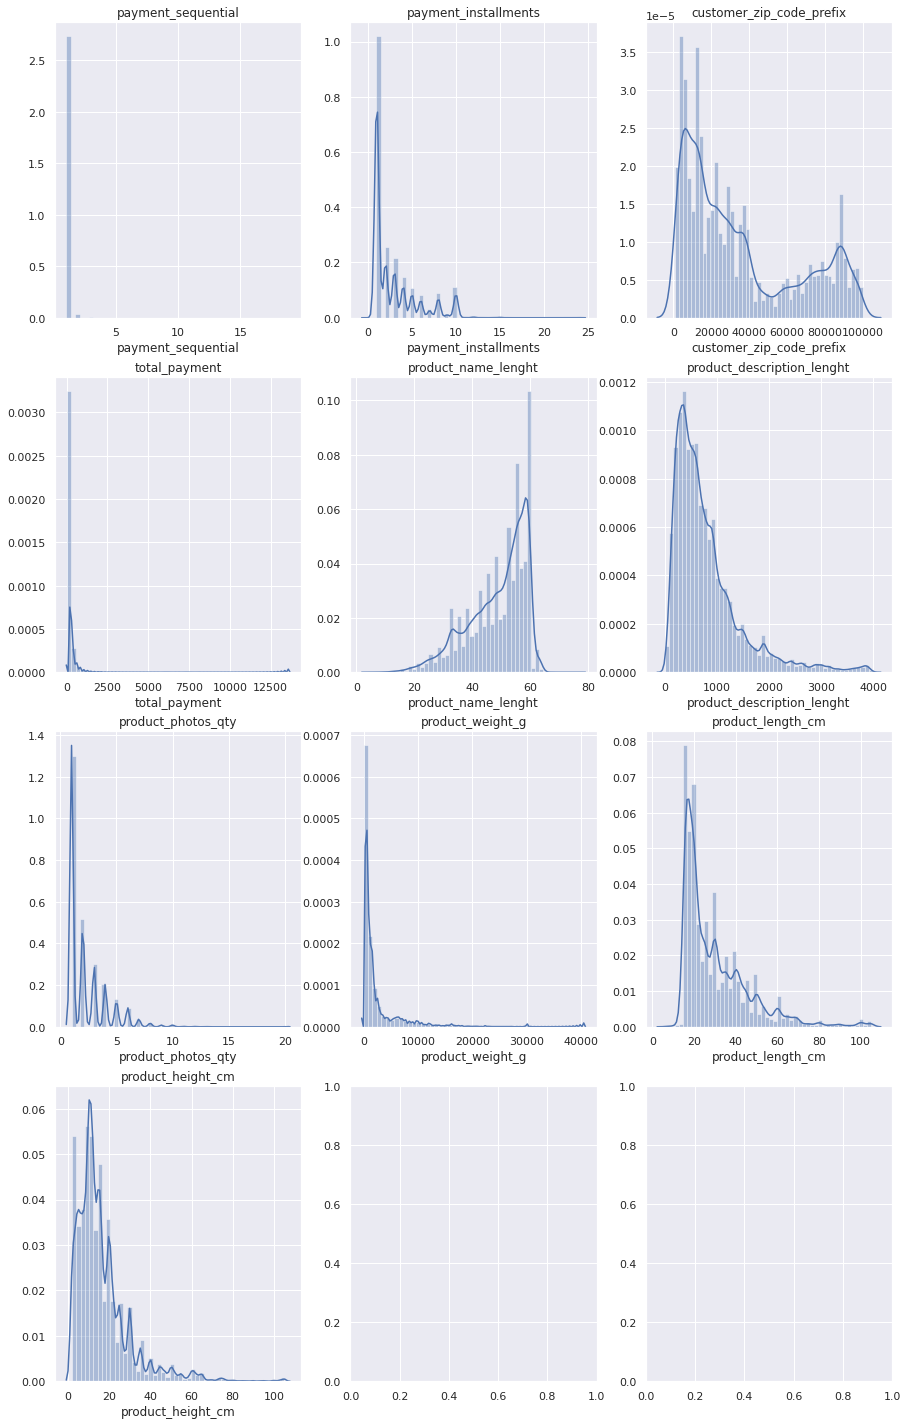

In [148]:
fig, axs = plt.subplots(4, 3, figsize=(15, 25))

X = colQuanti[0]
sns.distplot(data[X], ax=axs[0,0])
axs[0,0].set_title(X)

X = colQuanti[1]
sns.distplot(data[X], ax = axs[0,1])
axs[0,1].set_title(X)



X = colQuanti[2]
sns.distplot(data[X], ax = axs[0,2])
axs[0,2].set_title(X)



X = colQuanti[3]
sns.distplot(data[X], ax = axs[1,0])
axs[1,0].set_title(X)

X = colQuanti[4]
sns.distplot(data[X], ax = axs[1,1])
axs[1,1].set_title(X)

X = colQuanti[5]
sns.distplot(data[X], ax = axs[1,2])
axs[1,2].set_title(X)

X = colQuanti[6]
sns.distplot(data[X], ax = axs[2,0])
axs[2,0].set_title(X)

X = colQuanti[7]
sns.distplot(data[X], ax = axs[2,1])
axs[2,1].set_title(X)

X = colQuanti[8]
sns.distplot(data[X], ax = axs[2,2])
axs[2,2].set_title(X)

X = colQuanti[9]
sns.distplot(data[X], ax = axs[3,0])
axs[3,0].set_title(X)

### correlation

In [149]:
dataCorrelation = data.loc[:, colQuanti]
dataCorrelation

payment_sequential  payment_installments  customer_zip_code_prefix  \
0                       1                     8                     39801   
1                       1                     1                      2422   
2                       1                     1                      2652   
3                       1                     8                     36060   
4                       1                     2                     18570   
...                   ...                   ...                       ...   
96449                   1                     2                     85869   
96450                   1                     1                     12954   
96451                   1                     2                     30210   
96452                   1                     5                     22733   
96453                   1                     1                     23059   

       total_payment  product_name_lenght  product_description_lenght  \
0              99.33                 57.0                       921.0   
1              24.39                 59.0                      1274.0   
2              65.71                 54.0                      1536.0   
3             107.78                 60.0                       188.0   
4             128.45                 54.0                       120.0   
...              ...                  ...                         ...   
96449         198.94                 35.0                       537.0   
96450         363.31                 31.0                       309.0   
96451          96.80                 52.0                       211.0   
96452         369.54                 42.0                      3902.0   
96453         191.58                 60.0                       298.0   

       product_photos_qty  product_weight_g  product_length_cm  \
0                     8.0             800.0               17.0   
1                     2.0             150.0               16.0   
2                     2.0             250.0               20.0   
3                     1.0            1200.0               44.0   
4                     1.0             835.0               40.0   
...                   ...               ...                ...   
96449                 2.0            7400.0               45.0   
96450                 1.0           13450.0               95.0   
96451                 2.0            7000.0               60.0   
96452                 7.0             500.0               22.0   
96453                 1.0            2350.0               33.0   

       product_height_cm  product_width_cm  review_score  \
0                   27.0              17.0             1   
1                    6.0              11.0             5   
2                    8.0              21.0             5   
3                    2.0              35.0             5   
4                    9.0              33.0             5   
...                  ...               ...           ...   
96449               29.0              53.0             5   
96450               30.0              20.0             5   
96451               20.0              30.0             5   
96452                6.0              16.0             5   
96453                7.0              39.0             1   

       seller_zip_code_prefix  distance_customers_sellers  
0                       13321                    7.876056  
1                        4660                    0.197980  
2                        9015                    0.241900  
3                       13405                    4.436087  
4                       14940                    1.504184  
...                       ...                         ...  
96449                   18500                    7.149402  
96450                   15081                    3.583630  
96451                   13232                    4.327234  
96452                   35162                    3.529346  
96453                   13405  

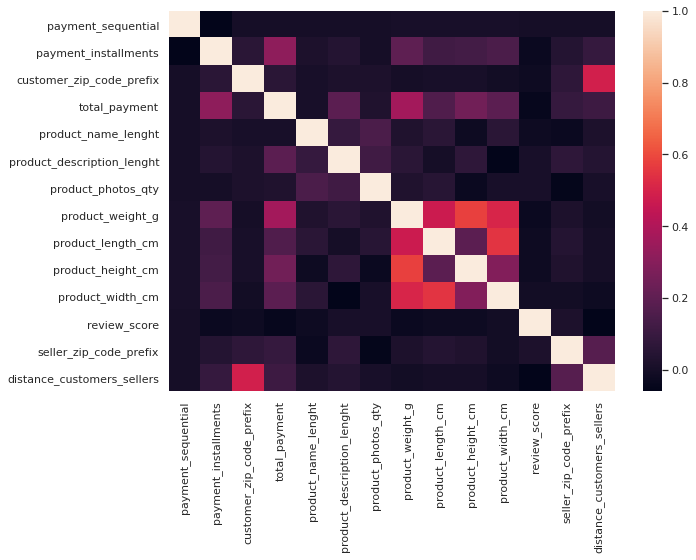

In [150]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)
np.shape(dataCorrelationStd)[1]

from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)


n=np.shape(dataCorrelationStd)[1]
s = (n, n)
tabCorrelation = np.zeros(s)

for i in range(0, n):
    for j in range(0, n):
        tabCorrelation[i, j] = '{:03.2f}'.format(stats.pearsonr(
            dataCorrelationStd[:, i], dataCorrelationStd[:, j])[0])


tabCorrelation = pd.DataFrame(tabCorrelation,
                   columns=colQuanti,\
                             index=colQuanti)

tabCorrelation

fig, ax = plt.subplots(figsize=(10,7)) 

ax = sns.heatmap(tabCorrelation)



In [151]:
dataCorrelation["volume"]=dataCorrelation['product_length_cm'] * dataCorrelation['product_height_cm'] * dataCorrelation['product_width_cm']

In [152]:
dataCorrelation["inertie"]=dataCorrelation['product_length_cm'] * dataCorrelation['product_width_cm']

In [153]:
colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" , 
            "order_purchase_timestamp", "order_delivered_customer_time","shipping_limit_time", "review_answer_time" ]
colQuanti =[ i for i in dataCorrelation.columns.to_list() if not i in colQuali]

In [154]:
colQuanti

['payment_sequential',
 'payment_installments',
 'customer_zip_code_prefix',
 'total_payment',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'review_score',
 'seller_zip_code_prefix',
 'distance_customers_sellers',
 'volume',
 'inertie']

In [155]:
dataCorrelation

payment_sequential  payment_installments  customer_zip_code_prefix  \
0                       1                     8                     39801   
1                       1                     1                      2422   
2                       1                     1                      2652   
3                       1                     8                     36060   
4                       1                     2                     18570   
...                   ...                   ...                       ...   
96449                   1                     2                     85869   
96450                   1                     1                     12954   
96451                   1                     2                     30210   
96452                   1                     5                     22733   
96453                   1                     1                     23059   

       total_payment  product_name_lenght  product_description_lenght  \
0              99.33                 57.0                       921.0   
1              24.39                 59.0                      1274.0   
2              65.71                 54.0                      1536.0   
3             107.78                 60.0                       188.0   
4             128.45                 54.0                       120.0   
...              ...                  ...                         ...   
96449         198.94                 35.0                       537.0   
96450         363.31                 31.0                       309.0   
96451          96.80                 52.0                       211.0   
96452         369.54                 42.0                      3902.0   
96453         191.58                 60.0                       298.0   

       product_photos_qty  product_weight_g  product_length_cm  \
0                     8.0             800.0               17.0   
1                     2.0             150.0               16.0   
2                     2.0             250.0               20.0   
3                     1.0            1200.0               44.0   
4                     1.0             835.0               40.0   
...                   ...               ...                ...   
96449                 2.0            7400.0               45.0   
96450                 1.0           13450.0               95.0   
96451                 2.0            7000.0               60.0   
96452                 7.0             500.0               22.0   
96453                 1.0            2350.0               33.0   

       product_height_cm  product_width_cm  review_score  \
0                   27.0              17.0             1   
1                    6.0              11.0             5   
2                    8.0              21.0             5   
3                    2.0              35.0             5   
4                    9.0              33.0             5   
...                  ...               ...           ...   
96449               29.0              53.0             5   
96450               30.0              20.0             5   
96451               20.0              30.0             5   
96452                6.0              16.0             5   
96453                7.0              39.0             1   

       seller_zip_code_prefix  distance_customers_sellers   volume  inertie  
0                       13321                    7.876056   7803.0    289.0  
1                        4660                    0.197980   1056.0    176.0  
2                        9015                    0.241900   3360.0    420.0  
3                       13405                    4.436087   3080.0   1540.0  
4                       14940                    1.504184  11880.0   1320.0  
...                       ...                         ...      ...      ...  
96449                   18500                    7.149402  69165.0   2385.0  
96450                   15081                    3.583630  57000.0 

In [156]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)

from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)
n=np.shape(dataCorrelationStd)[1]
n

16

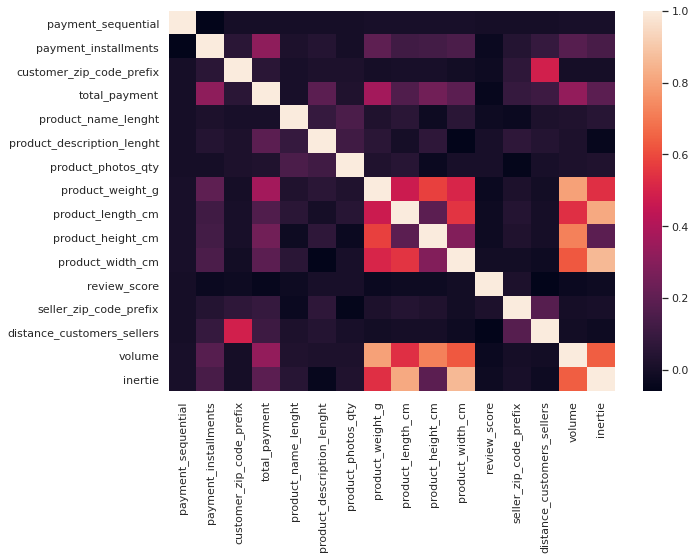

In [157]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)

from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)


n=np.shape(dataCorrelationStd)[1]
s = (n, n)
tabCorrelation = np.zeros(s)

for i in range(0, n):
    for j in range(0, n):
        tabCorrelation[i, j] = '{:03.2f}'.format(stats.pearsonr(
            dataCorrelationStd[:, i], dataCorrelationStd[:, j])[0])


tabCorrelation = pd.DataFrame(tabCorrelation,
                   columns=colQuanti,\
                             index=colQuanti)

tabCorrelation

fig, ax = plt.subplots(figsize=(10,7)) 

ax = sns.heatmap(tabCorrelation)


In [158]:
tabCorrelation

payment_sequential  payment_installments  \
payment_sequential                        1.00                 -0.06   
payment_installments                     -0.06                  1.00   
customer_zip_code_prefix                 -0.00                  0.06   
total_payment                             0.00                  0.32   
product_name_lenght                       0.00                  0.02   
product_description_lenght               -0.00                  0.04   
product_photos_qty                       -0.00                  0.00   
product_weight_g                          0.01                  0.20   
product_length_cm                         0.01                  0.12   
product_height_cm                         0.01                  0.13   
product_width_cm                          0.01                  0.15   
review_score                             -0.00                 -0.03   
seller_zip_code_prefix                   -0.00                  0.04   
distance_customers_sellers                0.00                  0.09   
volume                                    0.01                  0.18   
inertie                                   0.01                  0.14   

                            customer_zip_code_prefix  total_payment  \
payment_sequential                             -0.00           0.00   
payment_installments                            0.06           0.32   
customer_zip_code_prefix                        1.00           0.06   
total_payment                                   0.06           1.00   
product_name_lenght                             0.01           0.01   
product_description_lenght                      0.02           0.19   
product_photos_qty                              0.02           0.03   
product_weight_g                                0.00           0.37   
product_length_cm                               0.01           0.16   
product_height_cm                               0.01           0.25   
product_width_cm                               -0.01           0.19   
review_score                                   -0.02          -0.04   
seller_zip_code_prefix                          0.07           0.09   
distance_customers_sellers                      0.49           0.11   
volume                                          0.00           0.33   
inertie                                        -0.00           0.19   

                            product_name_lenght  product_description_lenght  \
payment_sequential                         0.00                       -0.00   
payment_installments                       0.02                        0.04   
customer_zip_code_prefix                   0.01                        0.02   
total_payment                              0.01                        0.19   
product_name_lenght                        1.00                        0.09   
product_description_lenght                 0.09                        1.00   
product_photos_qty                         0.15                        0.12   
product_weight_g                           0.03                        0.06   
product_length_cm                          0.06                       -0.00   
product_height_cm                         -0.02                        0.07   
product_width_cm                           0.06                       -0.06   
review_score                              -0.02                        0.01   
seller_zip_code_prefix                    -0.03                        0.07   
distance_customers_sellers                 0.02                        0.04   
volume                                     0.03                        0.02   
inertie                                    0.05                       -0.04   

                            product_photos_qty  product_weight_g  \
payment_sequential                       -0.00              0.01   
payment_installments                      0.00              0.20   
customer_zip_code_prefix                  0.02 

In [159]:
dataCorrelation["moment_inertie"]=dataCorrelation['product_weight_g'] * dataCorrelation['product_length_cm'] * dataCorrelation['product_width_cm']

In [160]:
colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" , 
            "order_purchase_timestamp", "order_delivered_customer_time","shipping_limit_time", "review_answer_time" ]
colQuanti =[ i for i in dataCorrelation.columns.to_list() if not i in colQuali]

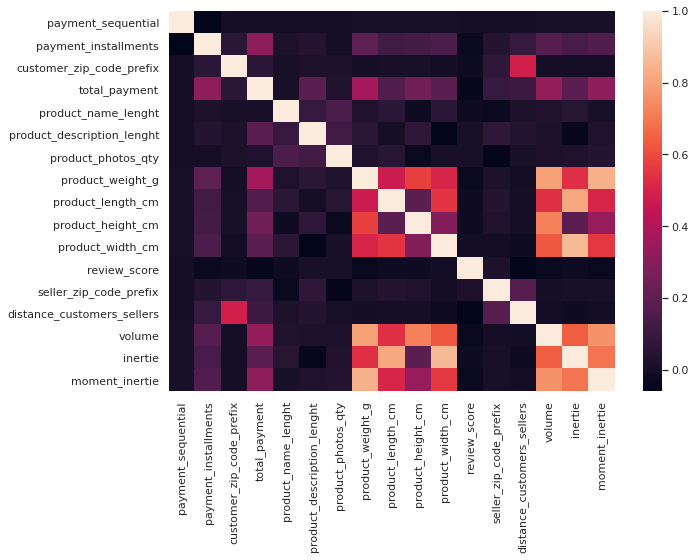

In [161]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)

from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)


n=np.shape(dataCorrelationStd)[1]
s = (n, n)
tabCorrelation = np.zeros(s)

for i in range(0, n):
    for j in range(0, n):
        tabCorrelation[i, j] = '{:03.2f}'.format(stats.pearsonr(
            dataCorrelationStd[:, i], dataCorrelationStd[:, j])[0])


tabCorrelation = pd.DataFrame(tabCorrelation,
                   columns=colQuanti,\
                             index=colQuanti)

tabCorrelation

fig, ax = plt.subplots(figsize=(10,7)) 

ax = sns.heatmap(tabCorrelation)


In [162]:
tabCorrelation

payment_sequential  payment_installments  \
payment_sequential                        1.00                 -0.06   
payment_installments                     -0.06                  1.00   
customer_zip_code_prefix                 -0.00                  0.06   
total_payment                             0.00                  0.32   
product_name_lenght                       0.00                  0.02   
product_description_lenght               -0.00                  0.04   
product_photos_qty                       -0.00                  0.00   
product_weight_g                          0.01                  0.20   
product_length_cm                         0.01                  0.12   
product_height_cm                         0.01                  0.13   
product_width_cm                          0.01                  0.15   
review_score                             -0.00                 -0.03   
seller_zip_code_prefix                   -0.00                  0.04   
distance_customers_sellers                0.00                  0.09   
volume                                    0.01                  0.18   
inertie                                   0.01                  0.14   
moment_inertie                            0.01                  0.16   

                            customer_zip_code_prefix  total_payment  \
payment_sequential                             -0.00           0.00   
payment_installments                            0.06           0.32   
customer_zip_code_prefix                        1.00           0.06   
total_payment                                   0.06           1.00   
product_name_lenght                             0.01           0.01   
product_description_lenght                      0.02           0.19   
product_photos_qty                              0.02           0.03   
product_weight_g                                0.00           0.37   
product_length_cm                               0.01           0.16   
product_height_cm                               0.01           0.25   
product_width_cm                               -0.01           0.19   
review_score                                   -0.02          -0.04   
seller_zip_code_prefix                          0.07           0.09   
distance_customers_sellers                      0.49           0.11   
volume                                          0.00           0.33   
inertie                                        -0.00           0.19   
moment_inertie                                 -0.00           0.32   

                            product_name_lenght  product_description_lenght  \
payment_sequential                         0.00                       -0.00   
payment_installments                       0.02                        0.04   
customer_zip_code_prefix                   0.01                        0.02   
total_payment                              0.01                        0.19   
product_name_lenght                        1.00                        0.09   
product_description_lenght                 0.09                        1.00   
product_photos_qty                         0.15                        0.12   
product_weight_g                           0.03                        0.06   
product_length_cm                          0.06                       -0.00   
product_height_cm                         -0.02                        0.07   
product_width_cm                           0.06                       -0.06   
review_score                              -0.02                        0.01   
seller_zip_code_prefix                    -0.03                        0.07   
distance_customers_sellers                 0.02                        0.04   
volume                                     0.03                        0.02   
inertie                                    0.05                       -0.04   
moment_inertie                             0.01                        0.03   

                            p

In [163]:
colQuanti

['payment_sequential',
 'payment_installments',
 'customer_zip_code_prefix',
 'total_payment',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'review_score',
 'seller_zip_code_prefix',
 'distance_customers_sellers',
 'volume',
 'inertie',
 'moment_inertie']

In [164]:
dataCorrelation = dataCorrelation.drop(["product_weight_g", "product_length_cm", "product_width_cm", "volume","moment_inertie" ], axis=1)

In [165]:
colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" , 
            "order_purchase_timestamp", "order_delivered_customer_time","shipping_limit_time", "review_answer_time" ]
colQuanti =[ i for i in dataCorrelation.columns.to_list() if not i in colQuali]

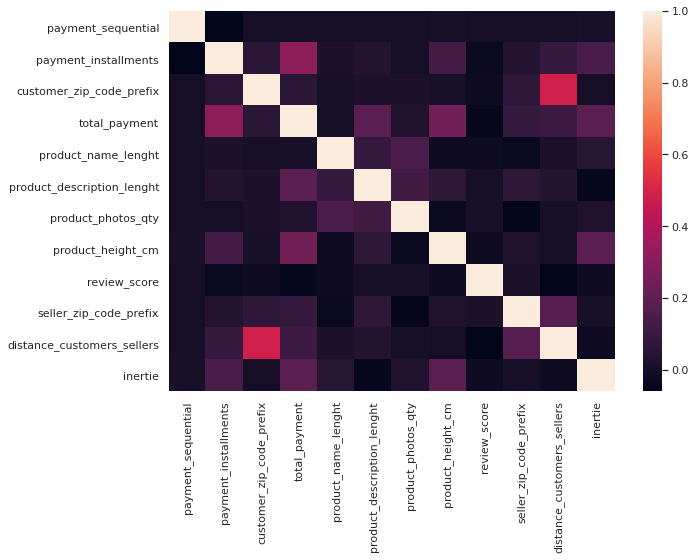

In [166]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)

from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)


n=np.shape(dataCorrelationStd)[1]
s = (n, n)
tabCorrelation = np.zeros(s)

for i in range(0, n):
    for j in range(0, n):
        tabCorrelation[i, j] = '{:03.2f}'.format(stats.pearsonr(
            dataCorrelationStd[:, i], dataCorrelationStd[:, j])[0])


tabCorrelation = pd.DataFrame(tabCorrelation,
                   columns=colQuanti,\
                             index=colQuanti)

tabCorrelation

fig, ax = plt.subplots(figsize=(10,7)) 

ax = sns.heatmap(tabCorrelation)

In [167]:
tabCorrelation

payment_sequential  payment_installments  \
payment_sequential                        1.00                 -0.06   
payment_installments                     -0.06                  1.00   
customer_zip_code_prefix                 -0.00                  0.06   
total_payment                             0.00                  0.32   
product_name_lenght                       0.00                  0.02   
product_description_lenght               -0.00                  0.04   
product_photos_qty                       -0.00                  0.00   
product_height_cm                         0.01                  0.13   
review_score                             -0.00                 -0.03   
seller_zip_code_prefix                   -0.00                  0.04   
distance_customers_sellers                0.00                  0.09   
inertie                                   0.01                  0.14   

                            customer_zip_code_prefix  total_payment  \
payment_sequential                             -0.00           0.00   
payment_installments                            0.06           0.32   
customer_zip_code_prefix                        1.00           0.06   
total_payment                                   0.06           1.00   
product_name_lenght                             0.01           0.01   
product_description_lenght                      0.02           0.19   
product_photos_qty                              0.02           0.03   
product_height_cm                               0.01           0.25   
review_score                                   -0.02          -0.04   
seller_zip_code_prefix                          0.07           0.09   
distance_customers_sellers                      0.49           0.11   
inertie                                        -0.00           0.19   

                            product_name_lenght  product_description_lenght  \
payment_sequential                         0.00                       -0.00   
payment_installments                       0.02                        0.04   
customer_zip_code_prefix                   0.01                        0.02   
total_payment                              0.01                        0.19   
product_name_lenght                        1.00                        0.09   
product_description_lenght                 0.09                        1.00   
product_photos_qty                         0.15                        0.12   
product_height_cm                         -0.02                        0.07   
review_score                              -0.02                        0.01   
seller_zip_code_prefix                    -0.03                        0.07   
distance_customers_sellers                 0.02                        0.04   
inertie                                    0.05                       -0.04   

                            product_photos_qty  product_height_cm  \
payment_sequential                       -0.00               0.01   
payment_installments                      0.00               0.13   
customer_zip_code_prefix                  0.02               0.01   
total_payment                             0.03               0.25   
product_name_lenght                       0.15              -0.02   
product_description_lenght                0.12               0.07   
product_photos_qty                        1.00              -0.03   
product_height_cm                        -0.03               1.00   
review_score                              0.01              -0.02   
seller_zip_code_prefix                   -0.05               0.03   
distance_customers_sellers                0.01              -0.00   
inertie                                   0.03               0.19   

                            review_score  seller_zip_code_prefix  \
payment_sequential                 -0.00                   -0.00   
payment_installments               -0.03                    0.04   
customer_zip_code_prefix           -0

In [168]:
dataCorrelation.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23])

In [169]:
# dataCorrelation = dataCorrelation.drop(["payment_installments",  "customer_zip_code_prefix", "product_height_cm",
#                                         "seller_zip_code_prefix" ], axis=1)

In [170]:
colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" ,
            "order_purchase_timestamp", "order_delivered_customer_time","shipping_limit_time", "review_answer_time" ]
colQuanti =[ i for i in dataCorrelation.columns.to_list() if not i in colQuali]

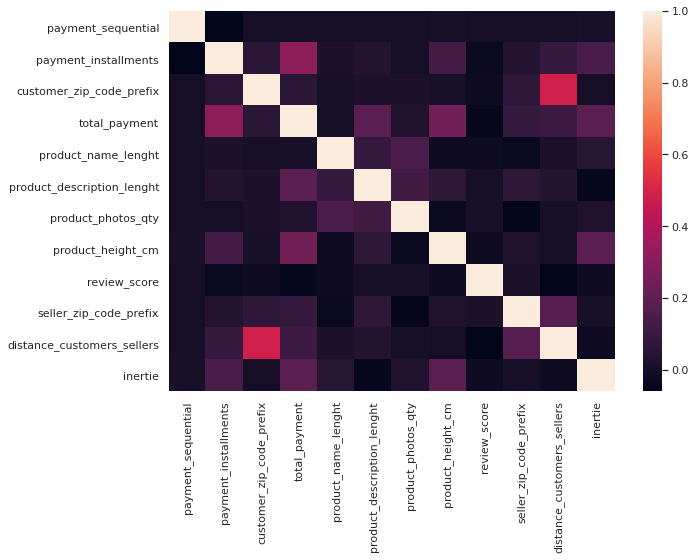

In [171]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)

from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)


n=np.shape(dataCorrelationStd)[1]
s = (n, n)
tabCorrelation = np.zeros(s)

for i in range(0, n):
    for j in range(0, n):
        tabCorrelation[i, j] = '{:03.2f}'.format(stats.pearsonr(
            dataCorrelationStd[:, i], dataCorrelationStd[:, j])[0])


tabCorrelation = pd.DataFrame(tabCorrelation,
                   columns=colQuanti,\
                             index=colQuanti)

tabCorrelation

fig, ax = plt.subplots(figsize=(10,7)) 

ax = sns.heatmap(tabCorrelation)

In [172]:
tabCorrelation

payment_sequential  payment_installments  \
payment_sequential                        1.00                 -0.06   
payment_installments                     -0.06                  1.00   
customer_zip_code_prefix                 -0.00                  0.06   
total_payment                             0.00                  0.32   
product_name_lenght                       0.00                  0.02   
product_description_lenght               -0.00                  0.04   
product_photos_qty                       -0.00                  0.00   
product_height_cm                         0.01                  0.13   
review_score                             -0.00                 -0.03   
seller_zip_code_prefix                   -0.00                  0.04   
distance_customers_sellers                0.00                  0.09   
inertie                                   0.01                  0.14   

                            customer_zip_code_prefix  total_payment  \
payment_sequential                             -0.00           0.00   
payment_installments                            0.06           0.32   
customer_zip_code_prefix                        1.00           0.06   
total_payment                                   0.06           1.00   
product_name_lenght                             0.01           0.01   
product_description_lenght                      0.02           0.19   
product_photos_qty                              0.02           0.03   
product_height_cm                               0.01           0.25   
review_score                                   -0.02          -0.04   
seller_zip_code_prefix                          0.07           0.09   
distance_customers_sellers                      0.49           0.11   
inertie                                        -0.00           0.19   

                            product_name_lenght  product_description_lenght  \
payment_sequential                         0.00                       -0.00   
payment_installments                       0.02                        0.04   
customer_zip_code_prefix                   0.01                        0.02   
total_payment                              0.01                        0.19   
product_name_lenght                        1.00                        0.09   
product_description_lenght                 0.09                        1.00   
product_photos_qty                         0.15                        0.12   
product_height_cm                         -0.02                        0.07   
review_score                              -0.02                        0.01   
seller_zip_code_prefix                    -0.03                        0.07   
distance_customers_sellers                 0.02                        0.04   
inertie                                    0.05                       -0.04   

                            product_photos_qty  product_height_cm  \
payment_sequential                       -0.00               0.01   
payment_installments                      0.00               0.13   
customer_zip_code_prefix                  0.02               0.01   
total_payment                             0.03               0.25   
product_name_lenght                       0.15              -0.02   
product_description_lenght                0.12               0.07   
product_photos_qty                        1.00              -0.03   
product_height_cm                        -0.03               1.00   
review_score                              0.01              -0.02   
seller_zip_code_prefix                   -0.05               0.03   
distance_customers_sellers                0.01              -0.00   
inertie                                   0.03               0.19   

                            review_score  seller_zip_code_prefix  \
payment_sequential                 -0.00                   -0.00   
payment_installments               -0.03                    0.04   
customer_zip_code_prefix           -0

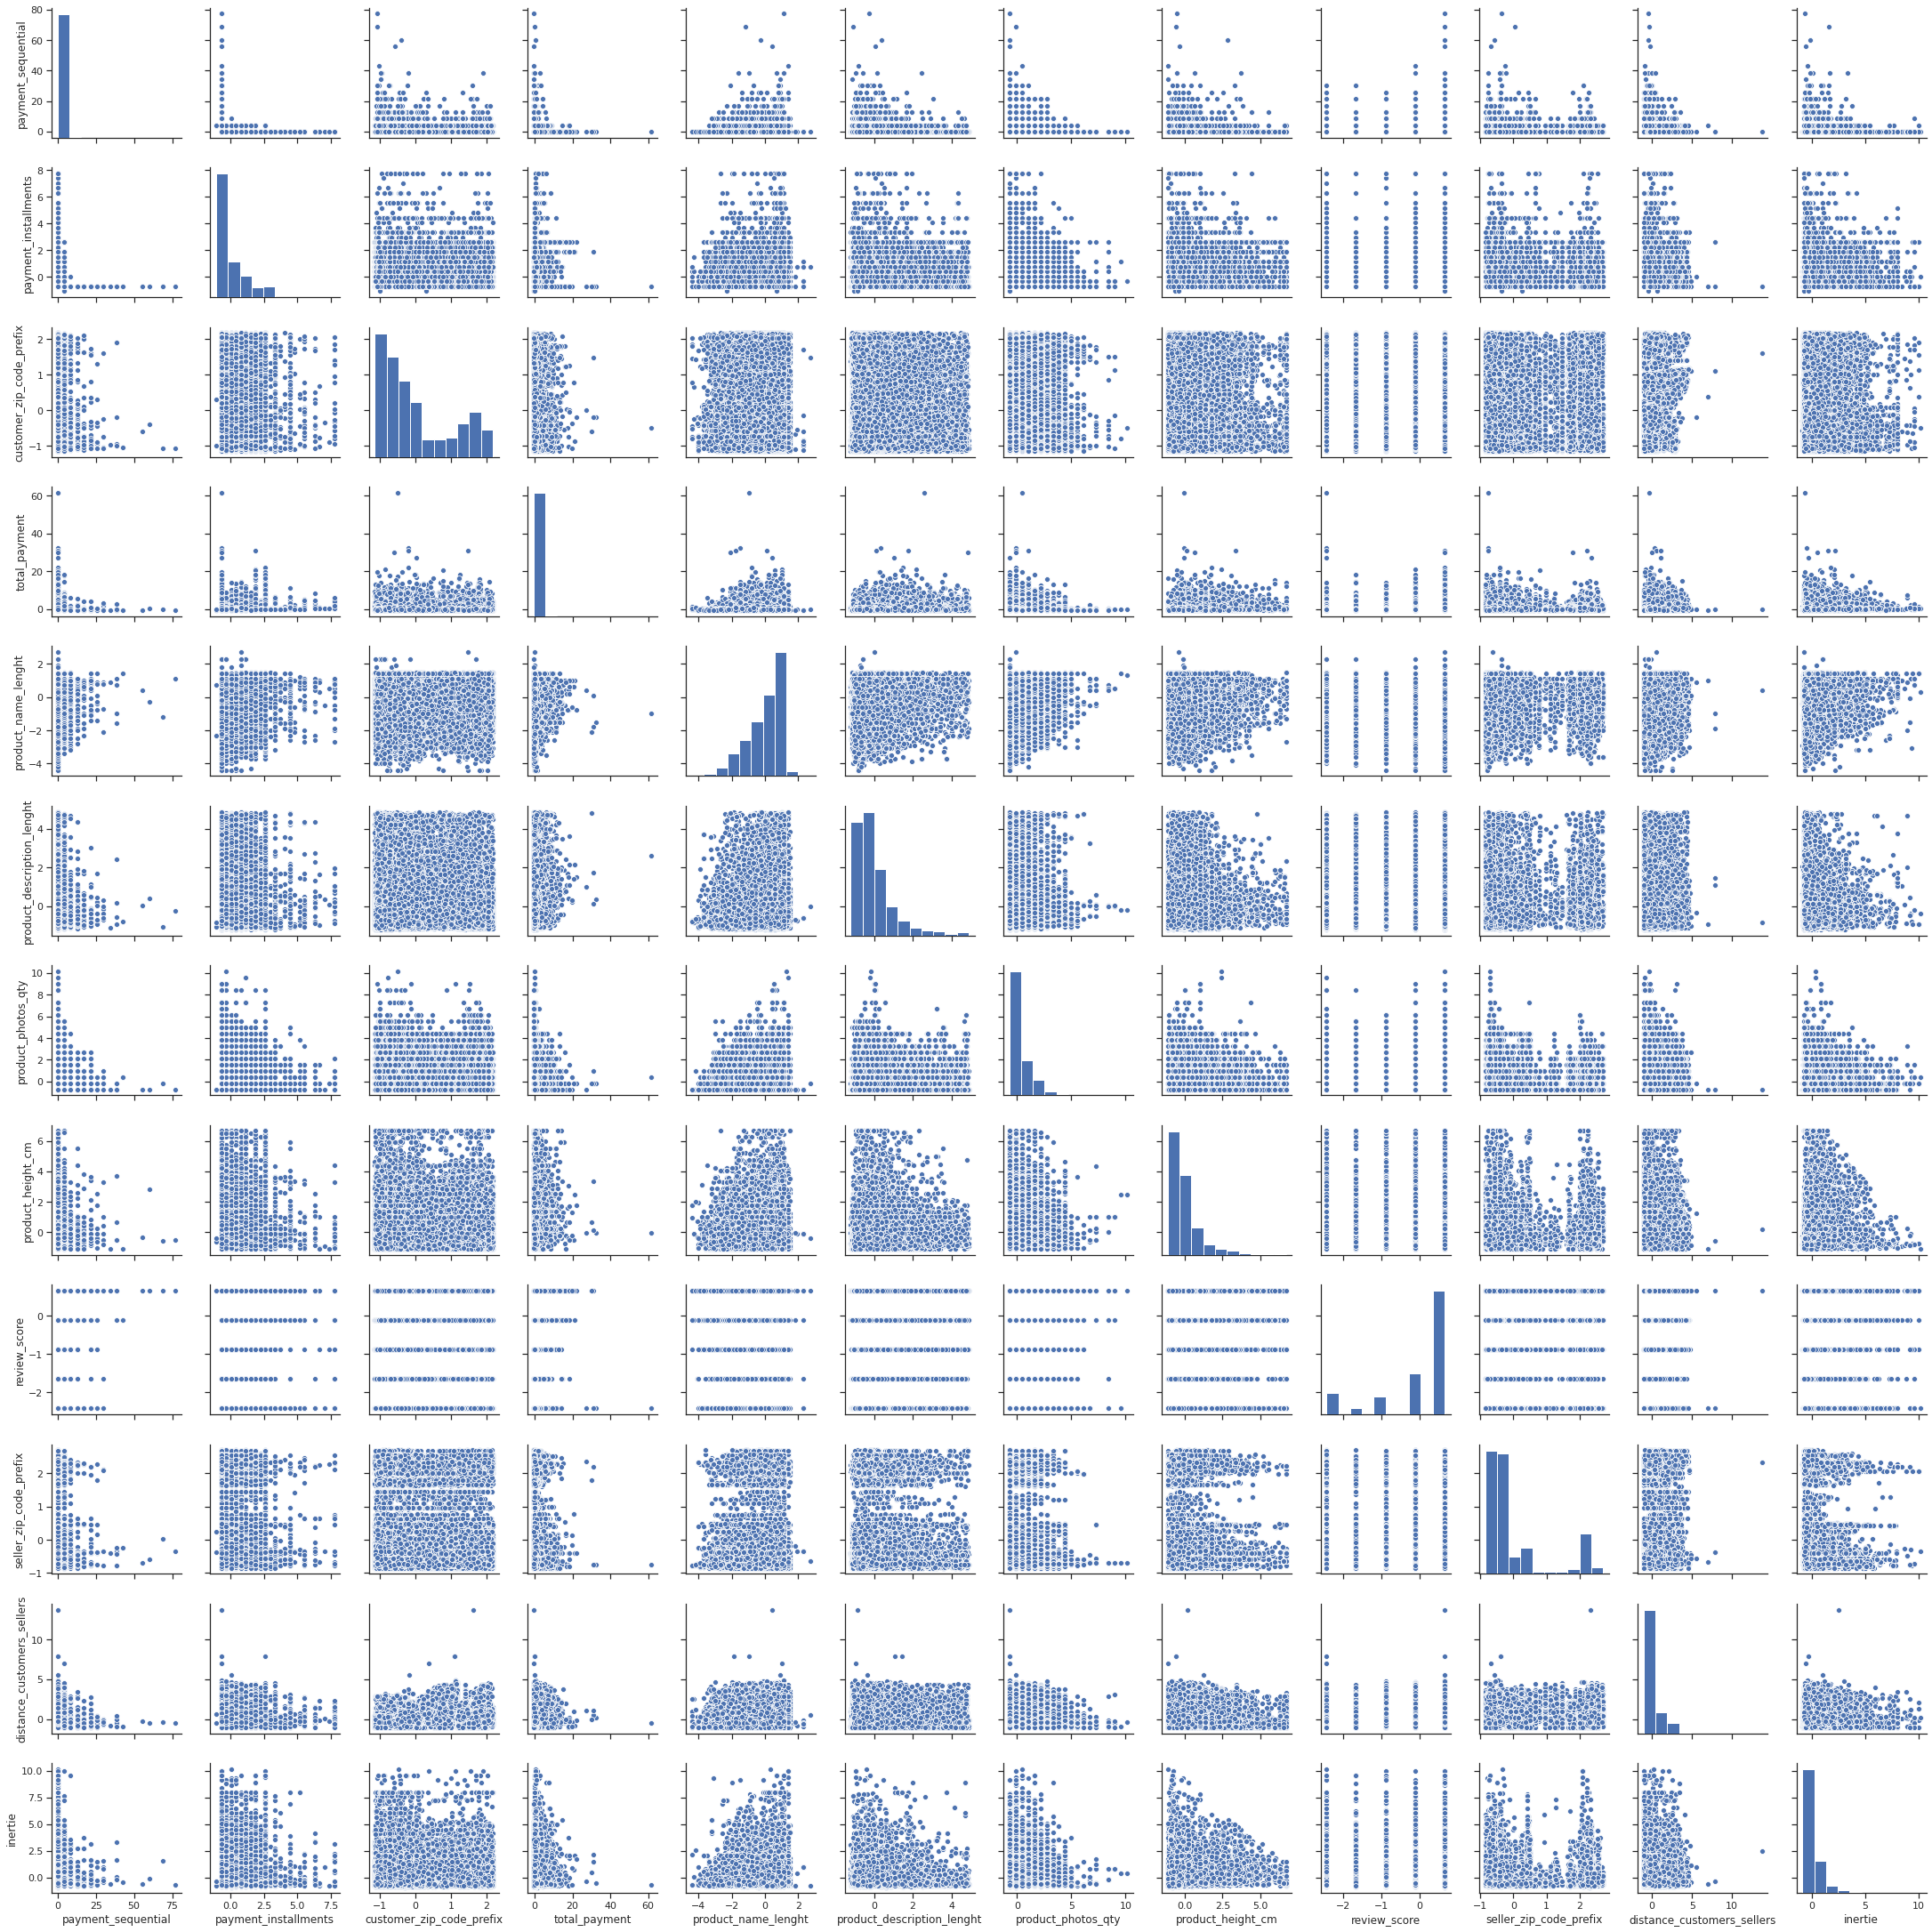

In [173]:
dataCorrelation_scaled = pd.DataFrame(scaler.transform(dataCorrelation),columns = dataCorrelation.columns)
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(dataCorrelation_scaled)

In [173]:
dataCorrelation.columns.to_list()

['payment_sequential',
 'payment_installments',
 'customer_zip_code_prefix',
 'total_payment',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_height_cm',
 'review_score',
 'seller_zip_code_prefix',
 'distance_customers_sellers',
 'inertie']

In [174]:
colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" , "order_delivered_customer_time",
            "order_purchase_timestamp", "order_delivered_customer_time","shipping_limit_time", "review_answer_time" ]
colQuanti =[ i for i in data.columns.to_list() if not i in colQuali]

coladrop =[ i for i in colQuanti if not i in dataCorrelation.columns.to_list()]
coladrop

['product_weight_g', 'product_length_cm', 'product_width_cm']

In [175]:
data["inertie"] = dataCorrelation["inertie"]

#### __drop__ col quanti trop correlees

'product_weight_g', 'product_length_cm', 'product_width_cm'

In [176]:
data

payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix customer_state order_delivered_customer_time  \
0                         39801             MG              13 days 19:35:02   
1                          2422             SP               3 days 09:30:31   
2                          2652             SP               6 days 06:04:46   
3                         36060             MG              14 days 13:31:45   
4                         18570             SP              11 days 07:45:36   
...                         ...            ...                           ...   
96449                     85869             PR               6 days 05:18:43   
96450                     12954             SP               7 days 20:12:28   
96451                     30210             MG               5 days 12:40:21   
96452                     22733             RJ              13 days 23:15:33   
96453                     23059             RJ              62 days 06:40:34   

      shipping_limit_time  total_payment  product_name_lenght  \
0         7 days 00:13:20          99.33                 57.0   
1         6 days 00:17:20          24.39                 59.0   
2        13 days 22:32:39          65.71                 54.0   
3         6 days 00:09:14         107.78                 60.0   
4        10 days 02:15:24         128.45                 54.0   
...                   ...            ...                  ...   
96449     6 days 00:21:12         198.94                 35.0   
96450     6 days 10:58:02         363.31                 31.0   
96451     6 days 00:19:21          96.80                 52.0   
96452     6 days 00:18:47         369.54                 42.0   
96453     6 days 18:31:34         191.58                 60.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           921.0                 8.0             800.0   
1                          1274.0                 2.0             150.0   
2                          1536.0                 2.0             250.0   
3                           188.0                 1.0            1200.0   
4                           120.0                 1.0             835.0   
...                           ...                 ...               ...   
96449                       537.0                 2.0            7400.0   
96450                       309.0                 1.0           13450.0   
9645

In [177]:
data = data.drop(coladrop, axis = 1)

In [178]:
data

payment_sequential payment_type  payment_installments  \
0                       1  credit_card                     8   
1                       1  credit_card                     1   
2                       1  credit_card                     1   
3                       1  credit_card                     8   
4                       1  credit_card                     2   
...                   ...          ...                   ...   
96449                   1  credit_card                     2   
96450                   1       boleto                     1   
96451                   1  credit_card                     2   
96452                   1  credit_card                     5   
96453                   1       boleto                     1   

      order_purchase_timestamp                customer_unique_id  \
0          2018-04-25 22:01:49  708ab75d2a007f0564aedd11139c7708   
1          2018-06-26 11:01:38  a8b9d3a27068454b1c98cc67d4e31e6f   
2          2017-12-12 11:19:55  6f70c0b2f7552832ba46eb57b1c5651e   
3          2017-12-06 12:04:06  87695ed086ebd36f20404c82d20fca87   
4          2018-05-21 13:59:17  4291db0da71914754618cd789aebcd56   
...                        ...                               ...   
96449      2018-05-16 12:09:45  13f283df2f4760f22b57830865761d07   
96450      2018-03-08 16:57:23  b6027ac07fb76ebca8c97b1887865aee   
96451      2017-08-18 09:45:35  53b30ca78efb2b7efcd3f9e461587eb2   
96452      2018-08-07 23:26:13  b84dc68f02f122a88d7e7bbd37b06204   
96453      2017-12-05 08:18:35  b1f51a4e19da3338e51fbcfabefad1bf   

       customer_zip_code_prefix customer_state order_delivered_customer_time  \
0                         39801             MG              13 days 19:35:02   
1                          2422             SP               3 days 09:30:31   
2                          2652             SP               6 days 06:04:46   
3                         36060             MG              14 days 13:31:45   
4                         18570             SP              11 days 07:45:36   
...                         ...            ...                           ...   
96449                     85869             PR               6 days 05:18:43   
96450                     12954             SP               7 days 20:12:28   
96451                     30210             MG               5 days 12:40:21   
96452                     22733             RJ              13 days 23:15:33   
96453                     23059             RJ              62 days 06:40:34   

      shipping_limit_time  total_payment  product_name_lenght  \
0         7 days 00:13:20          99.33                 57.0   
1         6 days 00:17:20          24.39                 59.0   
2        13 days 22:32:39          65.71                 54.0   
3         6 days 00:09:14         107.78                 60.0   
4        10 days 02:15:24         128.45                 54.0   
...                   ...            ...                  ...   
96449     6 days 00:21:12         198.94                 35.0   
96450     6 days 10:58:02         363.31                 31.0   
96451     6 days 00:19:21          96.80                 52.0   
96452     6 days 00:18:47         369.54                 42.0   
96453     6 days 18:31:34         191.58                 60.0   

       product_description_lenght  product_photos_qty  product_height_cm  \
0                           921.0                 8.0               27.0   
1                          1274.0                 2.0                6.0   
2                          1536.0                 2.0                8.0   
3                           188.0                 1.0                2.0   
4                           120.0                 1.0                9.0   
...                           ...                 ...                ...   
96449                       537.0                 2.0               29.0   
96450                       309.0                 1.0               30.

### date and time

In [179]:
coltime =  ["order_purchase_timestamp", "order_delivered_customer_time","shipping_limit_time", "review_answer_time"]


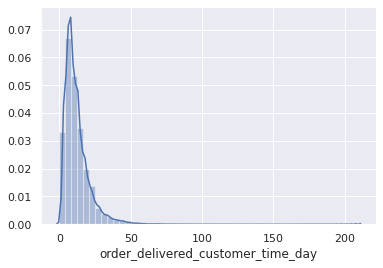

In [180]:
data["order_delivered_customer_time_day"] = data["order_delivered_customer_time"].apply(lambda x : x.days)
sns.distplot(data["order_delivered_customer_time_day"], kde=True)


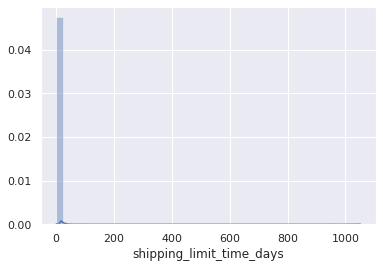

In [181]:
data["shipping_limit_time_days"] = data["shipping_limit_time"].apply(lambda x : x.days)
sns.distplot(data["shipping_limit_time_days"], kde=True)

In [182]:
data.loc[data.shipping_limit_time_days > 200]

payment_sequential payment_type  payment_installments  \
11480                   1  credit_card                    15   

      order_purchase_timestamp                customer_unique_id  \
11480      2017-05-23 22:28:36  44b6bbfea26596437062a38c8e6bcec1   

       customer_zip_code_prefix customer_state order_delivered_customer_time  \
11480                     15040             SP              16 days 15:07:18   

      shipping_limit_time  total_payment  product_name_lenght  \
11480  1052 days 00:06:32         322.86                 58.0   

       product_description_lenght  product_photos_qty  product_height_cm  \
11480                       914.0                 5.0               30.0   

      product_category_name_english  review_score review_answer_time  \
11480                    housewares             5    2 days 13:24:30   

       seller_zip_code_prefix seller_state  distance_customers_sellers  \
11480                   37590           MG                     3.17413   

       inertie  order_delivered_customer_time_day  shipping_limit_time_days  
11480    875.0                                 16                      1052

#### __suprime__  1 outlier shipping_limit_time_days

In [183]:
data = data.drop(data.loc[data.shipping_limit_time_days > 200].index[0])

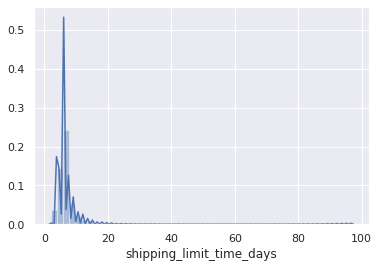

In [184]:
sns.distplot(data["shipping_limit_time_days"], kde=True)

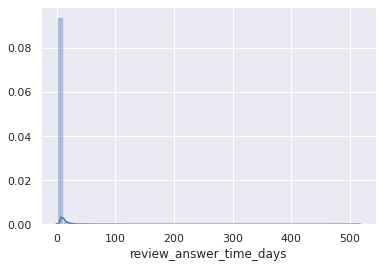

In [185]:
data["review_answer_time_days"] = data["review_answer_time"].apply(lambda x : x.days)
sns.distplot(data["review_answer_time_days"], kde=True)

#### tranforme col date en colQuanti

In [186]:
data["order_purchase_timestamp_month"] = data["order_purchase_timestamp"].apply(lambda x : x.month)
data["order_purchase_timestamp_year"] = data["order_purchase_timestamp"].apply(lambda x : x.year)
data.loc[data["order_purchase_timestamp_year"]==2017]["order_purchase_timestamp_month"].unique()
data.loc[data["order_purchase_timestamp_year"]==2018]["order_purchase_timestamp_month"].unique()
data = data.drop(["order_purchase_timestamp", "order_delivered_customer_time","shipping_limit_time", "review_answer_time"], axis=1)

In [187]:
colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" ]
colQuanti =[ i for i in data.columns.to_list() if not i in colQuali]
dataCorrelation = data.loc[:, colQuanti]

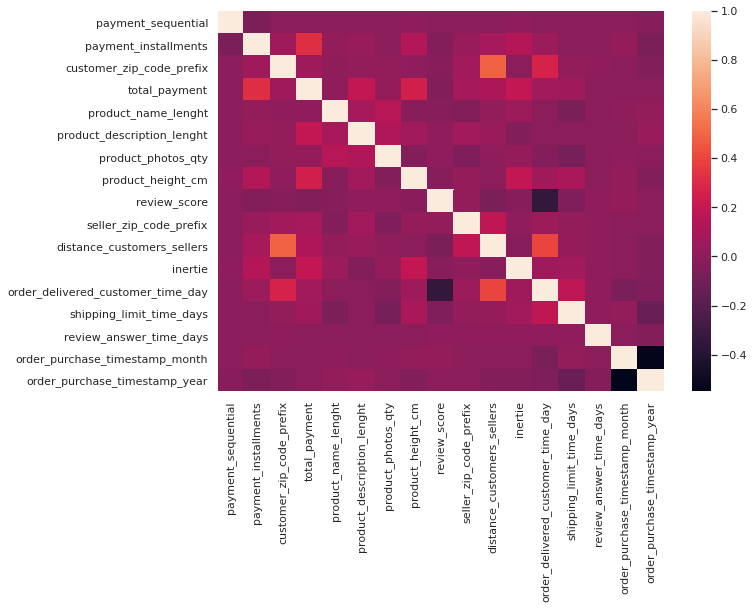

In [188]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)

from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)


n=np.shape(dataCorrelationStd)[1]
s = (n, n)
tabCorrelation = np.zeros(s)

for i in range(0, n):
    for j in range(0, n):
        tabCorrelation[i, j] = '{:03.2f}'.format(stats.pearsonr(
            dataCorrelationStd[:, i], dataCorrelationStd[:, j])[0])


tabCorrelation = pd.DataFrame(tabCorrelation,
                   columns=colQuanti,\
                             index=colQuanti)

tabCorrelation

fig, ax = plt.subplots(figsize=(10,7)) 

ax = sns.heatmap(tabCorrelation)

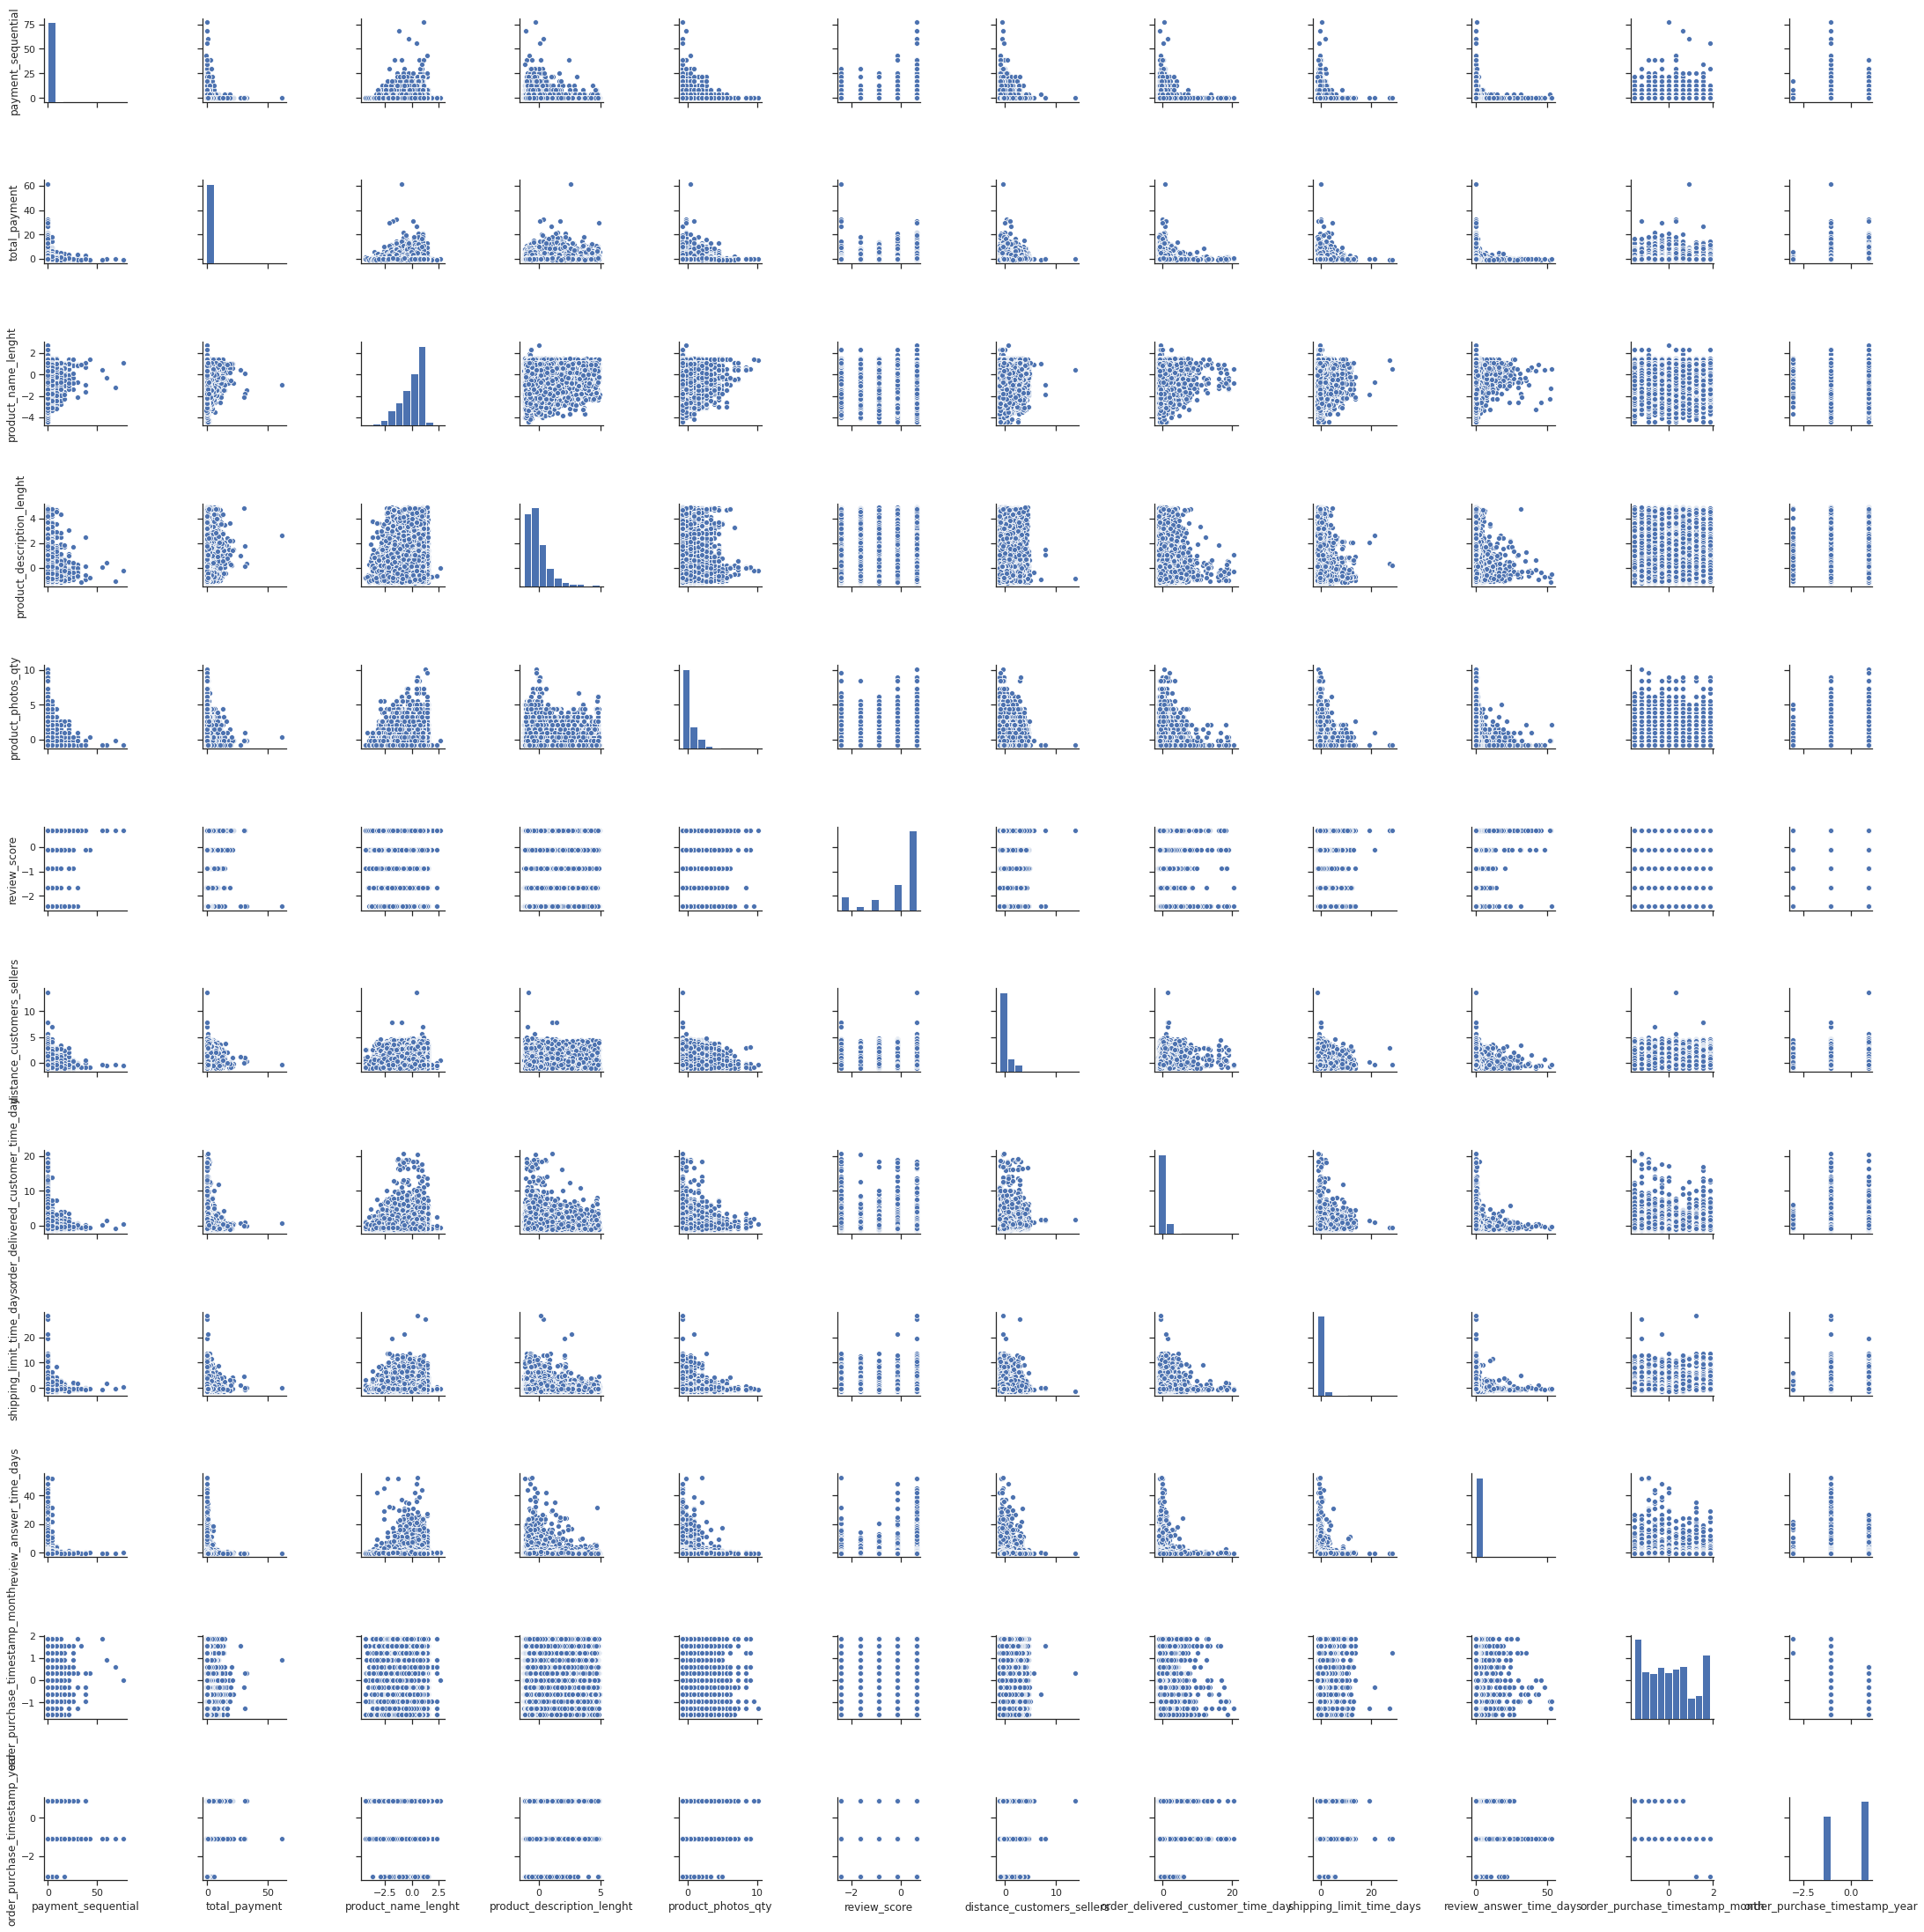

In [200]:
dataCorrelation_scaled = pd.DataFrame(scaler.transform(dataCorrelation),columns = dataCorrelation.columns)
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(dataCorrelation_scaled)

In [189]:
tabCorrelation

payment_sequential  payment_installments  \
payment_sequential                               1.00                 -0.06   
payment_installments                            -0.06                  1.00   
customer_zip_code_prefix                        -0.00                  0.06   
total_payment                                    0.00                  0.32   
product_name_lenght                              0.00                  0.02   
product_description_lenght                      -0.00                  0.04   
product_photos_qty                              -0.00                  0.00   
product_height_cm                                0.01                  0.13   
review_score                                    -0.00                 -0.03   
seller_zip_code_prefix                          -0.00                  0.04   
distance_customers_sellers                       0.00                  0.09   
inertie                                          0.01                  0.14   
order_delivered_customer_time_day                0.00                  0.05   
shipping_limit_time_days                         0.00                 -0.00   
review_answer_time_days                          0.00                  0.00   
order_purchase_timestamp_month                   0.00                  0.03   
order_purchase_timestamp_year                   -0.02                 -0.06   

                                   customer_zip_code_prefix  total_payment  \
payment_sequential                                    -0.00           0.00   
payment_installments                                   0.06           0.32   
customer_zip_code_prefix                               1.00           0.06   
total_payment                                          0.06           1.00   
product_name_lenght                                    0.01           0.01   
product_description_lenght                             0.02           0.19   
product_photos_qty                                     0.02           0.03   
product_height_cm                                      0.01           0.25   
review_score                                          -0.02          -0.04   
seller_zip_code_prefix                                 0.07           0.09   
distance_customers_sellers                             0.49           0.11   
inertie                                               -0.00           0.19   
order_delivered_customer_time_day                      0.27           0.07   
shipping_limit_time_days                               0.02           0.06   
review_answer_time_days                                0.01          -0.00   
order_purchase_timestamp_month                        -0.00           0.00   
order_purchase_timestamp_year                         -0.04           0.00   

                                   product_name_lenght  \
payment_sequential                                0.00   
payment_installments                              0.02   
customer_zip_code_prefix                          0.01   
total_payment                                     0.01   
product_name_lenght                               1.00   
product_description_lenght                        0.09   
product_photos_qty                                0.15   
product_height_cm                                -0.02   
review_score                                     -0.02   
seller_zip_code_prefix                           -0.03   
distance_customers_sellers                        0.02   
inertie                                           0.05   
order_delivered_customer_time_day                -0.00   
shipping_limit_time_days                         -0.06   
review_answer_time_days                          -0.00   
order_purchase_timestamp_month                    0.01   
order_purchase_timestamp_year                     0.02   

                                   product_description_lenght  \
payment_sequential                                      -0.00   
payment_installments            

In [190]:
# ax = sns.scatterplot(x="order_delivered_customer_time_day", y="distance_customers_sellers", data=dataCorrelation)

In [191]:

# ax = sns.scatterplot(x="shipping_limit_time_days", y="order_delivered_customer_time_day", data=dataCorrelation)

In [192]:
# ax = sns.scatterplot(x="shipping_limit_time_days", y="order_delivered_customer_time_day", data=data)

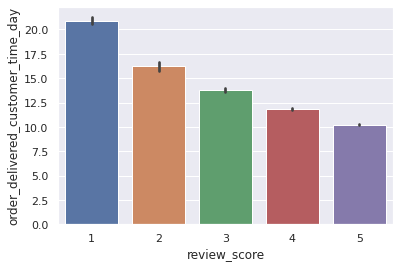

In [193]:
# >>> import seaborn as sns
# >>> sns.set(style="whitegrid")
ax = sns.barplot(x="review_score", y="order_delivered_customer_time_day", data=dataCorrelation)

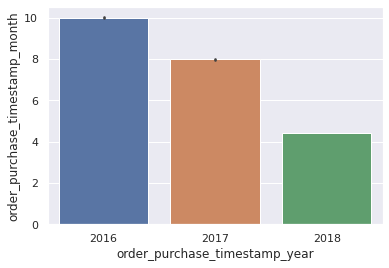

In [194]:
ax = sns.barplot(x="order_purchase_timestamp_year", y="order_purchase_timestamp_month", data=dataCorrelation)

In [195]:

colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" ]
colQuanti =[ i for i in data.columns.to_list() if not i in colQuali]
dataCorrelation = data.loc[:, colQuanti]

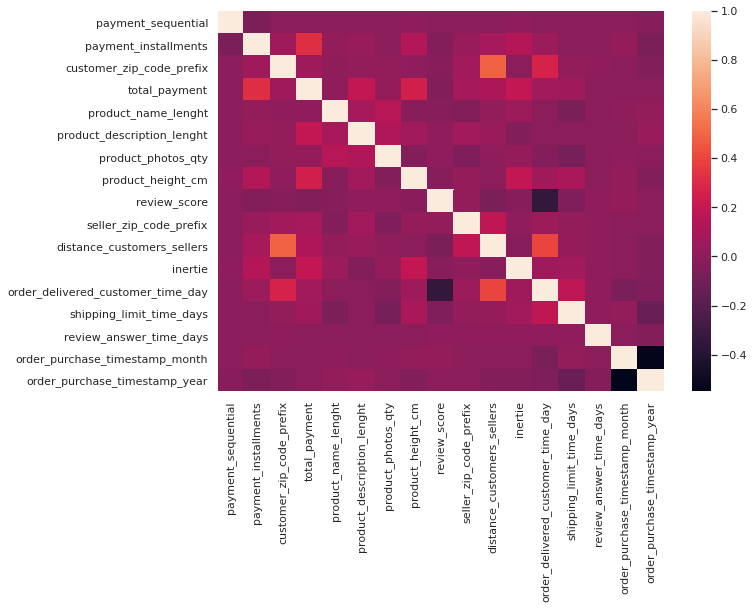

In [196]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)

from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()


scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)


n=np.shape(dataCorrelationStd)[1]
s = (n, n)
tabCorrelation = np.zeros(s)

for i in range(0, n):
    for j in range(0, n):
        tabCorrelation[i, j] = '{:03.2f}'.format(stats.pearsonr(
            dataCorrelationStd[:, i], dataCorrelationStd[:, j])[0])


tabCorrelation = pd.DataFrame(tabCorrelation,
                   columns=colQuanti,\
                             index=colQuanti)

tabCorrelation

fig, ax = plt.subplots(figsize=(10,7)) 

ax = sns.heatmap(tabCorrelation)

In [197]:
colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" ]
colQuanti =[ i for i in data.columns.to_list() if not i in colQuali]
colQuanti

['payment_sequential',
 'payment_installments',
 'customer_zip_code_prefix',
 'total_payment',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_height_cm',
 'review_score',
 'seller_zip_code_prefix',
 'distance_customers_sellers',
 'inertie',
 'order_delivered_customer_time_day',
 'shipping_limit_time_days',
 'review_answer_time_days',
 'order_purchase_timestamp_month',
 'order_purchase_timestamp_year']

## Quali

In [198]:
colQuali = [ "payment_type" , "customer_unique_id" ,
             "customer_state" , "product_category_name_english", "seller_state" ]

#### __drop col__ Quali customer_unique_id car non pertinente

In [199]:
print("La proportion de personnes ayant effectuée + d'un achat est de {:02.1f}%c :\n=> On drop 'customer_unique_id' ".format(100*(data.shape[0]-len(data.customer_unique_id.unique()))/data.shape[0]))
data = data.drop("customer_unique_id", axis=1)
colQuali =[ i for i in data.columns.to_list() if not i in colQuanti]
dataCorrelation = data.loc[:, colQuanti]

La proportion de personnes ayant effectuée + d'un achat est de 3.2%c :
=> On drop 'customer_unique_id' 


### analyse univariée

#### payment_type

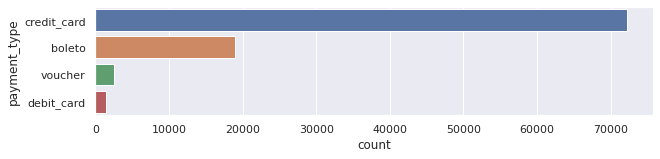

In [200]:
X = "payment_type"
a = list(data[X].value_counts().values)
b = data[X].value_counts().index.to_list()
c= np.transpose(np.array([a,b]))
df = pd.DataFrame(c,columns=['count', X])
ydata = "count"
xdata = X
fig, axes = plt.subplots(1, 1, figsize=(10, 2))
sns.barplot(y=xdata, x=ydata, data=df)
plt.show()

In [201]:
payment_type_count = df

#### product_category_name_english

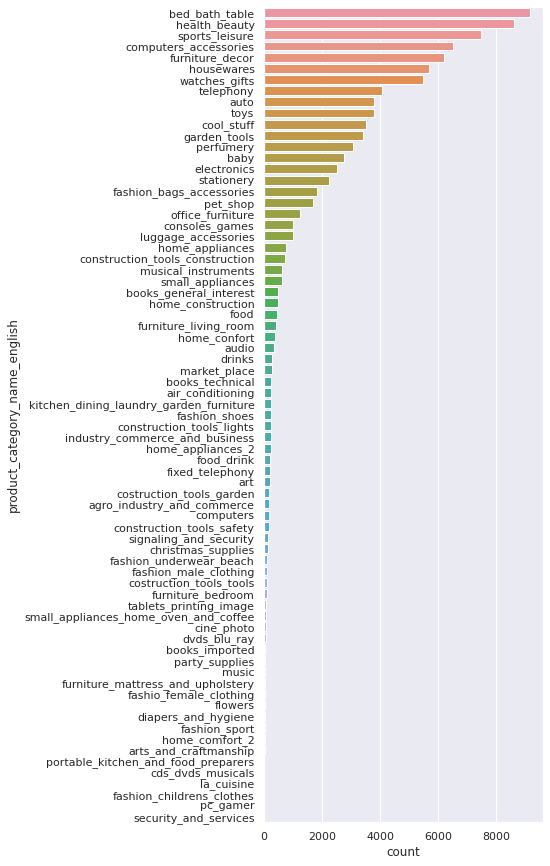

In [202]:
X = "product_category_name_english"
a = list(data[X].value_counts().values)
b = data[X].value_counts().index.to_list()
c= np.transpose(np.array([a,b]))
df = pd.DataFrame(c,columns=['count', X])
ydata = "count"
xdata = X
fig, axes = plt.subplots(1, 1, figsize=(5, 15))
sns.barplot(y=xdata, x=ydata, data=df)
plt.show()

In [203]:
product_category_name_english_count = df 

#### customer_state

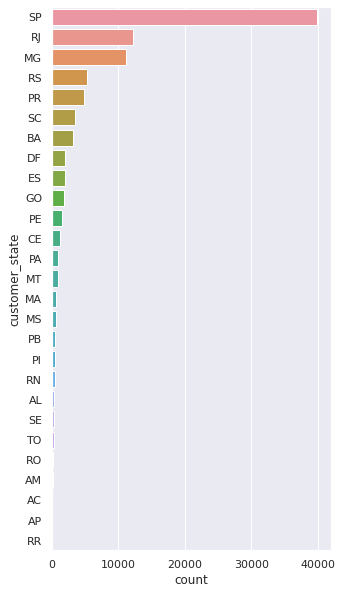

In [204]:
X = "customer_state"
a = list(data[X].value_counts().values)
b = data[X].value_counts().index.to_list()
c= np.transpose(np.array([a,b]))
df = pd.DataFrame(c,columns=['count', X])
ydata = "count"
xdata = X
fig, axes = plt.subplots(1, 1, figsize=(5, 10))
sns.barplot(y=xdata, x=ydata, data=df)
plt.show()

In [205]:
customer_state_count = df 

#### seller_state

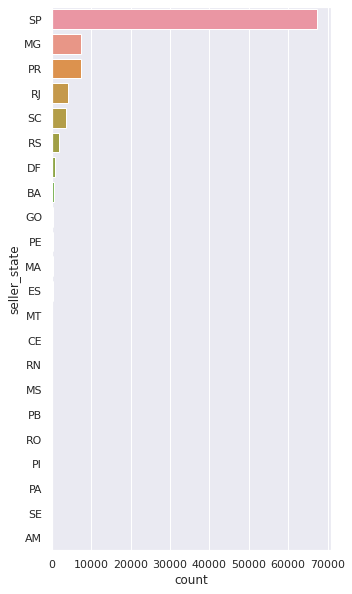

In [206]:
X = "seller_state"
a = list(data[X].value_counts().values)
b = data[X].value_counts().index.to_list()
c= np.transpose(np.array([a,b]))
df = pd.DataFrame(c,columns=['count', X])
ydata = "count"
xdata = X
fig, axes = plt.subplots(1, 1, figsize=(5, 10))
sns.barplot(x=ydata, y=xdata, data=df)
plt.show()

### Tableaux de contingence

####  'customer_state' et  'seller_state'

In [207]:
contingence = []

In [208]:
colfit =np.array(colQuali)
NbColfit =  np.shape(colfit)[0]
tabColfit=np.arange(NbColfit) 

In [209]:
from itertools import combinations 
comb = combinations(tabColfit, 2) 

X,Y payment_type customer_state


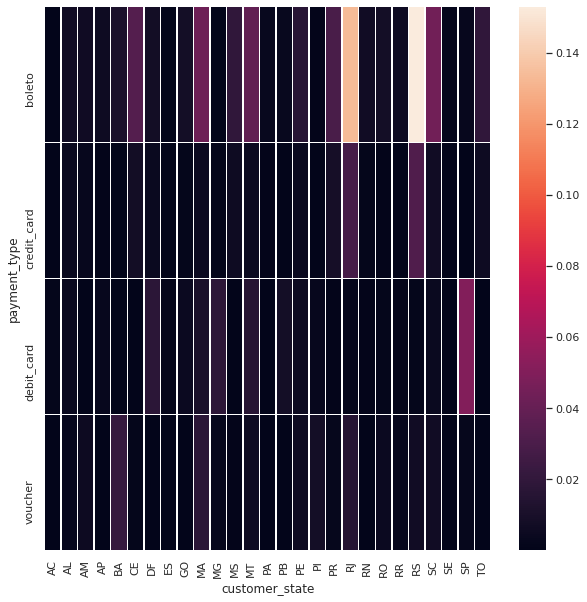

La p-valeur de du test de chi2 des variables 'payment_type' et 'customer_state' est de pvalue = 0.00 et la valeur de xi_n est de xi_n = 422.2 
=> Les variables 'payment_type' et 'customer_state' ne sont pas indépendantes  
X,Y payment_type product_category_name_english


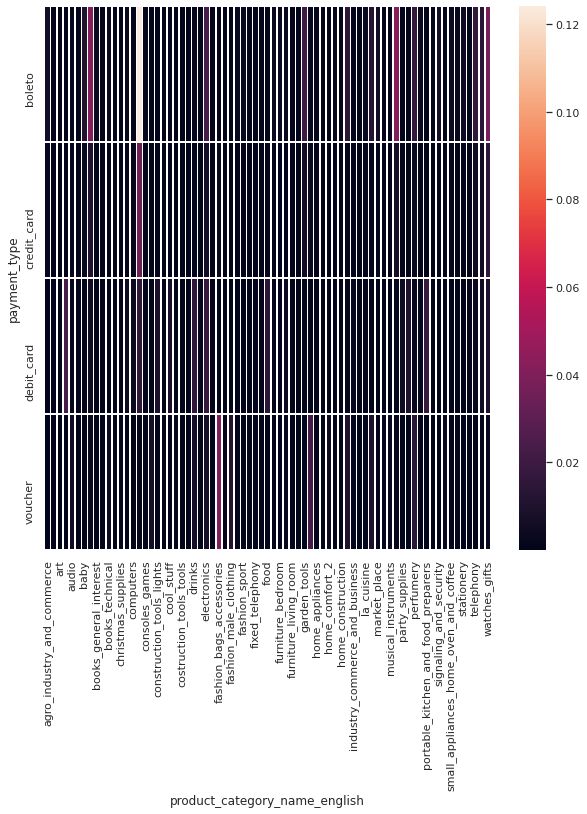

La p-valeur de du test de chi2 des variables 'payment_type' et 'product_category_name_english' est de pvalue = 0.00 et la valeur de xi_n est de xi_n = 871.2 
=> Les variables 'payment_type' et 'product_category_name_english' ne sont pas indépendantes  
X,Y payment_type seller_state


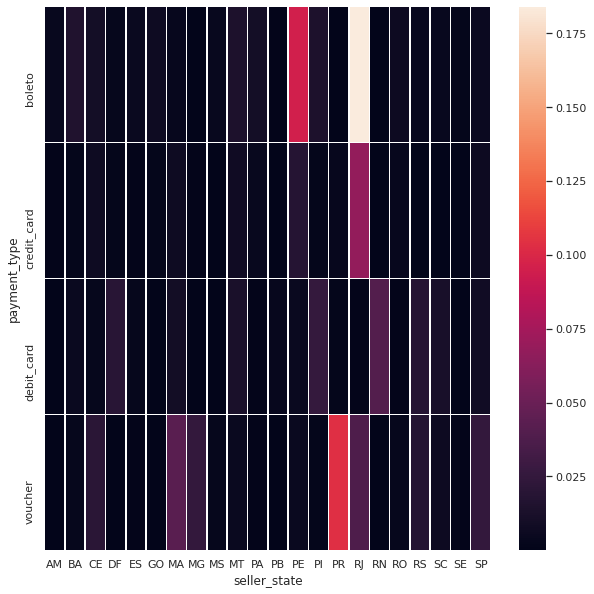

La p-valeur de du test de chi2 des variables 'payment_type' et 'seller_state' est de pvalue = 0.00 et la valeur de xi_n est de xi_n = 159.0 
=> Les variables 'payment_type' et 'seller_state' ne sont pas indépendantes  
X,Y customer_state product_category_name_english


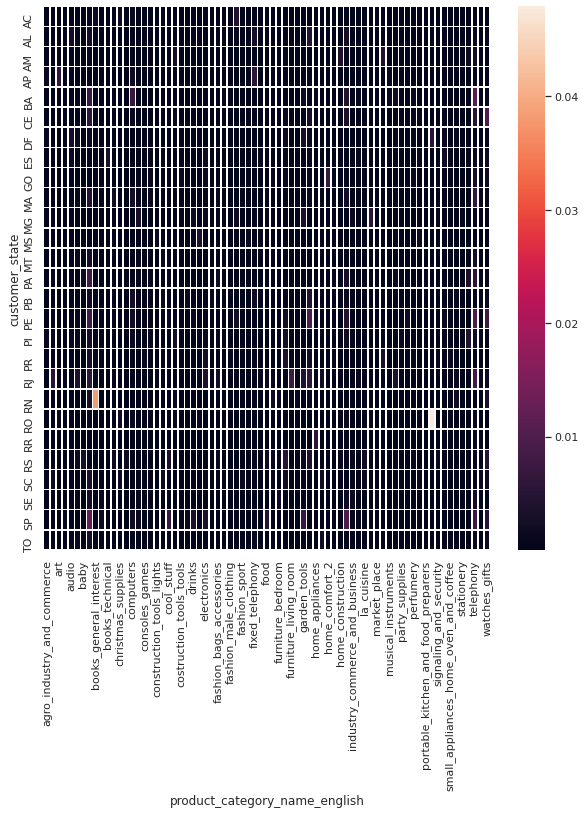

La p-valeur de du test de chi2 des variables 'customer_state' et 'product_category_name_english' est de pvalue = 0.00 et la valeur de xi_n est de xi_n = 4124.6 
=> Les variables 'customer_state' et 'product_category_name_english' ne sont pas indépendantes  
X,Y customer_state seller_state


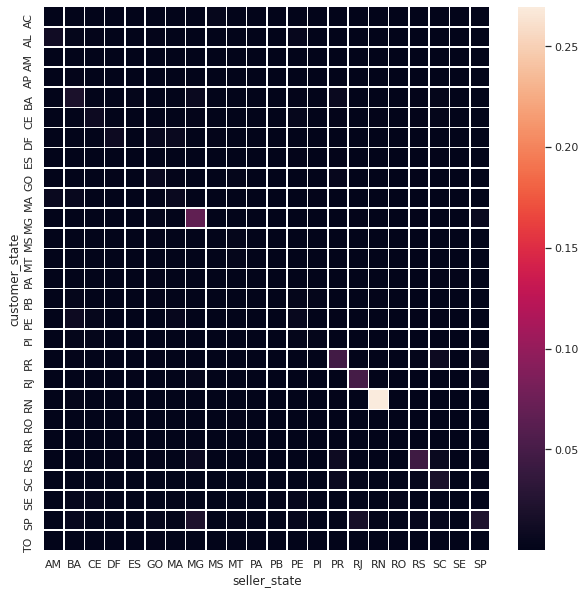

La p-valeur de du test de chi2 des variables 'customer_state' et 'seller_state' est de pvalue = 0.00 et la valeur de xi_n est de xi_n = 6364.2 
=> Les variables 'customer_state' et 'seller_state' ne sont pas indépendantes  
X,Y product_category_name_english seller_state


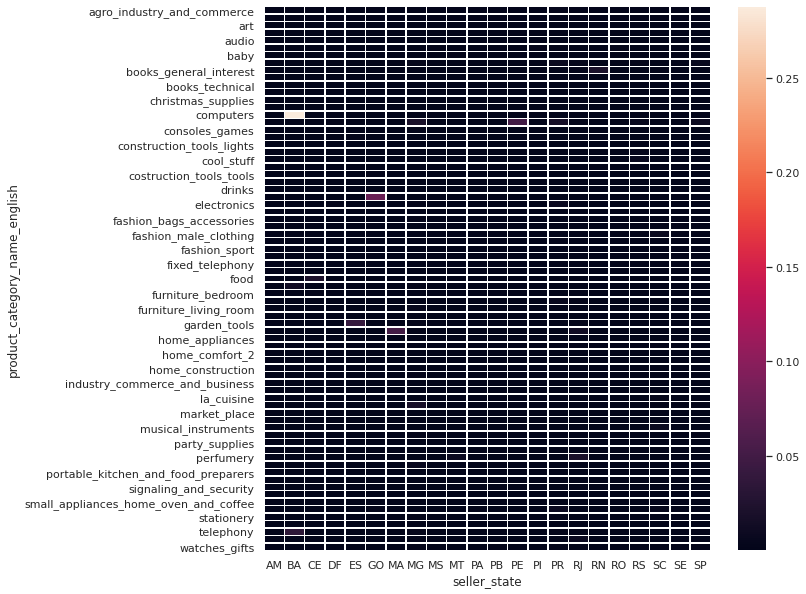

La p-valeur de du test de chi2 des variables 'product_category_name_english' et 'seller_state' est de pvalue = 0.00 et la valeur de xi_n est de xi_n = 69935.4 
=> Les variables 'product_category_name_english' et 'seller_state' ne sont pas indépendantes  


In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
for i in list(comb): 
    X = colfit[tuple(i)[0]]
    Y = colfit[tuple(i)[1]]
    print("X,Y",X,Y)
    
    cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(data)
    indep = tx.dot(ty) / n

    c = cont.fillna(0) # On remplace les valeurs nulles par 0
    measure = (c-indep)**2/indep
    xi_n = measure.sum().sum()
    table = measure/xi_n

    fig = plt.figure(figsize=(10, 10))
    sns.heatmap(table.iloc[:-1,:-1], linewidths=.5)
    plt.show()

    from scipy.stats import chi2_contingency
    print("La p-valeur de du test de chi2 des variables '{}' et '{}' est de pvalue = {:03.2f}".format(
        X  , Y  ,   chi2_contingency(c)[1]) + " et la valeur de xi_n est de xi_n = {:05.1f} ".format(chi2_contingency(c)[0]))
    if chi2_contingency(c)[1]< 0.05 : print("=> Les variables '{}' et '{}' ne sont pas indépendantes  ".format(X  , Y) )
    else : print("=> Les variables '{}' et '{}' sont indépendantes  ".format(X  , Y) )

    contingence.append(["{} * {}".format(X, Y), chi2_contingency(c)[0]])
    

In [211]:
contingence

[['payment_type * customer_state', 422.20787977328837],
 ['payment_type * product_category_name_english', 871.2103679191773],
 ['payment_type * seller_state', 158.98859534518616],
 ['customer_state * product_category_name_english', 4124.626157493847],
 ['customer_state * seller_state', 6364.17646493915],
 ['product_category_name_english * seller_state', 69935.44274434807]]

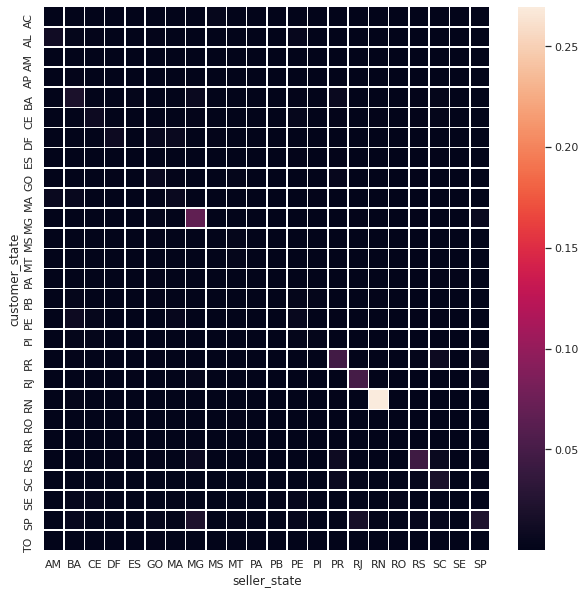

La p-valeur de du test de chi2 des variables 'customer_state' et 'seller_state' est de pvalue = 0.00  
=> Les variables 'customer_state' et 'seller_state' ne sont pas indépendantes  


In [212]:
X = "customer_state"
Y = "seller_state"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

fig = plt.figure(figsize=(10, 10))
sns.heatmap(table.iloc[:-1,:-1], linewidths=.5)
plt.show()

from scipy.stats import chi2_contingency
print("La p-valeur de du test de chi2 des variables '{}' et '{}' est de pvalue = {:03.2f}  ".format(X  , Y  ,   chi2_contingency(c)[1]))
if chi2_contingency(c)[1]< 0.05 : print("=> Les variables '{}' et '{}' ne sont pas indépendantes  ".format(X  , Y) )
else : print("=> Les variables '{}' et '{}' sont indépendantes  ".format(X  , Y) )

In [212]:
cont

seller_state                    AM     BA    CE     DF     ES     GO     MA  \
product_category_name_english                                                 
agro_industry_and_commerce     NaN    NaN   NaN    NaN    NaN    NaN    NaN   
air_conditioning               NaN    NaN   NaN    6.0    3.0    NaN    NaN   
art                            NaN    NaN   NaN    1.0    NaN    1.0    NaN   
arts_and_craftmanship          NaN    NaN   NaN    NaN    NaN    NaN    NaN   
audio                          NaN    NaN   NaN    9.0    NaN    2.0    NaN   
...                            ...    ...   ...    ...    ...    ...    ...   
tablets_printing_image         NaN    NaN   NaN    NaN    NaN    NaN    NaN   
telephony                      3.0  260.0   NaN   37.0    1.0    NaN    NaN   
toys                           NaN    1.0   NaN   30.0    NaN    1.0    NaN   
watches_gifts                  NaN    4.0   NaN    1.0    NaN    NaN    NaN   
Total                          3.0  549.0  85.0  794.0  302.0  442.0  388.0   

seller_state                       MG    MS     MT   PA    PB     PE    PI  \
product_category_name_english                                                
agro_industry_and_commerce        3.0   NaN    NaN  NaN   NaN    NaN   NaN   
air_conditioning                 35.0   1.0    NaN  NaN   NaN    NaN   NaN   
art                              10.0   NaN    NaN  NaN   NaN    NaN   NaN   
arts_and_craftmanship             1.0   NaN    NaN  NaN   NaN    NaN   NaN   
audio                             1.0   NaN    NaN  NaN   NaN    1.0   NaN   
...                               ...   ...    ...  ...   ...    ...   ...   
tablets_printing_image            1.0   NaN    NaN  NaN   NaN    NaN   NaN   
telephony                        40.0   NaN    NaN  NaN   5.0    1.0   NaN   
toys                            187.0   2.0    NaN  NaN   NaN    2.0   NaN   
watches_gifts                   131.0   NaN    NaN  NaN  14.0    3.0   NaN   
Total                          7478.0  47.0  134.0  8.0  30.0  403.0  11.0   

seller_state                       PR      RJ    RN    RO      RS      SC  \
product_category_name_english                                               
agro_industry_and_commerce       72.0     2.0   NaN   NaN    12.0     1.0   
air_conditioning                 34.0    21.0   NaN   NaN     6.0     8.0   
art                               2.0     6.0   NaN   NaN     1.0    14.0   
arts_and_craftmanship             NaN     NaN   NaN   NaN     1.0     1.0   
audio                             3.0     NaN   NaN   NaN     NaN     1.0   
...                               ...     ...   ...   ...     ...     ...   
tablets_printing_image            NaN     NaN   NaN   NaN     NaN     NaN   
telephony                        81.0    38.0   NaN   NaN    14.0    54.0   
toys                            204.0   469.0   NaN   NaN   138.0   148.0   
watches_gifts                   160.0   439.0   NaN   NaN    25.0   219.0   
Total                          7378.0  4110.0  51.0  13.0  1910.0  3532.0   

seller_state                    SE       SP  Total  
product_category_name_english                       
agro_industry_and_commerce     NaN     87.0    177  
air_conditioning               NaN    131.0    245  
art                            NaN    156.0    191  
arts_and_craftmanship          NaN     19.0     22  
audio                          NaN    327.0    344  
...                            ...      ...    ...  
tablets_printing_image         NaN     76.0     77  
telephony                      NaN   3541.0   4075  
toys                           NaN   2596.0   3778  
watches_gifts                  NaN   4474.0   5470  
Total                          7.0  67419.0  95094  

[74 rows x 23 columns]

In [213]:
list(cont.drop("Total").drop("Total", axis=1).idxmax())

['telephony',
 'telephony',
 'health_beauty',
 'computers_accessories',
 'garden_tools',
 'sports_leisure',
 'health_beauty',
 'computers_accessories',
 'auto',
 'perfumery',
 'sports_leisure',
 'watches_gifts',
 'computers_accessories',
 'auto',
 'computers_accessories',
 'health_beauty',
 'books_general_interest',
 'auto',
 'computers_accessories',
 'sports_leisure',
 'bed_bath_table',
 'bed_bath_table']

In [214]:
cont.loc["computers",'BA']

144.0

In [215]:
cont.max(axis=1)

product_category_name_english
agro_industry_and_commerce      177.0
air_conditioning                245.0
art                             191.0
arts_and_craftmanship            22.0
audio                           344.0
                               ...   
tablets_printing_image           77.0
telephony                      4075.0
toys                           3778.0
watches_gifts                  5470.0
Total                         95094.0
Length: 74, dtype: float64

In [216]:
df = pd.DataFrame(contingence, columns=["couples", "xi_n"] )

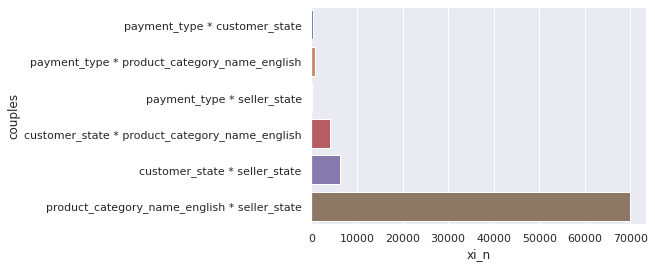

In [217]:
ax = sns.barplot(y="couples", x="xi_n", data=df)

In [218]:
cont.loc["computers",:]

seller_state
AM         NaN
BA       144.0
CE         NaN
DF         NaN
ES         NaN
GO         NaN
MA         NaN
MG         2.0
MS         NaN
MT         NaN
PA         NaN
PB         NaN
PE         NaN
PI         NaN
PR         1.0
RJ         NaN
RN         NaN
RO         NaN
RS         NaN
SC         NaN
SE         NaN
SP        29.0
Total    176.0
Name: computers, dtype: float64

In [219]:
cont.loc[:, "BA"]

product_category_name_english
agro_industry_and_commerce      NaN
air_conditioning                NaN
art                             NaN
arts_and_craftmanship           NaN
audio                           NaN
                              ...  
tablets_printing_image          NaN
telephony                     260.0
toys                            1.0
watches_gifts                   4.0
Total                         549.0
Name: BA, Length: 74, dtype: float64

In [220]:
144/549

0.26229508196721313

####  'seller_state' et  'product_category_name_english'

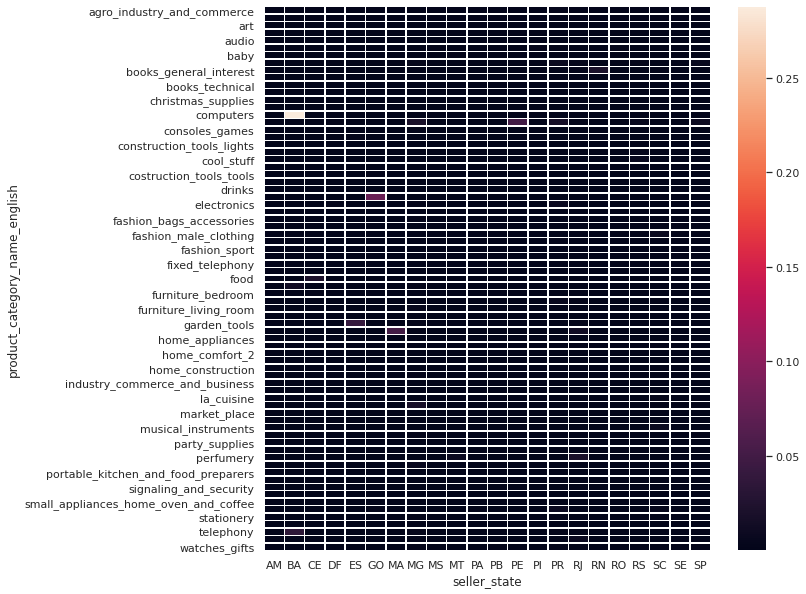

La p-valeur de du test de chi2 des variables 'product_category_name_english' et 'seller_state' est de pvalue = 0.00  
=> Les variables 'product_category_name_english' et 'seller_state' ne sont pas indépendantes  


In [221]:
X = "product_category_name_english"
Y = "seller_state"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

fig = plt.figure(figsize=(10, 10))
sns.heatmap(table.iloc[:-1,:-1], linewidths=.5)
plt.show()

from scipy.stats import chi2_contingency
print("La p-valeur de du test de chi2 des variables '{}' et '{}' est de pvalue = {:03.2f}  ".format(X  , Y  ,   chi2_contingency(c)[1]))
if chi2_contingency(c)[1]< 0.05 : print("=> Les variables '{}' et '{}' ne sont pas indépendantes  ".format(X  , Y) )
else : print("=> Les variables '{}' et '{}' sont indépendantes  ".format(X  , Y) )


In [222]:
df = pd.DataFrame(contingence, columns=["variables", "xi_n"]  )

In [223]:
df

variables          xi_n
0                   payment_type * customer_state    422.207880
1    payment_type * product_category_name_english    871.210368
2                     payment_type * seller_state    158.988595
3  customer_state * product_category_name_english   4124.626157
4                   customer_state * seller_state   6364.176465
5    product_category_name_english * seller_state  69935.442744

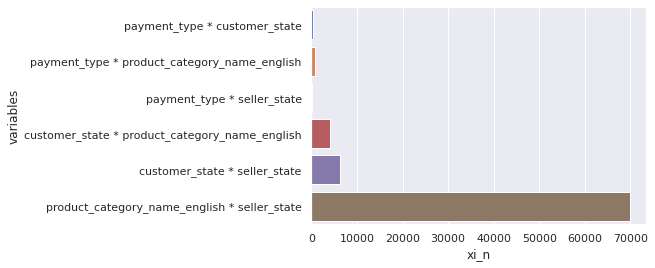

In [224]:
ax = sns.barplot(y="variables", x="xi_n", data=df)

#### on __supprime__ la variable "__seller_state__" 

qui contient le moins d'information et dont le __xi_n__ est le plus élevé avec une autre variable ('customer_state')

In [226]:
data = data.drop("seller_state", axis=1)

In [227]:
colQuali =[ i for i in data.columns.to_list() if not i in colQuanti]

### ANOVA

In [228]:
print(colQuali)
colQuanti

['payment_type', 'customer_state', 'product_category_name_english']


['payment_sequential',
 'payment_installments',
 'customer_zip_code_prefix',
 'total_payment',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_height_cm',
 'review_score',
 'seller_zip_code_prefix',
 'distance_customers_sellers',
 'inertie',
 'order_delivered_customer_time_day',
 'shipping_limit_time_days',
 'review_answer_time_days',
 'order_purchase_timestamp_month',
 'order_purchase_timestamp_year']

#### Payment_type

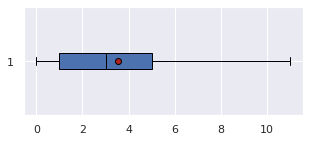

In [229]:
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(5, 2))
X = 'payment_type'
Y = colQuanti[1]
modalites = payment_type_count["payment_type"]
groupes = []
# for m in modalites:
groupes.append(data[data[X]==modalites[0]][Y])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

axs.boxplot(groupes,showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
payment_type_count_reverse = payment_type_count.iloc[::-1]

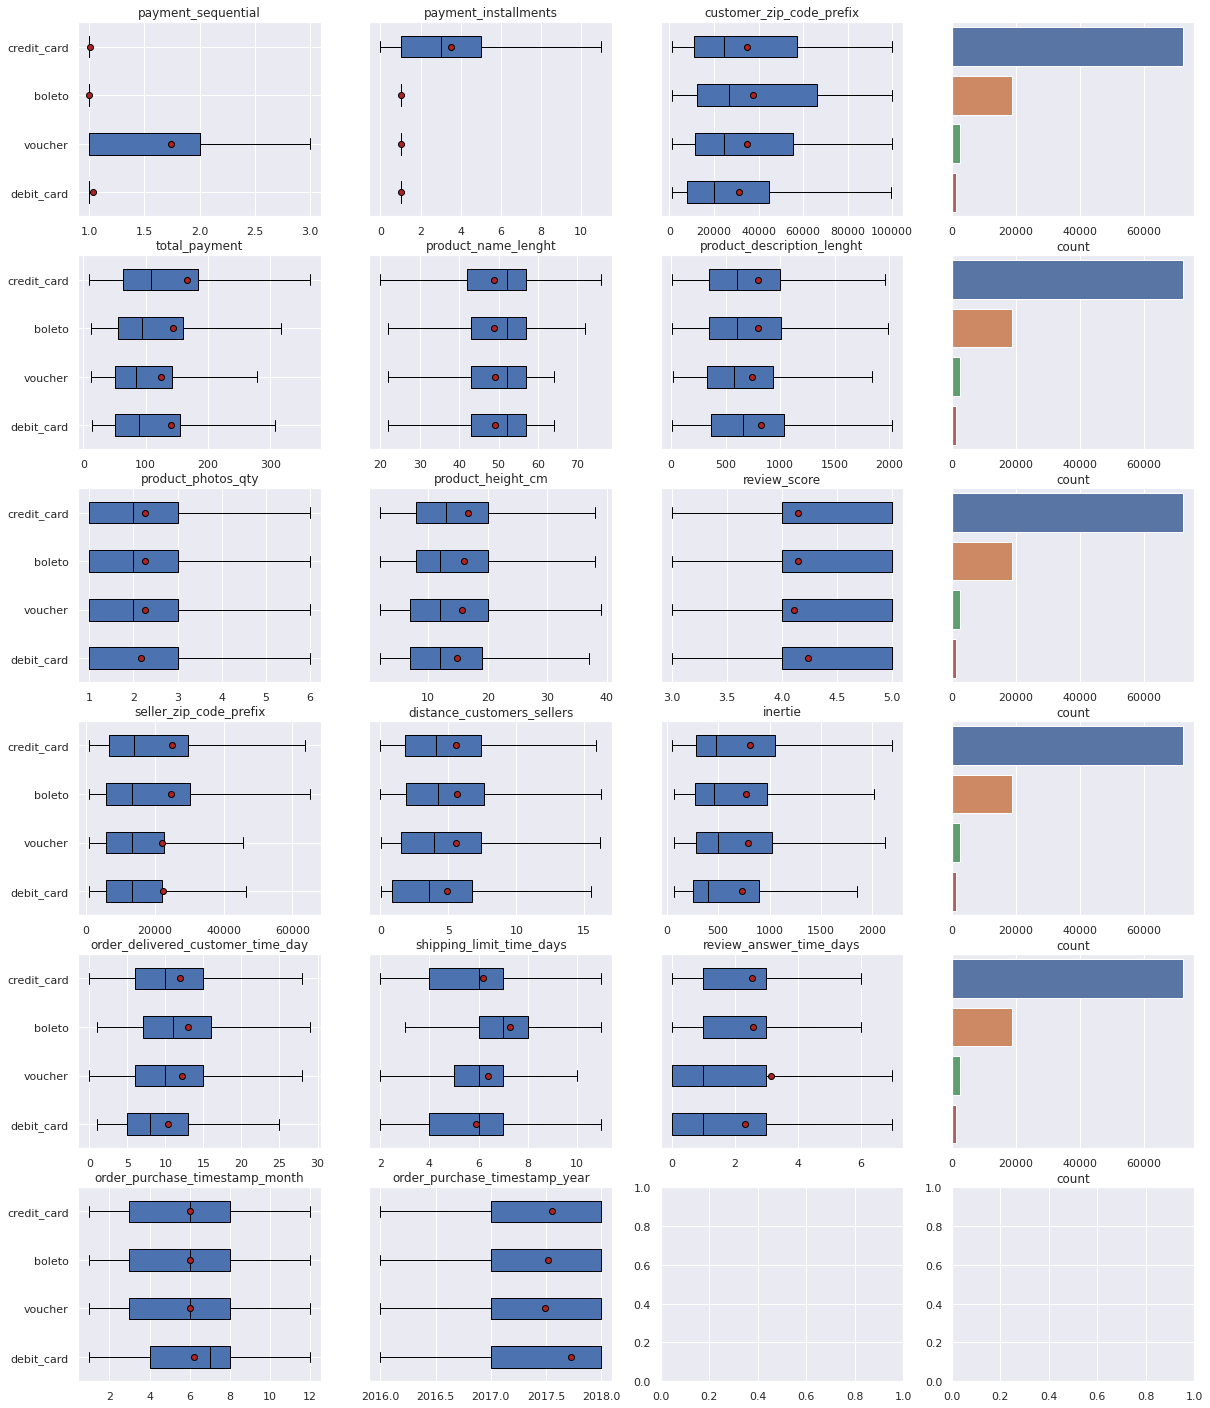

In [230]:
fig, axs = plt.subplots(6, 4, figsize=(20, 25))
X = 'payment_type'

colGraph = []
for idx, col in enumerate(colQuanti) : 
    if idx%3 == 3 -1 : 
        colGraph.append(col)
        colGraph.append("count")
    else : colGraph.append(col)
        
        
        
for idx, col in enumerate(colGraph) : 
    if idx%4 == (4 - 1) : 
        ydata = "count"
        xdata = X
        sns.barplot(y=xdata, x=ydata, data=payment_type_count, ax = axs[idx//4,idx%4])
        axs[idx//4,idx%4].yaxis.set_visible(False)
    else : 
        Y = col
        modalites = payment_type_count_reverse[X].values
        groupes = []
        for m in modalites:
            groupes.append(data[data[X]==m][Y])
        medianprops = {'color':"black"}
        meanprops = {'marker':'o', 'markeredgecolor':'black',
                    'markerfacecolor':'firebrick'}

        axs[idx//4,idx%4].boxplot(groupes, labels=modalites,  showfliers=False, medianprops=medianprops, 
                    vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
        axs[idx//4,idx%4].set_title(Y)
        axs[idx//4,idx%4].yaxis.set_visible(False)
        
        if idx%4 == 0 : axs[idx//4,idx%4].yaxis.set_visible(True)


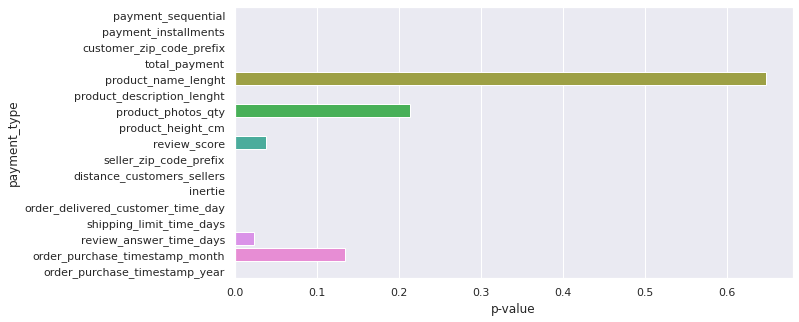

In [231]:


X = "payment_type"
Y = 'payment_sequential'
grouped = data.groupby([X])
# rp.summary_cont(grouped)[Y]
TableauANOVA = []

for Y in colQuanti :
# Y = colQuanti[0]
    grouped = data.groupby([X])
    # rp.summary_cont(grouped)[Y]
    for name, group in grouped  :
        df = grouped.get_group(name)
        k2, p = stats.normaltest(data[Y])
        alpha = 0.05
        if p >= alpha:  # null hypothesis: x comes from a normal distribution
    #         print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    #     else:
            print(name, " : The null hypothesis cannot be rejected")
    from statsmodels.formula.api import ols
    import statsmodels.api as sm
    model = ols('{} ~ {}'.format(Y,X), data).fit()
    res = sm.stats.anova_lm(model, typ= 2)

    TableauANOVA.append([Y,res.loc[X,"PR(>F)"]])
TableauANOVA = pd.DataFrame(TableauANOVA,columns=[X, 'p-value'])
ydata = "p-value"
xdata = X
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(y=xdata, x=ydata, data=TableauANOVA)
plt.show()

In [232]:
import researchpy as rp
X = "payment_type"
Y = 'payment_sequential'
grouped = data.groupby([X])
rp.summary_cont(grouped)[Y]

N      Mean        SD        SE  95% Conf.  Interval
payment_type                                                          
boleto        18918  1.000053  0.007270  0.000053   0.999949  1.000156
credit_card   72179  1.002563  0.050835  0.000189   1.002192  1.002934
debit_card     1457  1.032258  0.176745  0.004630   1.023182  1.041334
voucher        2540  1.744882  1.183563  0.023484   1.698853  1.790911

#### on combinera la variable  **payment_type** avec *payment_sequential*

In [233]:
colQuali =[ i for i in data.columns.to_list() if not i in colQuanti]
dataCorrelation = data.loc[:, colQuanti]
colQuali

['payment_type', 'customer_state', 'product_category_name_english']

#### customer_state

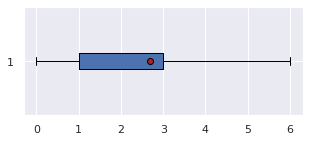

In [234]:
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(5, 2))
X = 'customer_state'
Y = colQuanti[1]
modalites = customer_state_count["customer_state"]
groupes = []
# for m in modalites:
groupes.append(data[data[X]==modalites[0]][Y])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

axs.boxplot(groupes,showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
customer_state_count_reverse = customer_state_count.iloc[::-1]

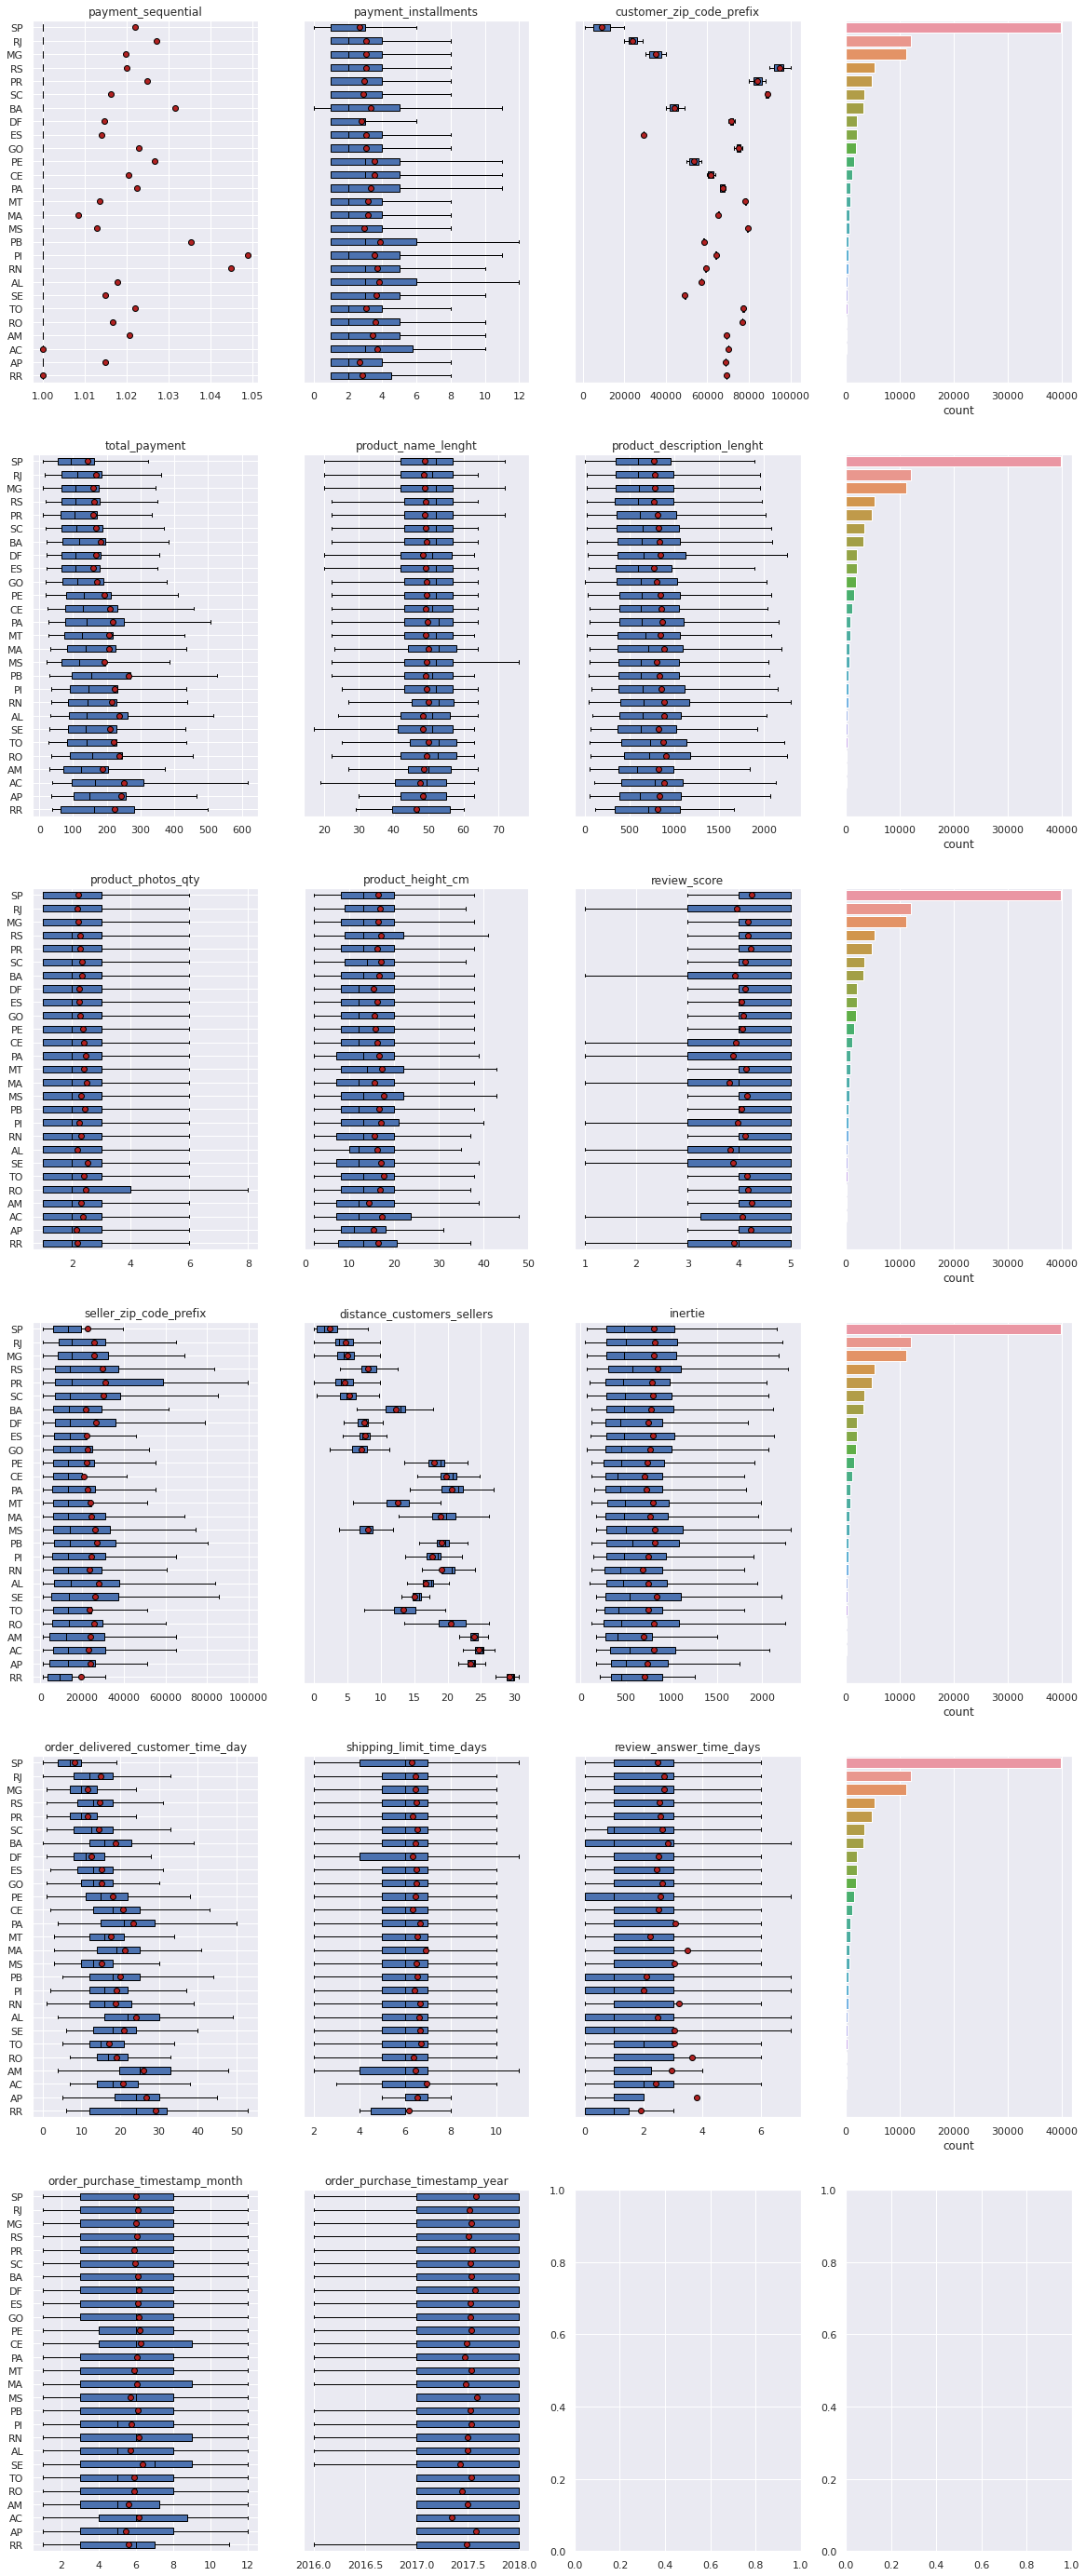

In [235]:
fig, axs = plt.subplots(6, 4, figsize=(20, 50))
X = 'customer_state'

colGraph = []
for idx, col in enumerate(colQuanti) : 
    if idx%3 == 3 -1 : 
        colGraph.append(col)
        colGraph.append("count")
    else : colGraph.append(col)
        
        
        
for idx, col in enumerate(colGraph) : 
    if idx%4 == (4 - 1) : 
        ydata = "count"
        xdata = X
        sns.barplot(y=xdata, x=ydata, data=customer_state_count, ax = axs[idx//4,idx%4])
        axs[idx//4,idx%4].yaxis.set_visible(False)
    else : 
        Y = col
        modalites = customer_state_count_reverse[X].values
        groupes = []
        for m in modalites:
            groupes.append(data[data[X]==m][Y])
        medianprops = {'color':"black"}
        meanprops = {'marker':'o', 'markeredgecolor':'black',
                    'markerfacecolor':'firebrick'}

        axs[idx//4,idx%4].boxplot(groupes, labels=modalites,  showfliers=False, medianprops=medianprops, 
                    vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
        axs[idx//4,idx%4].set_title(Y)
        axs[idx//4,idx%4].yaxis.set_visible(False)
        
        if idx%4 == 0 : axs[idx//4,idx%4].yaxis.set_visible(True)



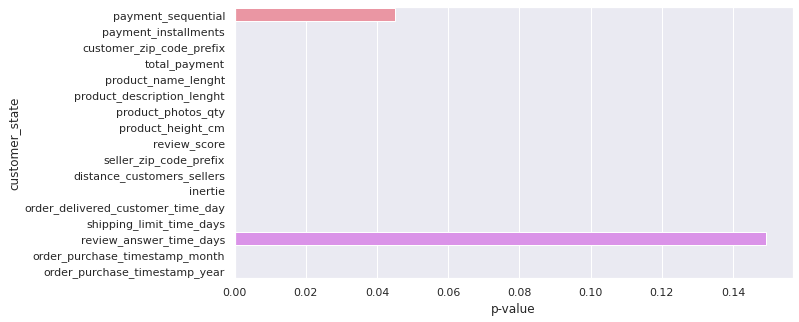

In [236]:

X = "customer_state"
Y = 'distance_customers_sellers'
grouped = data.groupby([X])
# rp.summary_cont(grouped)[Y]
TableauANOVA = []

for Y in colQuanti :
# Y = colQuanti[0]
    grouped = data.groupby([X])
    # rp.summary_cont(grouped)[Y]
    for name, group in grouped  :
        df = grouped.get_group(name)
        k2, p = stats.normaltest(data[Y])
        alpha = 0.05
        if p >= alpha:  # null hypothesis: x comes from a normal distribution
    #         print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    #     else:
            print(name, " : The null hypothesis cannot be rejected")
    from statsmodels.formula.api import ols
    import statsmodels.api as sm
    model = ols('{} ~ {}'.format(Y,X), data).fit()
    res = sm.stats.anova_lm(model, typ= 2)

    TableauANOVA.append([Y,res.loc[X,"PR(>F)"]])
TableauANOVA = pd.DataFrame(TableauANOVA,columns=[X, 'p-value'])
ydata = "p-value"
xdata = X
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(y=xdata, x=ydata, data=TableauANOVA)
plt.show()

In [237]:
X = "customer_state"
Y = 'review_answer_time_days'
grouped = data.groupby([X])
# rp.summary_cont(grouped)[Y]
for name, group in grouped  :
    df = grouped.get_group(name)
    k2, p = stats.normaltest(data[Y])
    alpha = 0.05
    if p >= alpha:  # null hypothesis: x comes from a normal distribution
#         print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
#     else:
        print(name, " : The null hypothesis cannot be rejected")
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('{} ~ {}'.format(Y,X), data).fit()
res = sm.stats.anova_lm(model, typ= 2)
res

sum_sq       df         F    PR(>F)
customer_state  3.215340e+03     26.0  1.286845  0.149267
Residual        9.136019e+06  95067.0       NaN       NaN

#### **drop les zip code** prefix qui contien même info que customer state

In [238]:
data = data.drop(["customer_zip_code_prefix", "seller_zip_code_prefix"], axis=1)
colQuanti =[ i for i in data.columns.to_list() if not i in colQuali]
colQuanti

['payment_sequential',
 'payment_installments',
 'total_payment',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_height_cm',
 'review_score',
 'distance_customers_sellers',
 'inertie',
 'order_delivered_customer_time_day',
 'shipping_limit_time_days',
 'review_answer_time_days',
 'order_purchase_timestamp_month',
 'order_purchase_timestamp_year']

#### product_category_name_english

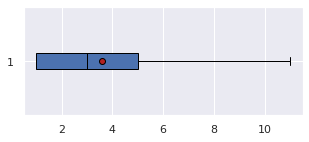

In [239]:
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(5, 2))
X = 'product_category_name_english'
Y = colQuanti[1]
modalites = product_category_name_english_count["product_category_name_english"]
groupes = []
# for m in modalites:
groupes.append(data[data[X]==modalites[0]][Y])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

axs.boxplot(groupes,showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
product_category_name_english_count_reverse = product_category_name_english_count.iloc[::-1]

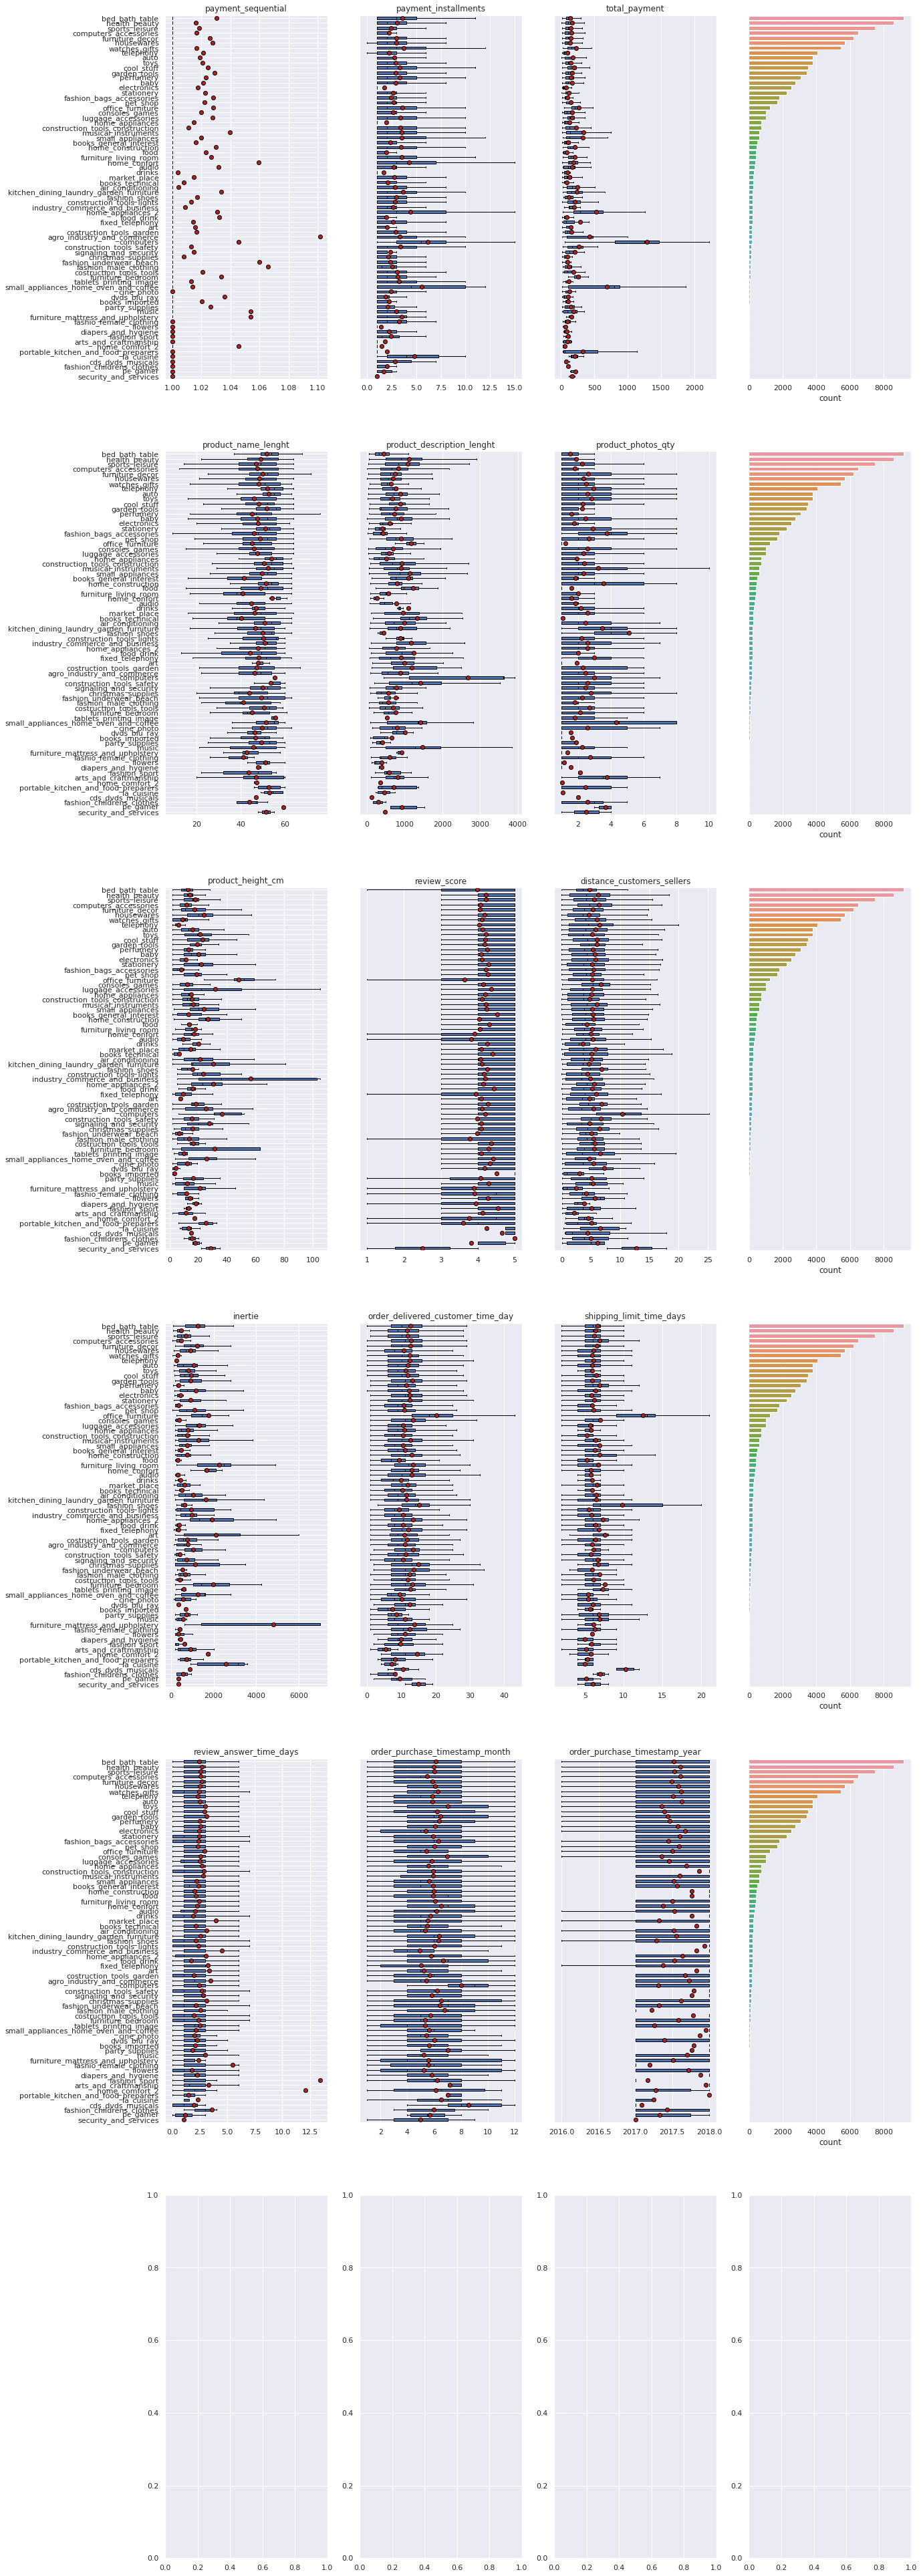

In [240]:
fig, axs = plt.subplots(5, 4, figsize=(20, 70))
X = 'product_category_name_english'

colGraph = []
for idx, col in enumerate(colQuanti) : 
    if idx%3 == 3 -1 : 
        colGraph.append(col)
        colGraph.append("count")
    else : colGraph.append(col)
        
        
        
for idx, col in enumerate(colGraph) : 
    if idx%4 == (4 - 1) : 
        ydata = "count"
        xdata = X
        sns.barplot(y=xdata, x=ydata, data=product_category_name_english_count, ax = axs[idx//4,idx%4])
        axs[idx//4,idx%4].yaxis.set_visible(False)
    else : 
        Y = col
        modalites = product_category_name_english_count_reverse[X].values
        groupes = []
        for m in modalites:
            groupes.append(data[data[X]==m][Y])
        medianprops = {'color':"black"}
        meanprops = {'marker':'o', 'markeredgecolor':'black',
                    'markerfacecolor':'firebrick'}

        axs[idx//4,idx%4].boxplot(groupes, labels=modalites,  showfliers=False, medianprops=medianprops, 
                    vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
        axs[idx//4,idx%4].set_title(Y)
        axs[idx//4,idx%4].yaxis.set_visible(False)
        
        if idx%4 == 0 : axs[idx//4,idx%4].yaxis.set_visible(True)


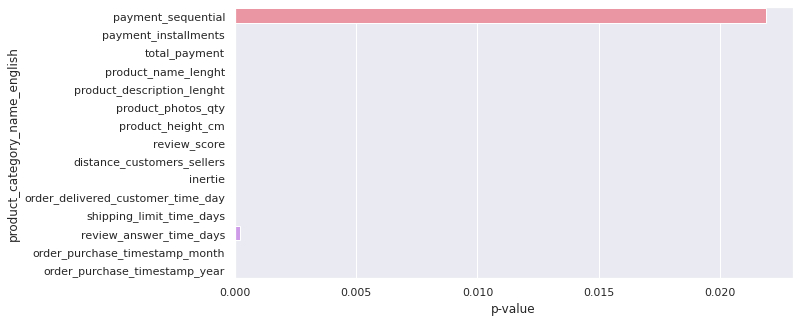

In [241]:
TableauANOVA = []
X = "product_category_name_english"

for Y in colQuanti :
# Y = colQuanti[0]
    grouped = data.groupby([X])
    # rp.summary_cont(grouped)[Y]
    for name, group in grouped  :
        df = grouped.get_group(name)
        k2, p = stats.normaltest(data[Y])
        alpha = 0.05
        if p >= alpha:  # null hypothesis: x comes from a normal distribution
    #         print(name, "p = {:g}".format(p), " : The null hypothesis can be rejected")
    #     else:
            print(name, " : The null hypothesis cannot be rejected")
    from statsmodels.formula.api import ols
    import statsmodels.api as sm
    model = ols('{} ~ {}'.format(Y,X), data).fit()
    res = sm.stats.anova_lm(model, typ= 2)

    TableauANOVA.append([Y,res.loc[X,"PR(>F)"]])
TableauANOVA = pd.DataFrame(TableauANOVA,columns=[X, 'p-value'])
ydata = "p-value"
xdata = X
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(y=xdata, x=ydata, data=TableauANOVA)
plt.show()

In [242]:
data.to_csv('data_CLean_after_Ana_Exploratoire.csv', sep='\t', encoding='utf-8')

In [243]:

colQuanti =[ i for i in data.columns.to_list() if not i in colQuali]
colQuali =[ i for i in data.columns.to_list() if not i in colQuanti]

colQuanti

['payment_sequential',
 'payment_installments',
 'total_payment',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_height_cm',
 'review_score',
 'distance_customers_sellers',
 'inertie',
 'order_delivered_customer_time_day',
 'shipping_limit_time_days',
 'review_answer_time_days',
 'order_purchase_timestamp_month',
 'order_purchase_timestamp_year']

In [244]:
colQuali

['payment_type', 'customer_state', 'product_category_name_english']